# Modelling Pulses Using Functions And Expressions

Assume we want to model a pulse that represents a damped sine function. While we could, in theory, do this using `TablePulseTemplate`s by piecewise linear approximation (cf. [Modelling a Simple TablePulseTemplate](00SimpleTablePulse.ipynb)), this would be a tedious endeavor. A much simpler approach presents itself in the form of the `FunctionPulseTemplate` class of the qctoolkit. Like the `TablePulseTemplate`, a `FunctionPulseTemplate` represents an atomic pulse which will be converted into a waveform for execution. The difference between both is that `FunctionPulseTemplate` accepts a mathematical expression which is parsed and evaluated using `sympy` to sample the waveform instead of the linear interpolation between specified supporting points as it is done in `TablePulseTemplate`.

To define the sine function pulse template, we can thus do the following:

<IPython.core.display.Javascript object>


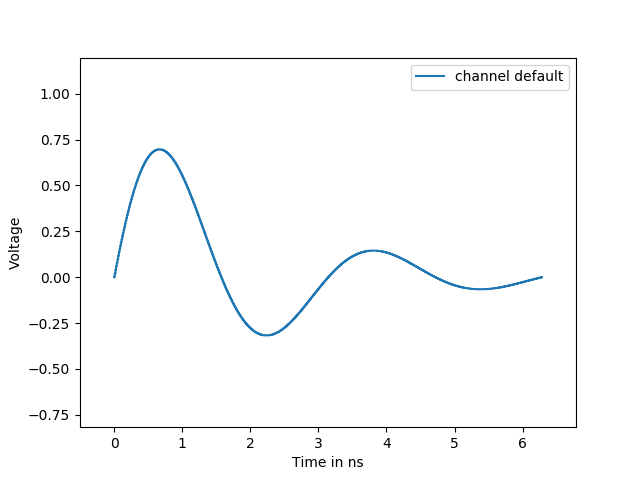

In [1]:
from qctoolkit.pulses import FunctionPT
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 50,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "%matplotlib notebook\n",
    "\n",
    "from qctoolkit.pulses import *\n",
    "from qctoolkit.pulses.loop_pulse_template import ForLoopPulseTemplate\n",
    "\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 51,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "application/javascript": [
       "/* Put everything inside the global mpl namespace */\n",
       "window.mpl = {};\n",
       "\n",
       "\n",
       "mpl.get_websocket_type = function() {\n",
       "    if (typeof(WebSocket) !== 'undefined') {\n",
       "        return WebSocket;\n",
       "    } else if (typeof(MozWebSocket) !== 'undefined') {\n",
       "        return MozWebSocket;\n",
       "    } else {\n",
       "        alert('Your browser does not have WebSocket support.' +\n",
       "              'Please try Chrome, Safari or Firefox ≥ 6. ' +\n",
       "              'Firefox 4 and 5 are also supported but you ' +\n",
       "              'have to enable WebSockets in about:config.');\n",
       "    };\n",
       "}\n",
       "\n",
       "mpl.figure = function(figure_id, websocket, ondownload, parent_element) {\n",
       "    this.id = figure_id;\n",
       "\n",
       "    this.ws = websocket;\n",
       "\n",
       "    this.supports_binary = (this.ws.binaryType != undefined);\n",
       "\n",
       "    if (!this.supports_binary) {\n",
       "        var warnings = document.getElementById(\"mpl-warnings\");\n",
       "        if (warnings) {\n",
       "            warnings.style.display = 'block';\n",
       "            warnings.textContent = (\n",
       "                \"This browser does not support binary websocket messages. \" +\n",
       "                    \"Performance may be slow.\");\n",
       "        }\n",
       "    }\n",
       "\n",
       "    this.imageObj = new Image();\n",
       "\n",
       "    this.context = undefined;\n",
       "    this.message = undefined;\n",
       "    this.canvas = undefined;\n",
       "    this.rubberband_canvas = undefined;\n",
       "    this.rubberband_context = undefined;\n",
       "    this.format_dropdown = undefined;\n",
       "\n",
       "    this.image_mode = 'full';\n",
       "\n",
       "    this.root = $('<div/>');\n",
       "    this._root_extra_style(this.root)\n",
       "    this.root.attr('style', 'display: inline-block');\n",
       "\n",
       "    $(parent_element).append(this.root);\n",
       "\n",
       "    this._init_header(this);\n",
       "    this._init_canvas(this);\n",
       "    this._init_toolbar(this);\n",
       "\n",
       "    var fig = this;\n",
       "\n",
       "    this.waiting = false;\n",
       "\n",
       "    this.ws.onopen =  function () {\n",
       "            fig.send_message(\"supports_binary\", {value: fig.supports_binary});\n",
       "            fig.send_message(\"send_image_mode\", {});\n",
       "            if (mpl.ratio != 1) {\n",
       "                fig.send_message(\"set_dpi_ratio\", {'dpi_ratio': mpl.ratio});\n",
       "            }\n",
       "            fig.send_message(\"refresh\", {});\n",
       "        }\n",
       "\n",
       "    this.imageObj.onload = function() {\n",
       "            if (fig.image_mode == 'full') {\n",
       "                // Full images could contain transparency (where diff images\n",
       "                // almost always do), so we need to clear the canvas so that\n",
       "                // there is no ghosting.\n",
       "                fig.context.clearRect(0, 0, fig.canvas.width, fig.canvas.height);\n",
       "            }\n",
       "            fig.context.drawImage(fig.imageObj, 0, 0);\n",
       "        };\n",
       "\n",
       "    this.imageObj.onunload = function() {\n",
       "        this.ws.close();\n",
       "    }\n",
       "\n",
       "    this.ws.onmessage = this._make_on_message_function(this);\n",
       "\n",
       "    this.ondownload = ondownload;\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._init_header = function() {\n",
       "    var titlebar = $(\n",
       "        '<div class=\"ui-dialog-titlebar ui-widget-header ui-corner-all ' +\n",
       "        'ui-helper-clearfix\"/>');\n",
       "    var titletext = $(\n",
       "        '<div class=\"ui-dialog-title\" style=\"width: 100%; ' +\n",
       "        'text-align: center; padding: 3px;\"/>');\n",
       "    titlebar.append(titletext)\n",
       "    this.root.append(titlebar);\n",
       "    this.header = titletext[0];\n",
       "}\n",
       "\n",
       "\n",
       "\n",
       "mpl.figure.prototype._canvas_extra_style = function(canvas_div) {\n",
       "\n",
       "}\n",
       "\n",
       "\n",
       "mpl.figure.prototype._root_extra_style = function(canvas_div) {\n",
       "\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._init_canvas = function() {\n",
       "    var fig = this;\n",
       "\n",
       "    var canvas_div = $('<div/>');\n",
       "\n",
       "    canvas_div.attr('style', 'position: relative; clear: both; outline: 0');\n",
       "\n",
       "    function canvas_keyboard_event(event) {\n",
       "        return fig.key_event(event, event['data']);\n",
       "    }\n",
       "\n",
       "    canvas_div.keydown('key_press', canvas_keyboard_event);\n",
       "    canvas_div.keyup('key_release', canvas_keyboard_event);\n",
       "    this.canvas_div = canvas_div\n",
       "    this._canvas_extra_style(canvas_div)\n",
       "    this.root.append(canvas_div);\n",
       "\n",
       "    var canvas = $('<canvas/>');\n",
       "    canvas.addClass('mpl-canvas');\n",
       "    canvas.attr('style', \"left: 0; top: 0; z-index: 0; outline: 0\")\n",
       "\n",
       "    this.canvas = canvas[0];\n",
       "    this.context = canvas[0].getContext(\"2d\");\n",
       "\n",
       "    var backingStore = this.context.backingStorePixelRatio ||\n",
       "\tthis.context.webkitBackingStorePixelRatio ||\n",
       "\tthis.context.mozBackingStorePixelRatio ||\n",
       "\tthis.context.msBackingStorePixelRatio ||\n",
       "\tthis.context.oBackingStorePixelRatio ||\n",
       "\tthis.context.backingStorePixelRatio || 1;\n",
       "\n",
       "    mpl.ratio = (window.devicePixelRatio || 1) / backingStore;\n",
       "\n",
       "    var rubberband = $('<canvas/>');\n",
       "    rubberband.attr('style', \"position: absolute; left: 0; top: 0; z-index: 1;\")\n",
       "\n",
       "    var pass_mouse_events = true;\n",
       "\n",
       "    canvas_div.resizable({\n",
       "        start: function(event, ui) {\n",
       "            pass_mouse_events = false;\n",
       "        },\n",
       "        resize: function(event, ui) {\n",
       "            fig.request_resize(ui.size.width, ui.size.height);\n",
       "        },\n",
       "        stop: function(event, ui) {\n",
       "            pass_mouse_events = true;\n",
       "            fig.request_resize(ui.size.width, ui.size.height);\n",
       "        },\n",
       "    });\n",
       "\n",
       "    function mouse_event_fn(event) {\n",
       "        if (pass_mouse_events)\n",
       "            return fig.mouse_event(event, event['data']);\n",
       "    }\n",
       "\n",
       "    rubberband.mousedown('button_press', mouse_event_fn);\n",
       "    rubberband.mouseup('button_release', mouse_event_fn);\n",
       "    // Throttle sequential mouse events to 1 every 20ms.\n",
       "    rubberband.mousemove('motion_notify', mouse_event_fn);\n",
       "\n",
       "    rubberband.mouseenter('figure_enter', mouse_event_fn);\n",
       "    rubberband.mouseleave('figure_leave', mouse_event_fn);\n",
       "\n",
       "    canvas_div.on(\"wheel\", function (event) {\n",
       "        event = event.originalEvent;\n",
       "        event['data'] = 'scroll'\n",
       "        if (event.deltaY < 0) {\n",
       "            event.step = 1;\n",
       "        } else {\n",
       "            event.step = -1;\n",
       "        }\n",
       "        mouse_event_fn(event);\n",
       "    });\n",
       "\n",
       "    canvas_div.append(canvas);\n",
       "    canvas_div.append(rubberband);\n",
       "\n",
       "    this.rubberband = rubberband;\n",
       "    this.rubberband_canvas = rubberband[0];\n",
       "    this.rubberband_context = rubberband[0].getContext(\"2d\");\n",
       "    this.rubberband_context.strokeStyle = \"#000000\";\n",
       "\n",
       "    this._resize_canvas = function(width, height) {\n",
       "        // Keep the size of the canvas, canvas container, and rubber band\n",
       "        // canvas in synch.\n",
       "        canvas_div.css('width', width)\n",
       "        canvas_div.css('height', height)\n",
       "\n",
       "        canvas.attr('width', width * mpl.ratio);\n",
       "        canvas.attr('height', height * mpl.ratio);\n",
       "        canvas.attr('style', 'width: ' + width + 'px; height: ' + height + 'px;');\n",
       "\n",
       "        rubberband.attr('width', width);\n",
       "        rubberband.attr('height', height);\n",
       "    }\n",
       "\n",
       "    // Set the figure to an initial 600x600px, this will subsequently be updated\n",
       "    // upon first draw.\n",
       "    this._resize_canvas(600, 600);\n",
       "\n",
       "    // Disable right mouse context menu.\n",
       "    $(this.rubberband_canvas).bind(\"contextmenu\",function(e){\n",
       "        return false;\n",
       "    });\n",
       "\n",
       "    function set_focus () {\n",
       "        canvas.focus();\n",
       "        canvas_div.focus();\n",
       "    }\n",
       "\n",
       "    window.setTimeout(set_focus, 100);\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._init_toolbar = function() {\n",
       "    var fig = this;\n",
       "\n",
       "    var nav_element = $('<div/>')\n",
       "    nav_element.attr('style', 'width: 100%');\n",
       "    this.root.append(nav_element);\n",
       "\n",
       "    // Define a callback function for later on.\n",
       "    function toolbar_event(event) {\n",
       "        return fig.toolbar_button_onclick(event['data']);\n",
       "    }\n",
       "    function toolbar_mouse_event(event) {\n",
       "        return fig.toolbar_button_onmouseover(event['data']);\n",
       "    }\n",
       "\n",
       "    for(var toolbar_ind in mpl.toolbar_items) {\n",
       "        var name = mpl.toolbar_items[toolbar_ind][0];\n",
       "        var tooltip = mpl.toolbar_items[toolbar_ind][1];\n",
       "        var image = mpl.toolbar_items[toolbar_ind][2];\n",
       "        var method_name = mpl.toolbar_items[toolbar_ind][3];\n",
       "\n",
       "        if (!name) {\n",
       "            // put a spacer in here.\n",
       "            continue;\n",
       "        }\n",
       "        var button = $('<button/>');\n",
       "        button.addClass('ui-button ui-widget ui-state-default ui-corner-all ' +\n",
       "                        'ui-button-icon-only');\n",
       "        button.attr('role', 'button');\n",
       "        button.attr('aria-disabled', 'false');\n",
       "        button.click(method_name, toolbar_event);\n",
       "        button.mouseover(tooltip, toolbar_mouse_event);\n",
       "\n",
       "        var icon_img = $('<span/>');\n",
       "        icon_img.addClass('ui-button-icon-primary ui-icon');\n",
       "        icon_img.addClass(image);\n",
       "        icon_img.addClass('ui-corner-all');\n",
       "\n",
       "        var tooltip_span = $('<span/>');\n",
       "        tooltip_span.addClass('ui-button-text');\n",
       "        tooltip_span.html(tooltip);\n",
       "\n",
       "        button.append(icon_img);\n",
       "        button.append(tooltip_span);\n",
       "\n",
       "        nav_element.append(button);\n",
       "    }\n",
       "\n",
       "    var fmt_picker_span = $('<span/>');\n",
       "\n",
       "    var fmt_picker = $('<select/>');\n",
       "    fmt_picker.addClass('mpl-toolbar-option ui-widget ui-widget-content');\n",
       "    fmt_picker_span.append(fmt_picker);\n",
       "    nav_element.append(fmt_picker_span);\n",
       "    this.format_dropdown = fmt_picker[0];\n",
       "\n",
       "    for (var ind in mpl.extensions) {\n",
       "        var fmt = mpl.extensions[ind];\n",
       "        var option = $(\n",
       "            '<option/>', {selected: fmt === mpl.default_extension}).html(fmt);\n",
       "        fmt_picker.append(option)\n",
       "    }\n",
       "\n",
       "    // Add hover states to the ui-buttons\n",
       "    $( \".ui-button\" ).hover(\n",
       "        function() { $(this).addClass(\"ui-state-hover\");},\n",
       "        function() { $(this).removeClass(\"ui-state-hover\");}\n",
       "    );\n",
       "\n",
       "    var status_bar = $('<span class=\"mpl-message\"/>');\n",
       "    nav_element.append(status_bar);\n",
       "    this.message = status_bar[0];\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.request_resize = function(x_pixels, y_pixels) {\n",
       "    // Request matplotlib to resize the figure. Matplotlib will then trigger a resize in the client,\n",
       "    // which will in turn request a refresh of the image.\n",
       "    this.send_message('resize', {'width': x_pixels, 'height': y_pixels});\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.send_message = function(type, properties) {\n",
       "    properties['type'] = type;\n",
       "    properties['figure_id'] = this.id;\n",
       "    this.ws.send(JSON.stringify(properties));\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.send_draw_message = function() {\n",
       "    if (!this.waiting) {\n",
       "        this.waiting = true;\n",
       "        this.ws.send(JSON.stringify({type: \"draw\", figure_id: this.id}));\n",
       "    }\n",
       "}\n",
       "\n",
       "\n",
       "mpl.figure.prototype.handle_save = function(fig, msg) {\n",
       "    var format_dropdown = fig.format_dropdown;\n",
       "    var format = format_dropdown.options[format_dropdown.selectedIndex].value;\n",
       "    fig.ondownload(fig, format);\n",
       "}\n",
       "\n",
       "\n",
       "mpl.figure.prototype.handle_resize = function(fig, msg) {\n",
       "    var size = msg['size'];\n",
       "    if (size[0] != fig.canvas.width || size[1] != fig.canvas.height) {\n",
       "        fig._resize_canvas(size[0], size[1]);\n",
       "        fig.send_message(\"refresh\", {});\n",
       "    };\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_rubberband = function(fig, msg) {\n",
       "    var x0 = msg['x0'] / mpl.ratio;\n",
       "    var y0 = (fig.canvas.height - msg['y0']) / mpl.ratio;\n",
       "    var x1 = msg['x1'] / mpl.ratio;\n",
       "    var y1 = (fig.canvas.height - msg['y1']) / mpl.ratio;\n",
       "    x0 = Math.floor(x0) + 0.5;\n",
       "    y0 = Math.floor(y0) + 0.5;\n",
       "    x1 = Math.floor(x1) + 0.5;\n",
       "    y1 = Math.floor(y1) + 0.5;\n",
       "    var min_x = Math.min(x0, x1);\n",
       "    var min_y = Math.min(y0, y1);\n",
       "    var width = Math.abs(x1 - x0);\n",
       "    var height = Math.abs(y1 - y0);\n",
       "\n",
       "    fig.rubberband_context.clearRect(\n",
       "        0, 0, fig.canvas.width, fig.canvas.height);\n",
       "\n",
       "    fig.rubberband_context.strokeRect(min_x, min_y, width, height);\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_figure_label = function(fig, msg) {\n",
       "    // Updates the figure title.\n",
       "    fig.header.textContent = msg['label'];\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_cursor = function(fig, msg) {\n",
       "    var cursor = msg['cursor'];\n",
       "    switch(cursor)\n",
       "    {\n",
       "    case 0:\n",
       "        cursor = 'pointer';\n",
       "        break;\n",
       "    case 1:\n",
       "        cursor = 'default';\n",
       "        break;\n",
       "    case 2:\n",
       "        cursor = 'crosshair';\n",
       "        break;\n",
       "    case 3:\n",
       "        cursor = 'move';\n",
       "        break;\n",
       "    }\n",
       "    fig.rubberband_canvas.style.cursor = cursor;\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_message = function(fig, msg) {\n",
       "    fig.message.textContent = msg['message'];\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_draw = function(fig, msg) {\n",
       "    // Request the server to send over a new figure.\n",
       "    fig.send_draw_message();\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_image_mode = function(fig, msg) {\n",
       "    fig.image_mode = msg['mode'];\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.updated_canvas_event = function() {\n",
       "    // Called whenever the canvas gets updated.\n",
       "    this.send_message(\"ack\", {});\n",
       "}\n",
       "\n",
       "// A function to construct a web socket function for onmessage handling.\n",
       "// Called in the figure constructor.\n",
       "mpl.figure.prototype._make_on_message_function = function(fig) {\n",
       "    return function socket_on_message(evt) {\n",
       "        if (evt.data instanceof Blob) {\n",
       "            /* FIXME: We get \"Resource interpreted as Image but\n",
       "             * transferred with MIME type text/plain:\" errors on\n",
       "             * Chrome.  But how to set the MIME type?  It doesn't seem\n",
       "             * to be part of the websocket stream */\n",
       "            evt.data.type = \"image/png\";\n",
       "\n",
       "            /* Free the memory for the previous frames */\n",
       "            if (fig.imageObj.src) {\n",
       "                (window.URL || window.webkitURL).revokeObjectURL(\n",
       "                    fig.imageObj.src);\n",
       "            }\n",
       "\n",
       "            fig.imageObj.src = (window.URL || window.webkitURL).createObjectURL(\n",
       "                evt.data);\n",
       "            fig.updated_canvas_event();\n",
       "            fig.waiting = false;\n",
       "            return;\n",
       "        }\n",
       "        else if (typeof evt.data === 'string' && evt.data.slice(0, 21) == \"data:image/png;base64\") {\n",
       "            fig.imageObj.src = evt.data;\n",
       "            fig.updated_canvas_event();\n",
       "            fig.waiting = false;\n",
       "            return;\n",
       "        }\n",
       "\n",
       "        var msg = JSON.parse(evt.data);\n",
       "        var msg_type = msg['type'];\n",
       "\n",
       "        // Call the  \"handle_{type}\" callback, which takes\n",
       "        // the figure and JSON message as its only arguments.\n",
       "        try {\n",
       "            var callback = fig[\"handle_\" + msg_type];\n",
       "        } catch (e) {\n",
       "            console.log(\"No handler for the '\" + msg_type + \"' message type: \", msg);\n",
       "            return;\n",
       "        }\n",
       "\n",
       "        if (callback) {\n",
       "            try {\n",
       "                // console.log(\"Handling '\" + msg_type + \"' message: \", msg);\n",
       "                callback(fig, msg);\n",
       "            } catch (e) {\n",
       "                console.log(\"Exception inside the 'handler_\" + msg_type + \"' callback:\", e, e.stack, msg);\n",
       "            }\n",
       "        }\n",
       "    };\n",
       "}\n",
       "\n",
       "// from http://stackoverflow.com/questions/1114465/getting-mouse-location-in-canvas\n",
       "mpl.findpos = function(e) {\n",
       "    //this section is from http://www.quirksmode.org/js/events_properties.html\n",
       "    var targ;\n",
       "    if (!e)\n",
       "        e = window.event;\n",
       "    if (e.target)\n",
       "        targ = e.target;\n",
       "    else if (e.srcElement)\n",
       "        targ = e.srcElement;\n",
       "    if (targ.nodeType == 3) // defeat Safari bug\n",
       "        targ = targ.parentNode;\n",
       "\n",
       "    // jQuery normalizes the pageX and pageY\n",
       "    // pageX,Y are the mouse positions relative to the document\n",
       "    // offset() returns the position of the element relative to the document\n",
       "    var x = e.pageX - $(targ).offset().left;\n",
       "    var y = e.pageY - $(targ).offset().top;\n",
       "\n",
       "    return {\"x\": x, \"y\": y};\n",
       "};\n",
       "\n",
       "/*\n",
       " * return a copy of an object with only non-object keys\n",
       " * we need this to avoid circular references\n",
       " * http://stackoverflow.com/a/24161582/3208463\n",
       " */\n",
       "function simpleKeys (original) {\n",
       "  return Object.keys(original).reduce(function (obj, key) {\n",
       "    if (typeof original[key] !== 'object')\n",
       "        obj[key] = original[key]\n",
       "    return obj;\n",
       "  }, {});\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.mouse_event = function(event, name) {\n",
       "    var canvas_pos = mpl.findpos(event)\n",
       "\n",
       "    if (name === 'button_press')\n",
       "    {\n",
       "        this.canvas.focus();\n",
       "        this.canvas_div.focus();\n",
       "    }\n",
       "\n",
       "    var x = canvas_pos.x * mpl.ratio;\n",
       "    var y = canvas_pos.y * mpl.ratio;\n",
       "\n",
       "    this.send_message(name, {x: x, y: y, button: event.button,\n",
       "                             step: event.step,\n",
       "                             guiEvent: simpleKeys(event)});\n",
       "\n",
       "    /* This prevents the web browser from automatically changing to\n",
       "     * the text insertion cursor when the button is pressed.  We want\n",
       "     * to control all of the cursor setting manually through the\n",
       "     * 'cursor' event from matplotlib */\n",
       "    event.preventDefault();\n",
       "    return false;\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._key_event_extra = function(event, name) {\n",
       "    // Handle any extra behaviour associated with a key event\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.key_event = function(event, name) {\n",
       "\n",
       "    // Prevent repeat events\n",
       "    if (name == 'key_press')\n",
       "    {\n",
       "        if (event.which === this._key)\n",
       "            return;\n",
       "        else\n",
       "            this._key = event.which;\n",
       "    }\n",
       "    if (name == 'key_release')\n",
       "        this._key = null;\n",
       "\n",
       "    var value = '';\n",
       "    if (event.ctrlKey && event.which != 17)\n",
       "        value += \"ctrl+\";\n",
       "    if (event.altKey && event.which != 18)\n",
       "        value += \"alt+\";\n",
       "    if (event.shiftKey && event.which != 16)\n",
       "        value += \"shift+\";\n",
       "\n",
       "    value += 'k';\n",
       "    value += event.which.toString();\n",
       "\n",
       "    this._key_event_extra(event, name);\n",
       "\n",
       "    this.send_message(name, {key: value,\n",
       "                             guiEvent: simpleKeys(event)});\n",
       "    return false;\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.toolbar_button_onclick = function(name) {\n",
       "    if (name == 'download') {\n",
       "        this.handle_save(this, null);\n",
       "    } else {\n",
       "        this.send_message(\"toolbar_button\", {name: name});\n",
       "    }\n",
       "};\n",
       "\n",
       "mpl.figure.prototype.toolbar_button_onmouseover = function(tooltip) {\n",
       "    this.message.textContent = tooltip;\n",
       "};\n",
       "mpl.toolbar_items = [[\"Home\", \"Reset original view\", \"fa fa-home icon-home\", \"home\"], [\"Back\", \"Back to  previous view\", \"fa fa-arrow-left icon-arrow-left\", \"back\"], [\"Forward\", \"Forward to next view\", \"fa fa-arrow-right icon-arrow-right\", \"forward\"], [\"\", \"\", \"\", \"\"], [\"Pan\", \"Pan axes with left mouse, zoom with right\", \"fa fa-arrows icon-move\", \"pan\"], [\"Zoom\", \"Zoom to rectangle\", \"fa fa-square-o icon-check-empty\", \"zoom\"], [\"\", \"\", \"\", \"\"], [\"Download\", \"Download plot\", \"fa fa-floppy-o icon-save\", \"download\"]];\n",
       "\n",
       "mpl.extensions = [\"eps\", \"jpeg\", \"pdf\", \"png\", \"ps\", \"raw\", \"svg\", \"tif\"];\n",
       "\n",
       "mpl.default_extension = \"png\";var comm_websocket_adapter = function(comm) {\n",
       "    // Create a \"websocket\"-like object which calls the given IPython comm\n",
       "    // object with the appropriate methods. Currently this is a non binary\n",
       "    // socket, so there is still some room for performance tuning.\n",
       "    var ws = {};\n",
       "\n",
       "    ws.close = function() {\n",
       "        comm.close()\n",
       "    };\n",
       "    ws.send = function(m) {\n",
       "        //console.log('sending', m);\n",
       "        comm.send(m);\n",
       "    };\n",
       "    // Register the callback with on_msg.\n",
       "    comm.on_msg(function(msg) {\n",
       "        //console.log('receiving', msg['content']['data'], msg);\n",
       "        // Pass the mpl event to the overriden (by mpl) onmessage function.\n",
       "        ws.onmessage(msg['content']['data'])\n",
       "    });\n",
       "    return ws;\n",
       "}\n",
       "\n",
       "mpl.mpl_figure_comm = function(comm, msg) {\n",
       "    // This is the function which gets called when the mpl process\n",
       "    // starts-up an IPython Comm through the \"matplotlib\" channel.\n",
       "\n",
       "    var id = msg.content.data.id;\n",
       "    // Get hold of the div created by the display call when the Comm\n",
       "    // socket was opened in Python.\n",
       "    var element = $(\"#\" + id);\n",
       "    var ws_proxy = comm_websocket_adapter(comm)\n",
       "\n",
       "    function ondownload(figure, format) {\n",
       "        window.open(figure.imageObj.src);\n",
       "    }\n",
       "\n",
       "    var fig = new mpl.figure(id, ws_proxy,\n",
       "                           ondownload,\n",
       "                           element.get(0));\n",
       "\n",
       "    // Call onopen now - mpl needs it, as it is assuming we've passed it a real\n",
       "    // web socket which is closed, not our websocket->open comm proxy.\n",
       "    ws_proxy.onopen();\n",
       "\n",
       "    fig.parent_element = element.get(0);\n",
       "    fig.cell_info = mpl.find_output_cell(\"<div id='\" + id + \"'></div>\");\n",
       "    if (!fig.cell_info) {\n",
       "        console.error(\"Failed to find cell for figure\", id, fig);\n",
       "        return;\n",
       "    }\n",
       "\n",
       "    var output_index = fig.cell_info[2]\n",
       "    var cell = fig.cell_info[0];\n",
       "\n",
       "};\n",
       "\n",
       "mpl.figure.prototype.handle_close = function(fig, msg) {\n",
       "    var width = fig.canvas.width/mpl.ratio\n",
       "    fig.root.unbind('remove')\n",
       "\n",
       "    // Update the output cell to use the data from the current canvas.\n",
       "    fig.push_to_output();\n",
       "    var dataURL = fig.canvas.toDataURL();\n",
       "    // Re-enable the keyboard manager in IPython - without this line, in FF,\n",
       "    // the notebook keyboard shortcuts fail.\n",
       "    IPython.keyboard_manager.enable()\n",
       "    $(fig.parent_element).html('<img src=\"' + dataURL + '\" width=\"' + width + '\">');\n",
       "    fig.close_ws(fig, msg);\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.close_ws = function(fig, msg){\n",
       "    fig.send_message('closing', msg);\n",
       "    // fig.ws.close()\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.push_to_output = function(remove_interactive) {\n",
       "    // Turn the data on the canvas into data in the output cell.\n",
       "    var width = this.canvas.width/mpl.ratio\n",
       "    var dataURL = this.canvas.toDataURL();\n",
       "    this.cell_info[1]['text/html'] = '<img src=\"' + dataURL + '\" width=\"' + width + '\">';\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.updated_canvas_event = function() {\n",
       "    // Tell IPython that the notebook contents must change.\n",
       "    IPython.notebook.set_dirty(true);\n",
       "    this.send_message(\"ack\", {});\n",
       "    var fig = this;\n",
       "    // Wait a second, then push the new image to the DOM so\n",
       "    // that it is saved nicely (might be nice to debounce this).\n",
       "    setTimeout(function () { fig.push_to_output() }, 1000);\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._init_toolbar = function() {\n",
       "    var fig = this;\n",
       "\n",
       "    var nav_element = $('<div/>')\n",
       "    nav_element.attr('style', 'width: 100%');\n",
       "    this.root.append(nav_element);\n",
       "\n",
       "    // Define a callback function for later on.\n",
       "    function toolbar_event(event) {\n",
       "        return fig.toolbar_button_onclick(event['data']);\n",
       "    }\n",
       "    function toolbar_mouse_event(event) {\n",
       "        return fig.toolbar_button_onmouseover(event['data']);\n",
       "    }\n",
       "\n",
       "    for(var toolbar_ind in mpl.toolbar_items){\n",
       "        var name = mpl.toolbar_items[toolbar_ind][0];\n",
       "        var tooltip = mpl.toolbar_items[toolbar_ind][1];\n",
       "        var image = mpl.toolbar_items[toolbar_ind][2];\n",
       "        var method_name = mpl.toolbar_items[toolbar_ind][3];\n",
       "\n",
       "        if (!name) { continue; };\n",
       "\n",
       "        var button = $('<button class=\"btn btn-default\" href=\"#\" title=\"' + name + '\"><i class=\"fa ' + image + ' fa-lg\"></i></button>');\n",
       "        button.click(method_name, toolbar_event);\n",
       "        button.mouseover(tooltip, toolbar_mouse_event);\n",
       "        nav_element.append(button);\n",
       "    }\n",
       "\n",
       "    // Add the status bar.\n",
       "    var status_bar = $('<span class=\"mpl-message\" style=\"text-align:right; float: right;\"/>');\n",
       "    nav_element.append(status_bar);\n",
       "    this.message = status_bar[0];\n",
       "\n",
       "    // Add the close button to the window.\n",
       "    var buttongrp = $('<div class=\"btn-group inline pull-right\"></div>');\n",
       "    var button = $('<button class=\"btn btn-mini btn-primary\" href=\"#\" title=\"Stop Interaction\"><i class=\"fa fa-power-off icon-remove icon-large\"></i></button>');\n",
       "    button.click(function (evt) { fig.handle_close(fig, {}); } );\n",
       "    button.mouseover('Stop Interaction', toolbar_mouse_event);\n",
       "    buttongrp.append(button);\n",
       "    var titlebar = this.root.find($('.ui-dialog-titlebar'));\n",
       "    titlebar.prepend(buttongrp);\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._root_extra_style = function(el){\n",
       "    var fig = this\n",
       "    el.on(\"remove\", function(){\n",
       "\tfig.close_ws(fig, {});\n",
       "    });\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._canvas_extra_style = function(el){\n",
       "    // this is important to make the div 'focusable\n",
       "    el.attr('tabindex', 0)\n",
       "    // reach out to IPython and tell the keyboard manager to turn it's self\n",
       "    // off when our div gets focus\n",
       "\n",
       "    // location in version 3\n",
       "    if (IPython.notebook.keyboard_manager) {\n",
       "        IPython.notebook.keyboard_manager.register_events(el);\n",
       "    }\n",
       "    else {\n",
       "        // location in version 2\n",
       "        IPython.keyboard_manager.register_events(el);\n",
       "    }\n",
       "\n",
       "}\n",
       "\n",
       "mpl.figure.prototype._key_event_extra = function(event, name) {\n",
       "    var manager = IPython.notebook.keyboard_manager;\n",
       "    if (!manager)\n",
       "        manager = IPython.keyboard_manager;\n",
       "\n",
       "    // Check for shift+enter\n",
       "    if (event.shiftKey && event.which == 13) {\n",
       "        this.canvas_div.blur();\n",
       "        // select the cell after this one\n",
       "        var index = IPython.notebook.find_cell_index(this.cell_info[0]);\n",
       "        IPython.notebook.select(index + 1);\n",
       "    }\n",
       "}\n",
       "\n",
       "mpl.figure.prototype.handle_save = function(fig, msg) {\n",
       "    fig.ondownload(fig, null);\n",
       "}\n",
       "\n",
       "\n",
       "mpl.find_output_cell = function(html_output) {\n",
       "    // Return the cell and output element which can be found *uniquely* in the notebook.\n",
       "    // Note - this is a bit hacky, but it is done because the \"notebook_saving.Notebook\"\n",
       "    // IPython event is triggered only after the cells have been serialised, which for\n",
       "    // our purposes (turning an active figure into a static one), is too late.\n",
       "    var cells = IPython.notebook.get_cells();\n",
       "    var ncells = cells.length;\n",
       "    for (var i=0; i<ncells; i++) {\n",
       "        var cell = cells[i];\n",
       "        if (cell.cell_type === 'code'){\n",
       "            for (var j=0; j<cell.output_area.outputs.length; j++) {\n",
       "                var data = cell.output_area.outputs[j];\n",
       "                if (data.data) {\n",
       "                    // IPython >= 3 moved mimebundle to data attribute of output\n",
       "                    data = data.data;\n",
       "                }\n",
       "                if (data['text/html'] == html_output) {\n",
       "                    return [cell, data, j];\n",
       "                }\n",
       "            }\n",
       "        }\n",
       "    }\n",
       "}\n",
       "\n",
       "// Register the function which deals with the matplotlib target/channel.\n",
       "// The kernel may be null if the page has been refreshed.\n",
       "if (IPython.notebook.kernel != null) {\n",
       "    IPython.notebook.kernel.comm_manager.register_target('matplotlib', mpl.mpl_figure_comm);\n",
       "}\n"
      ],
      "text/plain": [
       "<IPython.core.display.Javascript object>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "text/html": [
       "<img src=\"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAgAElEQVR4nOydeZhU1bW3V2IMlw8vggZnRePETXCON4MmjYkDDhE1kJhJ0ZiYaxxjFEHmUUBlcEBkFkQFcQAEFBVRQUEFBG2GZlIElLmVQYZmf3+cWlXr7N5rnVWnqkHa9XueepSu1VXd9fY59dbZa+8NYLFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi8VisVgsFovFYrFYLBaLxWKxWCwWi+VblOYA4ADgJ3v557BYLBaLxWKx7KE0h31fAA8AgA4A8BEAbAGA9QAwBwD6AMARe/HnslgsFovFYvlGpjns2wK4PwDMAoCtANAPAG4EgDsBYDAArAWARnvtJ7NYLBaLxWL5hqY57BkB/H9V9LjNIPr5/xS4778AoHYVPa/FYrFYLBbLNzpHAsAgAFgFANsBYBlEV8u+DzkBPAcAHoToqtkWAHgeAOp5j9MEAF4ij7MEANoAwH5e3RsQDceeBQBvQnR1rnfmvu8CQPvMY2wFgCkA8CMAWA4AQ73HqZP5vhWZ51sMAC0yj4G5J/Pz1096ETJpAACjMr/nNgBYCABdyP31AeDRzNe3QTScPBoAjvUepznoXzeLxWKxWCyWPZojAGAlRHLSC6Ih0o4AUAqRYDWHSGRmAcBrAHAzANwPALsA4BnvsZ7PfO0/APBPiETKAUBPr+4NAFgNAGsAoC8A/AMieQQA6J75nrEA8C8AeBwiwVsLcQH8fwDwIQCsg0jQbgSAYQCwG3IyCQDwx8zjtQGA7yS8FqcCQHnmMbtmfq7uADCX1DSFqH+wAwD8PfPcGyASVHoVsznoXzeLxWKxWCyWPZphAFAB4SHe70BOZCZDXKAehEhmDiRfqxl4jMcgkssa5GtvZB7zRq/2UADYCZFI0rTL1A8lX2sNAJsB4ESvtlvm5zqa/EwLMt+/HACGAMD1AHBI4GedCgBfAsAx3tfp7x36HX+Wefy/kq81B/3rZrFYLBaLxbLH8l2Irni9INQ0h0hkmnlfvzLz9VOZ7/tvAPgBAPw5U3caue8NAPgaoiFmmj9lai/wvn4QVBbADwFgYuY56O03mdo/k9oDAaAHRALoMrcKAHgIcmJaL/N1evUwKfsDwMGZ590I0RVUTHNI97pZLBaLxWKxVGkOhUhGOgs1zTM1P/W+3ijz9RLytR9DdPWuHHKihbdfkbo3IOoP9NMyU3tc4L4NEBfArYHnoLc7mN+nPkRXAEsh/rv/NPPvG5jvw9SEaIh8BUTDzfQ5B5O65qB/3SwWi8VisVj2WPIRQH+IuFHm640y/64DUe/cUgC4DQAuA4DzAeBurw4gNwnETz4C+DUAvJJ5jtDNH8b1Uxeiq3bLMv/WCuBAiK4ePgBRP+AFmedb5/18zUH3ulksFovFYrHs0eQzBJwkMldA5St9ANFECa0AckPAB0PlIeCPAWC68HNr8j5EIgmgHwLeBPErfQDRcjK7wATQYrFYLBbLPhLtJJAkkfktVB7a/D4AzAa9AOIkkOe8r4cmgeDXLgo8Th0A+F7m/0+DqEfPT32IhpE/JF/TTAJZD9FEEpq7Aj9fczABtFgsFovF8g3NkRAtyYLLwPwDIrn6COLLwCSJzMGQWw7l3xD14M2CaMkUrQACREul4DIwNwFAf8gtA0PF6/8BwAcQCeMAiJaduRMiCdsMOen7T+Z3ewqioem/QbR0y2qIxPdK8pinAcBXkFsGBpd5mUNqhkF0ta83RK/VkMzPZ0PAFovFYrFY9qkcA5HYrIFoSHQJADwM8YWgNSLzCwB4B6IrayshWkPvwkDdG8AL4H4QTbJYDfGFoNdBtDg1zQEQiVoZRAtBrwWAaRCJ4P6ZmuMgWrPvHQD4AiJhXAMA4wHgvMDz/xiiK5AbIVroeUHm58HUgdw2cl8BwCQAOBkqL1TdHEwALRaLxWKxWFKnDkTSdO/e/kEsFovFYrFYLMVPaKHl9pDbVs1isVgsFovFUs3SHKIh4rsh6gEcCZH8vbz3fiSLxWKxWCwWS1XmTAB4FaKevx0QTbDoDVG/n8VisVj2obQEgPcgapheA9GaYycnfE8jCK/uf1iV/ZQWi8VisVgslqJlEkTDOj+GaJmFlwDgEwCoJXxPI4iE7ySIpA9v363Cn9NisVgsFovFUkXBFff9HQNoGmVq6uyJH8hisVgsFovFUrU5ASK5ayjUNMrULIdoPbDJYDMALRaLxWKxWPbJfBeiBVjfTqg7GQBuBICzIFpcdjBEC7ieKXxPDQCo7d2ODXzNbnazm93sZje7fbNvR0J8G0bLPp5+EF3VOyrF904FgOHC/e0hPHHEbnazm93sZje77Xu3I8FSLfIwREs6HJfy+3tCtJ0TF/8K4JEA4FasWOHKy8vtZje72c1udrPbPnBbsWIFCmDtlL5g+YbkOxDJ30oAOLGAx5kM0R6d2tQGAFdeXu4sFovFYrHsGykvLzcBrCZ5FAA2AUAJxJd0oVs+dQOAJ8i/bweAJhBNGGkI0UKwFQDwmzye1wTQYrFYLJZ9LCaA1Sfc2H5zUjMUou2fMHcDwGIA2AYA6wFgCgCcl+fzmgBaLBaLxbKPxQTQUmhMAC0Wi8Vi2cdiAmgpNIkCuHv3brdjxw63bds2u1WD244dO9zu3bv34GnKYrFYLMWOCaCl0IgCuH37drd8+XJXWlpqt2p0W758udu+ffsePl1ZLBaLpVgxAbQUGlYAKyoq3IIFC1xZWZnbtGmT27p1616/emW3wm5bt251mzZtcmVlZW7BggWuoqJiL5y2LBaLxVJoTAAthYYVwG3btrnS0lK3ZcuWvfCnbanKbNmyxZWWlrpt27bt7R/FYrFYLCliAmgpNIkCaJJQ/WJsLRaLZd+OCaCl0JgAfgtjbC0Wi2XfjgmgpdB8qwRw2bJlDgDc7Nmz9/aPokpJSYm77bbbiv641ZGtxWKxfJtiAmgpNCaA3+BoBXDr1q2ubt267uCDD3Zff/11Yn11ZGuxWCzfppgAWgqNCeA3OFoBHD58uDv33HPdOeec455++unE+urI1mKxWL5NMQG0FJpqJ4AVFRWue/fu7vjjj3ff//733dFHH+06d+7snMsJ4JgxY1yjRo1czZo13amnnuqmT5+e/f5169a5q6++2h1xxBGuZs2armHDhm7kyJGx5ygpKXG33HKLu+uuu1zdunXdoYce6tq1axerAQA3YMAAd8UVV7iaNWu6E044wb344ouxmnnz5rnGjRu7WrVquUMOOcT95S9/cWvXro09j0YAGzVq5B577DHXr18/d8EFFyTW76tsLRaLxRLFBNBSaPISwN27d7st23fu8Vs+O1fcfffdrm7dum7o0KFu8eLFbvr06W7gwIHOuZwANmjQwI0fP94tXLjQNW3a1NWvX9/t3LnTOefcZ5995nr27Olmz57tlixZ4vr27ev2228/N2PGjOxzlJSUuNq1a7v27du7RYsWuWHDhrnvfOc77pVXXsnWAIA76qij3MiRI11ZWZm79dZb3QEHHODWr1/vnHNu48aNrl69eq5ly5Zu/vz5btasWe6CCy5w5513Xux5kgRw8eLFrkaNGm7Dhg1u/fr17r/+67/c8uXLxe8xAbRYLJZ9OyaAlkKTlwBu2b7T1W8xfo/ftmzfqTogvvzyS1ejRg03YMCA4P0ogCiEzjn38ccfOwBw8+fPZx/30ksvdXfeeWf23yUlJe7cc8+N1Zx99tmuRYsW2X8DgGvdunX235s3b3YA4CZOnOicc65Tp07uwgsvjD3GihUrHAC4hQsXZp8nSQBbtWrlrrjiiuy/mzRpUulqpB8TQIvFYtm3YwJoKTTVSgBnzJjhAMAtXbo0eD8K4MyZM7Nf27BhgwMAN3XqVOecc7t27XIdO3Z0DRs2dHXr1nW1atVy3/ve91yzZs2y31NSUuJuuumm2GNffvnl7rrrrsv+GwDcqFGjYjW1a9d2w4YNc84517RpU7f//vu7WrVqxW4A4CZMmJB9HkkAd+3a5Y488kj37LPPZr82evRoV79+fXGXDxNAi8Vi2bdjAmgpNNVqCHju3LkqAaSTQDZu3OgAwE2ZMsU551y3bt3cwQcf7IYPH+7mzJnjysrK3KWXXuqaNGmS/Z6QmDVp0sRde+212X8DgHv++edjNQceeKAbMmSIc865xo0bu6uuusqVlZVVum3evJl9HpqXXnrJAYDbb7/9YjcAiA1H+zEBtFgsln07JoCWQlOtJoFs27bN1axZM3EIWBLAyy67zF1//fXZ+ysqKtyJJ55YdAFs1aqVO/nkk7O9h6EkCeBVV13lrr76ajdv3rzY7eqrr3Z/+MMf2O/bF9laLBaLJRcTQEuhqVYC6Jxz7du3d3Xr1nXDhg1zixcvdu+8806lSSCSAN5xxx3u6KOPdtOmTXOlpaXuhhtucLVr1y66AK5cudLVq1fPNW3a1M2cOdMtXrzYTZo0yTVv3tzt2rWLfR7MmjVr3P7775/tKaSZMGGCq1GjRnbCiZ99la3FYrFYopgAWgpNtRPAiooK17lzZ1e/fn23//77u2OOOcZ17drVOacTwPXr17smTZq4Aw44wB1yyCGudevW7pprrim6ADrn3KJFi9yVV17p6tSp42rWrOkaNGjgbr/99uyQtySA999/v6tTp47bsWNHpfu2b9/u6tSp4/r06RP83n2VrcVisViimABaCk21E0BLcoytxWKx7NsxAbQUGhPAb2GMrcVisezbMQG0FBoTwG9hjK3FYrHs2zEBtBQaE8BvYYytxWKx7NsxAbQUGhPAb2GMrcVisezbMQG0FBoTwG9hjK3FYrHs2zEBtBQaE8BvYYytxWKx7NsxAbQUGhPAb2GMrcVisezbMQG0FBoTwG9hjK3FYrHs2zEBtBQaE8BvYYytxWKx7NsxAbQUmm+VAIa2gvsmR9oKrpBUR7YWi8XybYoJoKXQmAB+g5MkgEOGDMETgAMAV6tWLXfmmWe6MWPGiI9bHdlaLBbLtykmgJZCYwL4DY5GAGvXru1Wr17tVq9e7RYtWuRatmzp9ttvP7dgwQL2+6ojW4vFYvk2xQTQUmiqnQBWVFS47t27u+OPP959//vfd0cffbTr3Lmzcy4ngGPGjHGNGjVyNWvWdKeeeqqbPn169vvXrVvnrr76anfEEUe4mjVruoYNG7qRI0fGnqOkpMTdcsst7q677nJ169Z1hx56qGvXrl2sBgDcgAED3BVXXOFq1qzpTjjhBPfiiy/GaubNm+caN27satWq5Q455BD3l7/8xa1duzb2PEkCeOCBB1b6/ffff383atQo9vv2VbYWi8ViiWICaCk0+Qng7t3Obd+852+7d6sPirvvvtvVrVvXDR061C1evNhNnz7dDRw40DmXE8AGDRq48ePHu4ULF7qmTZu6+vXru507dzrnnPvss89cz5493ezZs92SJUtc37593X777edmzJiRfY6SkhJXu3Zt1759e7do0SI3bNgw953vfMe98sor2RoAcEcddZQbOXKkKysrc7feeqs74IAD3Pr1651zzm3cuNHVq1fPtWzZ0s2fP9/NmjXLXXDBBe68886LPU8+Arhr1y43ePBgt//++7vFixez32cCaLFYLPt2TAAthSY/Ady+2bl2tff8bftm1QHx5Zdfuho1argBAwYE70cBRCF0zrmPP/7YAYCbP38++7iXXnqpu/POO7P/Likpceeee26s5uyzz3YtWrTI/hsAXOvWrbP/3rx5swMAN3HiROecc506dXIXXnhh7DFWrFjhAMAtXLgw+zyaHsBatWq5WrVque9+97uuRo0absiQIez3OGcCaLFYLPt6TAAthaZaCeCMGTMcALilS5cG70cBnDlzZvZrGzZscADgpk6d6pyLrqJ17NjRNWzY0NWtW9fVqlXLfe9733PNmjXLfk9JSYm76aabYo99+eWXu+uuuy77bwCoNAxbu3ZtN2zYMOecc02bNnX7779/Vt7wBgBuwoQJ2edJEsD//u//dmVlZa6srMx9+OGH7oEHHnA1atRwY8eOZb/PBNBisVj27ZgAWgpNtRoCnjt3rkoA6SSQjRs3OgBwU6ZMcc45161bN3fwwQe74cOHuzlz5riysjJ36aWXuiZNmmS/JyRmTZo0cddee2323wDgnn/++VjNgQcemL0617hxY3fVVVdl5Y3eNm/ezD4PTagHEB/7nHPOYb/PBNBisVj27ZgAVp+0BID3AOArAFgDAC8AwMmK72sEALMAYDsALAaA5nk+b7WaBLJt2zZXs2bNxCFgSQAvu+wyd/3112fvr6iocCeeeGLRBbBVq1bu5JNPzvYehpJWAC+55BJ35plnst+3L7K1WCwWSy4mgNUnkyCStx8DwGkA8BIAfAIAtYTvOQ4AtgDAAwDwPwBwMwDsAoCL8njeaiWAzjnXvn17V7duXTds2DC3ePFi984771SaBCIJ4B133OGOPvpoN23aNFdaWupuuOEGV7t27aIL4MqVK129evVc06ZN3cyZM93ixYvdpEmTXPPmzd2uXbvY56Hxl4FZunSp69+/v9tvv/1chw4d2O/bV9laLBaLJYoJYPVNPYjA/kqo6Q4AH3lfexoimdSm2glgRUWF69y5s6tfv77bf//93THHHOO6du3qnNMJ4Pr1612TJk3cAQcc4A455BDXunVrd8011xRdAJ1zbtGiRe7KK690derUcTVr1nQNGjRwt99+u9udGfLOdyHoGjVquJNOOsl16dIlK5Gh7KtsLRaLxRLFBLD65gSIwDYUat4EgN7e164DgPI8nqfaCaAlOcbWYrHkm927d7t5n21y7y5ZZ7e9fJs95wM3Y/KzJoDVMN8FgPEA8HZC3SKIegdpLoHoD6Im8z01IPpjwduRoBHALeud+/wj53Zskc8QX33h3OcfO7dzu1xXvtK5L0qdq+CvUjnnnNu43Lk1C+VJILt3O7dusXPrliTUVTi3ZoFzGz+Vn7NiZ/Szla+S63Z+Hf2um9fIddu3RK/d1g1y3bbyqO7rL+W6IrCIsX21g3OP/Cz5eV+4ybmBFzi3i+9ZdLt3OzeimXMj/yiz2Lnducd/7dzYW+Xn3LrRuYd/6tzrXeS6Dcud63OGczMel+tWznau96nOzZO3ynOLX3Ou1ynOLXlDrps7Onq81XPlunf6Odf3TOc2rZDrXu0YsdhW+XiM5YV/5cHi6mQWA36zD7CYItflw6LPGcnnAS2LF292bsD5ySye/H0yi1079Cwe+Zlzr3WW65DFu/3luiyLZ8WyyeOecp+0Od79seV9rn6L8ezt5pat3PI2J7iL73lYrGvX6ma3pM1J7ucthop1fe+9xs1v82PXsMUosW7kvU3c+23Ocj9s8aJQN85Nbl3iXmndyNVvMY6tO77FC+6DNme6J++9QnzOU1o84xa0+ZHrfe+1Yt0vWgxxS9qc5Nq0ukWsu+Seh93yNie4f7W8V6x79N4/u/J7/tsEsBqmHwAsB4CjEurSCGB7IEOGeEsUwJWzotu6soQTSaYu6Y0O65LkCeu+/oqv2bk9VycJ5daNuTop5St1devKdHWr5+rqsObzj3R1BbCIscWldmYODDwICdYtn87XbPosVye9cc4fn6uT8lonXd3w3+nqep6oq8OaXqfo6oY10dW9dJeuLkmesiym8TXlKwmLTXzd/JeULDoXl8X9J+fJoqGuTsti/J26Oi2LZW/zNeWrcnVbN/J1CyboXpPXu+jqRjStEhaftjne/fr+KewN697veK6q7vnOV6vq+nT9j6ru9vseYmua9hiTrbu85zi2rtV9PbJ10nMO7fIPVd07HX+tqlvT/jhV3bsdzzMBrIZ5GABWQDTBIylphoDTXQFEmUj6dI1165fo6r76gq/ZvTtXJ60DuGObTgC3rNeJ2KYVurq1C5ViNyc/AdTWrfpQVxdgERTAaQ/xj1VRkav75B2+bs1C3dqNc57WveFMvEdXN6ixrq7zYflJh7au2zG6upF/1NW93Zuv0bJYuyhXJ32A+vAZJYuWurrBFytZHL53WTz5B12dloUk42vLlCxG6X7XSa2ULC7R1XU5ompYdD1aV6dl8daDfA1lIcn4usWEhTDqMXd0cVkMuVTJ4khd3Qv/MgGsRvkORPK3EgBOVH5PdwCY531tJFTFJBCUiTUL5D9KrEsaXsleAVzH11TsytXt2MrXbd+iE8DNa3WCtfFTXd2aBVUjdtq6AlgEBfCDJ/jH2r4lVyeJ5+q5RACFIeoPntCd5Mb/W1f3+K91dR0OyvONrvISO8G6/o10dePu0NW9P5SvUbOYp5PxWcOVLO7U1Q34jZLFwVUjHf1LdHVj+clVsTqJxY6tubqVs/m6zz9Sshih+11f+o+Sxfm6uo4/qBoWj/1KV5c05I117w3ma9QsPtbJ+OwnlSzu0tUNvEDJop6ubsw/TACrUR4FgE0AUAIAh5EbHcrtBgBPkH/jMjA9AKABANwEVbUMDMrE2kXyH2V22PEzXd2W9XzNrp1EAIXJCts36wTwqy90grV+qXJod14VXdmbo6tTs1AOAX84KvAgmWxZn6tbs5CvW/GeTgDffUx3kht9na7uwR9XzRtY58N0dYMa6+omttTVzXmar1GzeF8nHe/2V7K4XsmiYdWw6HSorm7QRbq6CS10dRKLrRtydV/wW0m6z5QsZjyue02e/ZuurlfVsNjRvp7u8QZeqKubcLeubvZIvkbN4gOdAKpZ3KBkcUpxWTz+axPAapRKfXmZW3NSMxQA3vC+rxEAzIZoIeglUAULQW/dupVcdRLecJzL1ZULAkiHdqV+mJ1f5+p2fs3XbdukE0Btb99aZW/fqg+r6Aqg8OmV1q1VsgjI+NatWyMB3EK29vv4Bf6xNn6Sq1u3mK9b9IpOALX9ZE9cqau7r37VSEeHg3R12je6l+/layp25eo+ep6v2/ipksVknXS83rW4LLofVzUs2tfV1Q28QFc3qRVfE2PxHF+nZVH2anFZaPssq4hFRbs6uscb8BtdnfTBiA7tShOGNq3I1a0V+qMpC0kAp9xXXBY9ji8uiwHnmwBaCg4rgLt27XKlpaVu3bp1+ff2fbmar6FDu9JEAdrbVwwB/HKVcnLH4r17BbDYfZYBFuvWrXOlpaVu15by3MmmbDL/WLSHSXqjW/iyTgC1J9eRf9TV3d+gaqSjx/G6upFX6+qm9uBrvv4qV7foFb6O9jCpWQjS8UaP4rJ44EdVw6L7cbo6LYs3uvM1dM/zYrDQyriWxVN/2qsstnTS9vb9XlcnsiAtDwsn8XVpWEgCOLVncVkU+8r40MtMAC0FhxVA55xbtWpVJIFlH7ityz9w2z5f7LZt28bfPvkguq37jK/Z/GWurnwdX/flhlzdV+V83cbPc3VbNvN1az/J1Um/w6oFurpP5ijrPsivbsU8XV0KFlu3bs3K36pVq6K+SDzZLHuLP9nQfjLp5PrxCzoBnNxOd5J74gpdXVVdAex7lq5u9PW6OmmizeZ1ubqlU/k6NYsXddLxaofisqiqK4B9ztDVaVm83Yev0bKgvX0Si9KxxWUx/Kq9ymJd1x/rHm9Uc12dxIK2PCyZwtepWYzTCaB6BQIli2JfAezfyATQUnBEAdy9e3ckgW+NdaXTJ7nS999ypaWl4dvHH0c10ye50tkz+LqP5ubq5s7m6+bOytV9NJevmz0jV/fxR3zde2/m6ria0lJX+s5kXR3WFLtuxuu6uvffTs1i1apV0W4jG5blTjbSLMalb+pOru88qhPAp/+iO8nlu2xLsese+bmu7rl/8jW7dubqpCVFNiwnMi7MYtSyoH2WknQ8c42SxUl7l8XDP9XVSSzo0O67j/F1tOVBYrHsLSWL/sVlUVVXvJV1a+47Xfd4Y/7B16RiIXxIXfa2jgXt7ZMEcFTzbzwLE0BLoREFELOr46FuW48fuW0vd+KvOG1a47b1/HF0m/0sX7eyNFe3eDpft2hqrm71Ir5u5vBcXfkGvu6le3N10pWzIVfp6rCm2HVDrtTVTWyvYzFrdOy+2BZxdNkWSQCXvKE7ub43WCeAL96iO8k99su9Kx2PnqOrk2b3biPD7LNG8HWUhSiAU1OwEKRj7G1KFr/ayyx+oasbdztfE2MxnK+jS+gUg8X7Q4vLon8j5Wt3YJWw+OI+5dVYaab111/m6qQVCGIsBAHUfjCiLCQBHHdHcVm0r1NcFn3OMAG0FJxkAdy9O/cH+Uobvu6rL3J10oryq+bopIP2MEn9btMf0UnHmH/oDqyHzq6aN7Buyr6Zob/la9KwmDuar1v1Yf4sxCuA/YrL4uH/rRoW2vXJhl7G11AWL7fm675akz8LSTroRBs1C0E6nvunksVPq4jFUbq6IZfq6qSJNloWdDmjYrDQXgHUsnjk51XDosuRqrrl9yuXPZIm2tD2E2kFghgLQQBpb5+WhSSAz9+0l1kcIdc98CMTQEvBSRbAndtzf5TSNlDrlxIBFGZrLZmikw56BUMSQLpWnCQd/c6pmgNVW9fzRF3diGZ8za4dKVgIMk6v7Eks3h+iO7nS9cm+ySx6nKCrG9GUr6EspC256DC7xIJeTZKkg17BULMQpGNvX2XVTrQZ/ju+hg6zv9aJr6MsJAGkV5OKwWLC3Ux3cJAAACAASURBVEoWe/kqa/cfquoWPyjMeqcsXu3I19GWBzULQQA/GKZk0UIngP1L9jKL5ElPJoCWQpMsgHR9JWlVfLrApiSAi1/TSQddiFMSwFc76qRjLzdOqwXwqT/xNZSFtCr+F6U66VCzGKk7udLGaZHFXlo6IV8BFFlszNW9eT9fp2bxuk461CzIUjuSdGi3C6syFtqZ1sIuKmoW83XSoWUx5ykdC7p1m8iime61q6reWOVM6wW9hCvj2zblHk+a9a5lsWSKTgDVLMhSO5IAPvn7bzaLToeaAFoKTrIA0n0spz/C162cpRPABRN10qG9AvjyvTrpKPZWPPke0I/8jK+hw4nP3cjXfbmasHiYr1s5WycdWhbaK4Avt9axGHqZ7rXrenTVsHj4f/kaNYvPc3XS7F4ti4WTdNKhZfFKG510DP3tvsFizN/5Oi0L2n4iSYeahfIK4CttdSyGXa577bodUzUsHvoJX0NYzO0rLO9C20+m9eXr1CxI+4kkgFoWk9vpBHBYk282i/Z1TAAtBSdZAOn6SpIALp+mE0D6SU2SDrpWnCSAz/xVJx1VNltLu11YCV+zg+zIITVO06FdkcV0nXTQPXklFm90151c6SxGicUD/1NFLJR10hZVWhZ0OFGScS0LuievJB1aFqOu1UlHVa3bp2bxS75m59e5uhdv4eu0LD55RycdahY9dCzojjYSi6ra0UZb1+9cvoawmPXwX/k6OrQrybiaBdkfWRLAqVoWZEcbSQCrakcbNQthAlqmLcsE0FJokgWQNuFK0kHXupIEkDanS9JBr2BIAkgX4pSko8pOrkoBlHYooGtdTbyHr6MTBUQWZK0rSTrSsJBOrk//eS+zUNYNOJ+voSyk7cJiLATpmD9ex4Iu2yJJB72apGYhSEcVbRemZyHsFhFjIWwXFjtHKVlI0kEnChSDRexD6jeYxePn8TWk/WTmo3/j6ygLSQDnv5SChSCAk9vlz0ISwN6nfuNZmABaCk2yANJ9LCXpoAe0JIAzB+qkg/bNSAIY+3QtSEffM6vmQL3vWL6GbmP0xJV8XfnKXJ00o5TuY6lmIUjHe4PyZyGdXOkepXuFRX2+JsbiCr6OtjyoWQjSsWBC/iwk6aA9TGoWgnQ89JOqYdHtGL6GDu0Oa8LXxVgIs3tp+4mWhSQdtP2kGCzG/H0vsxBmvVMW0goEpP3knX7CWouUhSSAtP1EzUIQwCnd8mchCeDeWIEgTxYmgJZCkyyAdIFNSTrmPasTwOkP66SD9vZJAvjkH3TSUVXNug/8D19DtzGSJhSsX6KTDjrMrmYhSAddQkfLQjq50u3C9gaL+xvwNTu25uqk7cJSsRCkY96Y/FlI0kH7LNUsBOm4/+QqYnEyX6NmQVoeJAGkw+xaFpJ00AXNxSuAyivjsVGKvcCi50l8DW15kLZuIyze6fd/fB1lIQngR8+lYCEIoPZqLGUhCWBVtalIkwG1LDItD+WtDzEBtBSUZAH86HmddLx5v04AX7xZJx20OV0SQHrSlKQj3wNVW9f7VL6Gbik1+jq+jk4UkKSDnjRFFg/opEPLgjanSydX2me5N1j0OoWvocOJo67l69Qs6HEhSMdbDypZkMWxJenQsqBvYJJ0VBmLhnyNlgWdKCAJIN2CUMtCko6xtypZNFGy+NHeZfGgksUzQm8faXkQBZBuQSgJ4Fu9UrAQBJBuVSixoO0nkgBWGQthG708WZS3O9IE0FJQkgWQ9vZJ0kG32JEEkC7bIkkHXYhTEsBBF+mko9OhxTug6VpX0m4Rm1bk6qRZjCve00kH7e1TsxCkQ8viBcJCOrkOaqxj0fmw4rGgW0pJW7dRFs/ewNeteD8FC0E6Zg7QsaBL6EjSoWUx+GKddHQ+fC+w+CwFC0EAaW+floUkHWoW/1KyuETHossRVcNC2kYvxkLo7SOtQKIAUhaSANJWIJEFWc5IEkAtC7oahCSAxVwNQsuCtgIpWNgQsKXQJAvg3NE66ZjWVyeAk1rppIPO1pIEsH+JTjry3Rapw0F8zddf5eqkJnY6g1oSQLqnqCQdahYP6aRDy4L2k0knV7otksQi322RJBbbN+fqpMZpykKSDtryoGYhSAdteZBY0GF2STq0LB4/Tycd7evmx6J9Hb6mSlkIAkhbHrQsJOlQs7hByeLXOhYdDioiC9J+0r+Er4uxEKSDtDyIAkhZSAJIWx5EFqTlQRJALYsBv9EJYIeDiyeAWha0/UTBorz7aSaAloKSLIB0er0kHfSKnSSA9BOYJB10FpYkgPQALOawo7QtEt1SStqiik6gkQSQnjQl6ZjaU8eCXiWSpIOux6dlIZ1c9wYLuqXU4Iv5OjppQ5IO2icmsaAtD5J00CsTWhaSdPQ+LQWLIg47dj6cr9GyoBMFJBa05UESQC0L2vIgSQdtP9lnWZD2k0EX8XUxFoJ0EBaiANL2E0kAacuDxIK2PEgC2Of0/FkUcwi406F8jZrFbCWLqP2k/IGfmgBaCkqyANJp+JJ0TG6nE8DnbtRJB+2vkQSQrtdUqHTQbe+kbZHoWlfSfrGfvKsTQNrDJEkHXSpEzUKQDrr3qJaFdHLtdUrxWNCt1rQsJBn/dIZOOtQs6HEhSMfk9vmzkKRD2+sUY1GgdFAW0qz3jZ8UmQXpJ5MEMA0LSTqe/7/isqCiWDAL0n4izXpXs5ipkw7CQhRA2n4iCeCrHVKwkHoAr8yfRaECSFlIs943flpcFpm2rPJWB5kAWgpKsgC+3VsnHRNb6gRwVHOddNAeJkkA6YzSQqVjW3muRmpiX7tIJ4B0f1dJAOlip5J0vN0nBQtBOugSOloW4iSQIk7I+frLXI3UxE5ZSCdXuqeoJB1aFrTlQZIOOsyuZSFJB+0nU7MoUDpiLIQm9rVlxWVBh9klAUzDQpIO2n5SDBbFnJBD208e+BFfp2VB208k6SAsRAGk7SeSAKZiIQggHVnSsihUAGMshNUg6DB7EVmUP3KBCaCloCQLIP0EJkkH3TtREsBHfq6Tjm5k66lCh4Dp+krSAU23Mep7Fl9HFwGWBJA2REsCSPthJOl46S4lC7I0jiQdj/4ifxaFDgGrWazJn4V0cqVrI0rSoWUx4W6ddKRhIUkH3XpqTw07xlicydfRRYCLwYIuASIJoJbFyKt10vHoOd9cFnSYvc8ZfJ2WBV0bUZIOsmi8KIATWugEkC5TpGYhCOB99fNnUagAxlicztetnqdkMVHHIjMSVP54ExNAS0FJFkDahCtJBz2gJQGkEwUk6aCf1AoVQLqllHRA0yZcaS/GJVN0AjhrhE4A6ZZSknSMuyMFC0E66EQBLYtCBbDoLN7QnVwpC0k6pqZhIUgHXXdMy0KSDrqkSKHSQVseRBZkPT5JxrUsZj+ZgoUggOP/nT8LSTropI09xYIOsxeDBR19ULMQpIP0H4sCSFlIApiKhSCAdHmXQgVQy4JuQSh9MKJXvEUWI/NiYVcALYUmWQDpJzpJOug+sJIADrxQJx3FnARCtjFynQ/jH+uL+TrpWPy6TgDpvseSANL1ycSrTmlYCNJBl9DZU5NAtm7M1XQ6hH8sLYslU3QnV8pCkg66PpmahSAddE9eLYs9NfFAy2LNAqUATlGyeDoFC0EAJ96TPwtJOuhyRnuKxbZNuZqOP+AfS81CKeMxFoJ0kFYgUQApC0kAaSuQmsUemgRCW4FEFgt1AqhlQfegVrAo79fYBNBSUJIFkA5hSdJBm3AlAaRb7EjS0VUxBOwPJ3LSQbYxcl2P4p+TzsKSpINeqpcEkG5jJAkg3VJKkg46i1HNQpCOh3+aPwvu5Kpm8XmuRprdq2WxcJLu5EpZSNJBt5RSsxCkY/hV+bMQhx3TsGCkQ8uCLsgsSYeWxftDUrAQBJDOKBVZ/E4nHY/8bM+zoO0nXY7gn1PN4uUULATpmHKfTgApC0kARzRNwUIQQM1wvM+CE0Da8iCyIO0nkgCqWQzNi0X50zeaAFoKSrIA0gNVko4eJ+gEkB6AknTQOk4A6ZZSknTQhmhpL8ayV3XSQReUlQSQNjpLAvj0n3XS8divdCzoxBhJOtKw4E6udBsjiQVtiJZkfPFr+bOQTq50bTdJOrQs+pfopCMNC0k6UrFgpCMNC0k66OK+RWHxF50A0rYSkcVJOukoJgu/5UHDQpJxOvogsaB7S4ssSIuPJB3P/FUngLSVQRLAVCwEAVSx8FoeOAGk7ScSiyVTdAJIP3wWhUU0wlM++hYTQEtBSRZAehKWpGPA+ToB7EWWbZGko+MPkgWQbp0jScfnHxdXAGnfjCSAdH0ySQDp5A5JOrQsBl6gkw41i3rJJ9dULIoggJSFdHKl65NJ0qFlQd4QRelQsyDLtkjSkYoFIx1flBZXAGkPUzFY0MkdkgCqWZD2E0k6tCw6HZLMgrafaFkUQwC1LGj7iSQdhIUogLT9RBJALQvafiIJoIrFxjgLTgBp+4mahSCAtP2kKCyi9pPyIVebAFoKSrIA0iEsSTr6nasTQHpFhJOOior4gcoJIN06R5IOugiwJIB0dqIkHfTTtSSAr3fRCSAdNpGkY0QzHYvHfqmTDg0Lf9iEO7mWr0rBQpAOOjtRy0I6udJhdkk6tCzorHdJOtQsyBURTjpSs2Ckgy4CrGUhXnVSXunQsqD7wEoCqGZBrqBL0lFMFrT9RMtCkg7aflIMFnSYXZIOwkIUQNoyJAmglgVdzogTQDWLz+N1nADS9hM1C0EA6TB7UVjcFgng+PYmgJaCkiyAtLdCkg56YBU6BEy3zpEEkDbhStKxaLJOAOmCspJ00EZnSQDpbFxJAOlSB5J0pGJR4BCwP8zOnVzpenxqFoJ00AVlRRZkzUPp5EpnHUrS0S8NC0E60rDgpEPNosxjwUhHWQoWknTQloeisxAEkC4BomVR6BCwP8xeMAsy+iBJR5WyEKSDfMAXBfC+Y3UCmIoFI4BaFnSYXRJAesVbYkHbTyQB1LKg7ScSi8yHyvKX7zMBtBSUZAGkeydK0kGXRJAEkO49ykkHXV9JEkC61lUxBPCDJ3TSQZdtkQSQLokgCSA9CUvSQZdEULMQpIPuPaplwZ1c6VpXxRBALQu6VIh0cqUsJOlIxUKQDro8hZYFJx10S6m8WBQogLOG66RDzeLOFCwEAYydo5QsJOmg+8ByLPxhdo7F5x/lz0KSDjWLnilYCNJB5EQUQMpCEkC6g5OaBSOAaVlwAqiVcbq0lCSAWhYv/ScvFuXP320CaCkoyQJIr05J0tH9h8kCSLfOkaRj0wqdAK54TycdpeN0Aqi96vRaJ50A0j15JQGkw+ySdKRiwUhHxa50LLiT64r3U7AQpIN+utaykE6ulIUkHXSmqJqFIB09js+fBScdmz5LyYKRDrpQuZaFJB2vdVay+FcKFoIA9kvBgpOOYrP4LAUL8arTwOKyoLPZJekgkwFFAaQsJAGkkwbVLBgB9FuBtCw4AaStQGoWggDSVqAisiif2t8E0FJQkgWQHjCFDgHTrXMk6fAv1XMCSNdXkqTjg2E6AaT7U0rSQbcnkgSQToyRBJD2uUjSkYoFIx3bN6djwZ1c6cKzahaCdLzaMX8W0smVspCkgy56rWZR4BCwz4KTjtQsGOmgV1m1LCTpePZvOhZ0YoyahSCAaVhw0uG3nxTM4k0dC3plT5IO+oFHZHGDkgWZjCFJBxlVEAWQ/q6FDgFXYsEIIJ21mw8LTgDplT01C0EAx/xdx4KuBapgUT5tqAmgpaAkCyCVE046/CZcTgDpWleSdPif1DgB/PgFnXTQ7b0kAXyljU466AEtCeDQy3QC+NDZOumg6/EVKoB0rSuRxQfxOu7kqmVBt/eSpEPN4h+6k+vQ3+qkQ8uCrgFXqAD6LDjpULN4UScdahZtddJRbBZ0zVBJANOw4KTDb3ngWNBJG0VhkdtqTZQOLYvnbtSxGHa5TjoIC1EAaW9soQJYiQUjgFoWpWN1AqhlMbmdTgCLziJaM7T8rQEmgJaCkiyAtKmXkw5/fSVOADd+opOOT2coBdA/uTLSQSd3FOMKIN0fWRJAuiCzJIB0f2RJOjQs/G2MOOlQs5iZ8o2OYUGH2cWrTloWZGhXOrlSFpJ00D15JRbdj0uWDjWLT3XSoWXhv9Fx0qFmobwCqGVBWx7ULAQBVLHw2k846dCy8NtPislCkg4tixfSsBCkg7Q8iAJI2084AdSy8NtPOAFUsxgXr+MEUMtCewVQzeJ3ebEon/W8CaCloBRnCJhunSMJoD9TlJMOfwiLE0C6dY4kHWQbI1EA6fZeknTQ2VqSANIFaiUBpMtOFDoE/PWXOulQs/CGTbiTq5pFH510qFmQtRGlkytdoFaSjlTD8Yx0qFl4M0U56VCzGKWTDi0LOutdkg41i1+nYFHgELDffsJJh5bFsreKy2JaX510aFnQtRHVLATpuL+BTgDp78oJoJaFP8zOCaCWxdzROgFUsyArEEgCSNdGFNtUfpMXi/K5L5sAWgqKLID+0C4nHf5aV5wA+lcwOOnwT5qcAL7RXScd9IqdJIBDLtVJR58zdALY+TCdANLfgZMONQtvrStOOvxPzRwL/6TJnVzVLMinYUk66PC5loV0cu18uE46UrFgpCMtC0461Cx6eCwY6XghBQtJOvqeWYUsGAHUsvDbTzjp8CfQFMpiagoWknTQ4fNisOhyhE46yO/ACqDPghNALQu/FYgTwHnPpmPBCSCdpCSxoEO2kgD2PatKWJR//JoJoKWgyALob2PESceGZd4bHSOAn7yjk46Pno/XcQJIezUk6ZjcjrzRCQJIezUk6RjWJFcnCSDd31USQNo3w0lHahaMdHzybjoW3Mn13cdSsBCk47l/5s9COrnSPUUl6aBryqlZMNKxYXk6Fpx0+H2WahaMdExunz8LSTqeuKLILEjLAyeAfvuJlgUnHX77ScEs+ufPQpIO+mG2KCxI+4kkHYQFK4A+C04A/fYTNQtGAP32Ey0LTgBp+4mahSCAtP2kGCwyLQ/li6abAFoKiiyA/tY5nHSsWaATwCVTdNIx52mdAL7VSycddNhEEsBR1+qkY1BjnQD2Pk0ngJ0OTZaObZtSsmCkw59BrWXBnVzpMLuahSAdo5rnz0I6ufY5XScd9KqtmgUjHf5C5VoWnHT4w+xqFox00CEsLQtJOgZfXGQW5EohJ4B++4mWBScdfvtJwSz65M9Cko7R1xWZBbmCLkkHYcEKoM+CE0C//UTNghFAf8RIy4ITQLpws5qFIICDLykui8yVwvJlH5oAWgqKLID++kqcdPhXMDgBpHsiStJBt4qSBJDOxpWkg06vlwSQLqAsSQd9TkkAaR0ngP6wCScd/vZeahaMdPhip2XBnVzpDFCRBRE2STroor1aFtLJldZx0pGaBSMd/hUMLQtOOuhWURILeiVbko40LCTpqFIWjAD67ScsC6/9hJMOXyYKZvFPHQsqbJJ00AWURRYHpmDBSIfHghVAnwUngH7Lg5oFI4BT7kvHghNAKmwSC7qXuiSA7esUjwWpK1+x0ATQUlBkAfTXV+KkY9nb3hsdI4B+rwYnHdMfjtdxAvhya5100DWxJAHU9p099JNcnSSAdNkWTgD97b046dCyWD5NJx1qFo/E67iTq5YFlfZi9ADSZVukkytlwUmHv6WUmgUjHWoWY3TSoWVBl9CRpEPNQtl3pmXRLQ0LRgDXL1WymK6TDi0LuoROUViQD1DF6AGkS+ioWTDS4bU8sALos+AE0G8F4lh89JzHghFANYu28TpOALUstD2AahbH5MWi/PPlJoDVKL8CgHEAsAoiqFck1DfK1Pm3w/J4TlkAvyjVSQfdO7FdbV4AZz+pk44374/XcQL40l066aCzEyUBpAvUStJBP/lJAtixXq6OE0B/GyNOOlKzYKRj9kgliwd0J1ctCzo7UZIONYtTdCdXyoKTjq0bUrJgpGPx6+lYcNLx1oM6FhPu1kmHmgVZLFiSDi2LToekYMEI4Bfz07HgpMMfpdhjLMhMUUk6tCx6n5qCBSMdXisQK4A+C04Al0xJyYIRQL8ViGXRIl7HCaCWBR1ZkgRQzeLQvFiUr19rAliNcjEAdAaAKyE/ATwJIunD23fzeE5ZAP1PzZx0+J/UOAH0ZYKTjhdviddxAkgnAEjSQWfESQJIT4aFDgH7Q1icAPrDiZx0+DPi1CwY6fDfwDgWY2/VnVzVLMiMOEk66Mmw0CFgnwUnHf4QlpoFIx3+BBotC046xt6mY0EnAEjSoWVB+yILHQJOzYIRQH9xbC0LTjp8mdhTLOiogiQdVcqCkQ5vNjsrgP6CzJwA+hNoOBZ+LysngONuV7K4Ml7HCaCaBelRlQSwSlgc6Mo3bTIBrKbJRwDrFPA8sgD6645x0vH+UO+NjhFAv1eDlQ7v5MoJ4MirddLRv4S80QkCSNcdE6WD9NdwAuhv78UJoN8QzUkH3aBcYkG3WpOkQ8tCe3JNxUKQDrLumJoFd3L1t5TipEPLwr/KykmHloW/hA4nHWoWf9RJB12nUstCkg5Nr5OahbceHyeAahZPxOs46VCzuKO4LOg6lZJ00O3xCmXht59w0uGxYAXQv8rKCaCahbdsCyuAShZP/SlexwlgKhZSD2Dd4rEgayOWl5ebAFbT5COAywFgNQBMBoBzEr6nBkR/LHg7EiQBLJuskw66j2W72rwATu2pk47xd8brOAH0D2hOOugCm5IAaicedDg4V8cJ4OZ18Z+NE8DPP9JJh5rFCI8FIx1pWXAnV7o4tpqFNPGgYf4suJOrP8zOSYeahS/jjHRoWfgtD5x0vPSflCwY6aD7I2tZSNLR8QdFZPGxx4IRQC0Lv/2Ek46is/hL/izUEw+KzYKRDo8FL4CejHMCqGbhjRhxAui3n2hZcAJI20+KMQmEtp8UyoK0n5gAVt9oBPBkALgRAM4CgF8AwGAA2AkAZwrf0x4CfYOsAPoN0Zx00K1z2tXmBZCuryRJhz+jlBNAOltLkg7agyEJID1pctJRsSv+nJwAbvosXscJoD+cyEmHv40Rx2LmAJ10pGXBnVzpItpqFoJ00JOmlgV3cvVns3PSoWUxf7xOOtQsOsbrOOnwZ/eqWTDSQZdj0bLgpKOiosgsvKFdTgDVLAbqpOObwEKSDtoaUTALr/2Ekw6PBSuA81+KPx4ngFoWdKu1drV5AfRn93Is6MSydrV5AaTLsahZMALoD+0WygKH2R/4HxPAahyNAIYyFQCGC/fndwXwvUE66fCbazkB9IdDOOl47JfxOk4Ae5ygkw5aIwkgreOkw9/GiBNAvyGaE8CFL+ukw1/cV82CkQ7/6qmWBXdy7XliChaCdKRhwZ1c/bUROelY9EpKFox00DUP82HBScdjv0rJgpGONCw46fBbHlgWC1OyYATQX9yXZdEyXsdJR9FZnJQ/C0k6qpQFIx2L4qMPrAD6LDgB1LLwr2RzAti/JB0LTgBTsWAE0G954Fj47SdJLHqdYgJYjZNWAHsCwDt51Ms9gH4PEycdfq8GJ4B+rwYnHf5JmBNA2qshSQft1ZAEkPZqcNLx1Zr4c3ICuHpuvI4TQK10+H0zahaMdIz/dzoW3MmV7ikqsiBrLUrSoWGxea3u5OqzYKVjckoWjHT4W09pWXDSkZoFIx1aFh0OSpYONYt5KVkwAui3n2hZcNLhtzwUyoK2PEgsaPuJJB0qFutSsmCko0wpgD4LTgD99hM1C0YAfVHUsuAEUM2CtJ9wAqhl4befKFiYAFbfpBXAyQDwXB71sgBW+nTNSIc/nMgJIN06R5IOf7YWJ4B06xxJOjJb50RvdIwA7toRfyxOOvxtjDgB9Bee5QTQ38aIkw5/mF3NgpEOuidvPiy4k+ujv0jBgpGOXTuVLD7VnVx9Fpx0lI5NyYKRDn84UcuCk47hV6VkwUhH9x/mz4KTDi0LfxFgNQtGANOy4KTjhWKzOCd/Fpx0aFlsWpGSBSMdXvsJK4A+C04A/aFdNQtGAIf/Lh0LTgB7HJ/Mwm8/4QTQbwViWbyfH4sB55sAVrMcAACnZ24OAO7I/P8xmfu7AcATpP52AGgCACcAQEMA6A0AFQDwmzyeUxZA/xMYJx3+AcgJIF0QU5IOuil2u9q8ANIaSTpoDSeA/jZGnHT4n9Q4AfT7YTgB9Be95qRDy2JEU510pGXBnVxTsWCk4+svlSy8iQLcyXXBBJ10aFn4EwA46RjRTMnip/E6Tjq6HJmSRQFDwD4LTjrULCYqWXiLXnMCmJYFJx10n+K9xYKTDr/lgWPhr1OpZsFIh7fQMiuA/mQMTgCf/H1KFowAdj0qHYtChoArsWAE0G8/4VgsnJQfiyGXmgBWszSC8MLOQzP3DwWAN0j93QCwGAC2AcB6AJgCAOfl+ZyyAPrbHXHS4a8Vxwngk3/QSYffX8MJIF22hZOO3btdbKkQTgC9ta5Y6Vg5O17HCaB/QHMC+P4QnXSoWXhL6HDSoWXRv0R3ck3FgpEOLYtVc1KeXBnpULPwltDhpEPLwl9Ch5OO/iVKFg08FgHp0LL46guddKhZvKxk4S0txQmgloW/hA4nHWoWjYrLgi7bwkmHmsWHKVkw0uGxYAXQX0KHE0A1C69nnO0BVLKgrUDtaocFUM3CawXiBFDLwm8F4lhgW9b9J5sAWgqOLICT2+mkw58Rxwmgv1gwJx3+FRFOAO+rnywd3jZGrABuWK6TDn+vXU4A/cVOOQH0JxRw0jG5nZKFNyOOkw4tC/9TOHdyVbHY7rFgpEPLwt9rlzu5+iw46VCzaK+TDi0Lf7FgTjrULI5Nlg4tC7/lgZMONYsXlSy89hNOALUs/PYTTjrULH5ePBZ++wknHWoWM1OyYKTDY8EKoN9+wgmgmoXXfsIJoJYFbT9pVzssgGoWXssDJ4BaFn7LA8cCh9mf+asJoKXgyALo97lw0uHPFOUE0D8AOemgNe1qHo92GgAAIABJREFUFzYEvG2T90bHCKB/qZ6TDn89Pk4A/SVAOAGc1EonHX6jM8vCu3rKSUdaFoUMAfvD7Jx0qFl4a8BxJ1efBScdahbeemKcdKhZ/DBex0lHahYB6VCz8GaKctKhZjFQx+Llez0WjABqWfQv0UnH3mDhD7Nz0qFl4a/Hp2bBSIfHghVAurVgu9q8APYv0bHwV3ngBDAti5AAaln4s3Y5AdSy8Ffc4Fjg3tJj/m4CaCk4sgC+eLNOOvy1rjgBpFtPSdLh93SEBNBf64qTDn/dMU4A/SsYnHT4ayNyAuj3k3ECWOmNjpGOZ29IyYKRDrrdUT4sQidXf60rloW31hUnHf6nZi0L7uTqs2Clo3VKFox0+OuOaVlw0tH16JQsAtKRlgUnHf4WhCyLR1KyYARwzN/TseCk46Gz9zwLf9s7Tjr8SRuFsvB6+xKlI3NjBdBnwQng0N+mZMEIYLeULEIC6LefqFkwAuhvQVgsFk/+wQTQUnBkAax0cmWkwz+gOQH0D2hOOvwDOiSA/tY5nHSsX+q90TEC6O97zEmHf3LlBNA/oDkB9E6urHT4CzKrWRQ4CURzct2xLSULRjo+eScdC/XJlZGOV9qmZMFIx7DL07HgpKPbMSlZBKRjw7J0LFjp0L7R9UvJghFAv/1Ey4KTDu2EHA0Lv/1Ey4KTDr/9pFAWfssDJx2T28XqWAH0WXAC6LefqFkwAui3n2hZhATQbz9Rs2AE0G8/KRaL5240AbQUHFkA/SEsTjr83iROAP1PzYUMAftb53DS4c+I4wTQv1TPSYe/jREngP66Y5wA+g3RnHT4s3vVLBjp8MWukCHgrRtSsmCkw99TVMuCO7n6645x0qFm4c0o5aTD703Ssihk2DHIIiAd/kLlWhacdMweWWQW3pqhnACmZcFJhy92BbHYmI4FJx1LphSXhb/tHScdHgtWAP3ZvZwA+ssUqVkUMAQcYhESQL/9RM2CEcA5TxWXBa4ZOrmdCaCl4MgCOPBCnXR0Psx7o2ME0D8AQ9IRGtoNCaC/1hUnHf6VPU4AfZngpOP1LvE6TgD9T8OcAPpDtpx00K2iRBaH66QjLYvQyTU1C0Y6/DcwlkVX3cnVZ8FJh5rFGfE6TjrSsghJh5rFZ5XrQtLhX9njWPhvYJx0qFl4E2PULBgB1LLwlzPipKOYLPz2E5aFdzWJkw4tC3/FADULRjq84XNWAPueGX88TgBTswgIYCEsQgKoZvG0x4IRQC0Lf2JMEovXOpkAWgqOLID+SZiTDr+3j70C6PWThaSDbmOE0/FDArhusU46lr3tvdExAjjvWZ10+P1knAD6PUycAPr9ZJx0aFn4/WScdKhY0G2MDuRPrloWy6fppEPNwusn406uPgtOOvyWB46F30/GSYeaheIKIGWBx0WIxfolOulQs/D6LDnp0LLwWx7ULBgBVLPw2k846dCwiLWfCMeFmoX3wYiTDi0Lv+VBzYKRDq/lgRVAv/2EE0Ati0pXxgMCSFmIx8XSyixCAqhl4befcAKoZtE2PxYT7jYBtBQcWQBx5XS8wsdJx4MN43WcAOLWOVgXkg66dQ7WhQQQF2SmVx9D0oGzdvFqDCeAs0bEH4+TDhzCwsfjBBAXqMXH4wQQZ/fi43HSMeD8lCwY6dCwoMPsuPF56OSaZXF4AotX48/JSUeWxeEyCxw2wcfjTq5ZFofL0oEzSvHxElkcLktHLyWLjj+I14Wkg7LAuiCLjwPHRUA6siwOl1nglXF8PE46siwOT2BxV/zxElngccEI4MALvONCyYKTjo71qoDF4TILbD/Bx+KkI8vi8AQWDyiPi7vij8dJR2Z27/YOh8gCmGVxuCyAvU5JySIggFoW2H5Cj4uQAGZZHJ7AYqR3XDACmGWRcFxMuNs7LmQWbsbjJoCWgiMLIO47iZ/EOOnAAwrXvAoJIN06B5t2Q9KBTbgdDs6tth8SwGVvxR+Lkw7ctxV/Nk4AcQ0rfDxOOkZfF388TgBx30l8PE4AcYNyfDxOOvzXLpFFfV46YiyO5VngumMdDsqxCJ1csyyOlVngXqH4s3HSkWVxbAKL6+OPx51csyyOlaUjy6K+ksWxsnRUOi5CLCoqMwtJB6471uGg3NXbIIu3A8dFQDqyLI5NYNEx/nicdGRZHJvA4vz443EscGHx7HHBCGCl4yKJRX1eOmIsjuVZYMtD+7oyC7zKGjsuQixGxH82TjpwCzV8PI7Fs39THhfnxx+Pk44Mi60dj5IF0H/tOAH06xJZ1OcFMMbiaAWL+rIAomTjz5bIor4sgDjCk3RcoDxnjwuORWZh8Q+GmQBaCo4sgNhfg2vGJfWd9TyRF0C6vhKuyB6SDrq+kiSAS6fm6iTp+HBUvIYTwLf7xOs46fDXiuMEEEURb5wADr4kuh8/7Sb1nWFjNMcC+2twDa2QdKhZlFVmETq5Ln0zJQtGOqb1TceCO7minOCNkw4tC+x1yrJI6DvLHhchFmRLKTy5h6SDspCkI8giIB1zR6djwUlHsVlgy0OWBSOAWRZHJ7A4Mn5chKSDssDjIsSCtjyIMv5WOhacdEx7qLgsUBSzLBjpyLDY2T4aNeB7AM+KHxdsD+CR8eMixIK2AmWPi4AAxlgIAui3ArWrHRbA1CwYAfSX+SoSCzf9ERNAS8GRBfCBH+X+uCXpaF83XhcSQLp1DspMSDpWz82dqCUBxK1zaBO4dAUQfzZOAN/oEa/jpANnYWEdJ4BP/Slexwng47+O13HSkS8LfF1C0rF5bZ4sjpcFcNHk+M+mZsFIx9SULLiTq8+Ckw4tiwd/7LFgpAOvoGePCyWLkHSsnpdjIUkHsogdF8IVwHxZcNKBe1UXiwVetc2yYARQzeLg+OsSkg7afoKPJ7Ho/kOZRVnouFCw4KQD20+KxQLbT7IsGOnIsFjXraEsgNh+go/HCSCywLokFtnjIiCA2H7S/ThZAMsCx0VIAPFqbN4sGAHE9pOischctS0dZwJoKTiyAOKBgr2AIemgW+dgXUgAcQirY73cH3lIOnB2Yq9TZAHEGXF0SYGQdOAsLPzZOAHEmaJYx0nH4IvjdZwAYs8R1nECiMKGdUnDjiKLnaTuF7x0xFicJbDIzIjr1VAWwA+fif9sahaMdODsxEQWl8TruJOrz4KTjtQsAtIRY3EOzwKHsDr+IMciJB24UHmvhrJ0ZFnQ4yIgHbiHbhILnJ2IdZx04JWJRBan6FigPGdZJAwBSyxoywO+LiHpoCxwAo/E4sEkFqMCx0WABe6hi3WcdBSbRe9TPRaMdGRYfN79LFkAfRYhAYyxOEdgkZnN3uFgwiIggLhQ+YMNZQHEK3v0uAgJIF4ISGRxk8eCEcCis8jIc9lkE0BLwZEFEBv/cbPtkHTQrdbwCkpIALEhmn7KCUnHwkk5UZME8P0h0X10g29JOvAKGieAY2+L13HS8eQfcoIqCWD/kvjvygkg9jrhiYmVjsxsQ3xcNYuAdND1+CQBxKusXY+SBTDL4kcJLO7zWDDSgSzw6g7HYuTVOSmSTq79S+Is2L6zzFATrhmnZhGQDrrVWr4sQtJBWUjS8f7QwHEhCGASC1wbMXsFmpEONYvMuQSvxKhZMAKIMz/7l+THIiQddD0+SQDxKmuXI5UsfiSzQAHEOk46kEX2qifH4o/5sUi66pT5W/rivjNkAfRZhASQtp/kzSIggGWUhSCAHwyrfFwEBVDL4g7vuGAEUMvi8fO840Jm4Ra9YgJoKTi8AO7enXujw6UWQtLx1Re5AwqvyIQEcNWc/ASw54kJApg5udJdFCTp6JdwBRBPrnggJknHoIsSBLBR/DVhBbBB/DUOScfu3bmTK+kBqZQgi4B0rPpQJ4ALX67MQnqjoyv3h1j4VzqSpCORRebkiutVJr3R4WvHSQeeXLEuiUX2uAhIB215wMfTsghJB7LocYIsHfhGFzsuBOnol8Qi80aXlYUE6cDjIumNDv8+k1hkjwtOAOt6x4WSRUg6sOUhUQBfKTIL5VUnZIGvIccCh9mTjgt8nOxxwUlHJDnL7j8vQQDrxpmFBJC2POTNIiCAKOM9jk8QwCcqsyjkCiC2n1CJDkXN4tfecSGzcJ99YAJoKTi8AO7cnjtQcBeKkHTgrN1Oh5I3uoAA4nBi79NkAcRtjAZdJAsgrjtGd8gISQc2RGMdJ4DPXBOv46QDT5q4AwEngHhlDx+PE8Dsa9yMl46CWASkA4ewep8qC2CIRejkimtd5c2CkQ4tC+wTwzru5Jpl0UyWDv81TmTRjJcOnEHd6ZD8WYSkA7eUGnihLB1BFgHpwOb0JBajro3XcdKRZdEsgUWD+OMlssDjIiCAtP0ke1woWYSkA4cTe50iC6CaRb90LDjpULM4X3lcNIi/xpx0ZH72sgcb8wIYY9GMF0DafoKiqGYREMCPX8ywuEAWQNxqjbIICSCuGZrEAif5ZVkwAphlkXBc4Aee7HEhs3BflJoAWgoOL4B0SylckyskHfhJrcsRsgDOH587UCQBxNlVgy+RBRCba3FIlpMOvB//ywlgv3PjdZx04Mw1vBLICSD+TPh4SQKInxRD0kG3McJm4SCLeQEWAelAFn3OkAUwxCJ0ctWywNcsy4KRjsd+mR8LrONOrvgz4fMnSYeaBR4XAemgayOKLF6qzCIkHbgA+eCLZenAtd1iLALSgVfsEln8Kl7HSQcuoYOvcRILfDw1i4AA0paH7HGhZBGSjiyL02UBxA+fSSxwbbd8WXDSkS+LvI8LWToW9rqMF8AYi7/wAkjXqZQEcMGEAIuAACKLQY1lAZzQojKLkADi31veLBgBxA+feR8XCQK4tswE0FJweAEsX5X7Y8Mp6iHp+OyDXJ0kgHhAd/yBLIDvDcod+JIA4tZTeOmck44Xb8lJjCSAuI/lE1fK0oFygicKTgBRTvC1Cwng7t25nx1XeA9Jh5bFylkBFgHpiLEQBPC9wdF9vU+TBRBZ4FUgjsXYW3NvnJJ0pGXBnVzxDRFfu5B0aFl8uTrAIiAdahYTo/s6HCwLIGUhSQf2vMaOi4B0ZFlcksDiD3EWnHTgG2KRWawZdq1z7Wq7wW3/7Bq2nRS7NWqb2xptfNvo9+je9uZKdc3a5nZjeLdt1FP4n7ZtKtXd1Dba5nFH27puSdvoisy1bR+sVNeubfSB59O2J7ov20Z90pe0HVKp7uG20e84p21up6Sz275Qqe6Ztlc51662e69t1ELxVdtDK9U0bDvJvd42Gn14q230d7+0bYNg3by2UR/Zq22j43FG258H6z5vWz/22o1ve0mgbmL2Z3+uzaW8AH75OTkubuAFcOXsXJ0kgNgK1OEgWQCx/7j3qbIAYisQjuBwAoj9x3iO4gQQhe6JK2QB7F+iOy5QFLPHRUAAaVvWl6tNAC0FhxdA3Dqn8+GydODWOX3OkAUQt84ZfLEsgDiENfo6WQBx6xwUPE468M0c3/A4ARx2ebyOkw7sIcE6TgBxXTKsCwngjm25nx3rQtKhZYEzqPucLktHjIUggDiENaq5LIDIAn8HjgXOtEZmnHSkZcGdXHFdMqwLSYeWxYZlGRaH5d7oQgKoZoHD7I1lAaQsJAGc3C5wXAQEEFlkjwuORZN4HSeA2P9ZDBY7v87+7LMejtoBHrv3j65+i/Gx2zn3RFK8pW0991zr6A27Y6ubKtVdec+DzrWr7Za1OdFNa/0z59rVdje3bFWp7p8to63R3m3zv66sTTQ82uyenpXq2raKXttxrS905RkBLLlnQKW6R+6NroQ9ee8V2d+nQYtnK9WNbn1Zpi56rb9se2ilmvotxruprc+JPd7iNicH6+a3+XGsbnrrnwXrNrQ9Ilb3fOvGlWpObPF89mfHukXDb6vMjLaf4DZ+IQGkrUCSAOIw+6CLZAHEod1R18oCOLl95eMiJIC4AgH+fXICiOKHj8cJ4CM/0x0XuAB09rgICCBtP9m60QTQUnB4AcRJG92OlqUDD9RHfi4L4FsP5j4xSQKIB8Dz/ycLIL4x4ZAXJx34XDgcwwlgp0PidZx04HNhXdIQMNaFBJBuY4R1IelAFvcdm8Ai0w/zyM9k6XirF2EhCCB+Gn7un7IA4skQf4ckFsiMk460LJKGV7AuJB1qFplJG/fVlwVQy+Lt3tF9w5rIAkhZSAKILGLHRUAA8bmyxwXH4tB4HSeAxWRB2k9mPhq9xpMevMEtW7s5dltZGsnErq713VdPNneuXW23fvKDleq+eDdaAmR7n7Pd1scjUVwzbUSluvUvRxMAtg68zG3vHf2trprzaqW68tE3O9eutvtq5N9cRea4WFE2t1Ld1kGXO9eutisfc0f291m+ak2luh29zsjURZOfKjofUalm2drNriJzXODj7eh1RrAOnwvrtj7eWFX31ZPXVqr5ZMVnleqCw/HYCtTtGFkAS8dF9z38U1kAcWH+YZfLAogTxp67URZAvIJNj4uQAOJz4d8nJ4C4ZRs+HieAqY+LgADS9pMd20wALQWHF8DP3s/9sUnSgf1k7evKAjhzQHRfr1NkAXytc+5AkQTwhX9F9+GEAU46sKkWr3iwPYCZWV94QuGko8fx0f0TW/ICSLcxwg3XQwK4KXdyzU6QCElH3izqyNIxc2CGRUNZAEMsQifXF2/OjwVeleWkA/sxE1lkdnWYeA9/co2xaMtLR/nKFCwEAcR+sjQsQgL4ejQ86QZfIgtglsVfZQHEpvTscZHAAgWUE8Asi5ZKFm1ULN7p93+5//qh7ScaFu0OlHsAsf3kwYZyD2CWRUIPIF4dih0XAgs8Lti+s1/Gjwu2B/DElMdFQDpo+wlOVgkJIGUhCSC2n7Q7UBbALIsfywKI7SeDL5YFMMuCHBchAcT2Ey2L7HHBCKCGBW0/yR4XCSx27zYBtBQcXgBx65y+Z8nSMe/Z3B+2JIDYxP7s32QBxFlYk1rJAognfOzt4KQDTzJYxwkgnmSwjpMOPOFjXUgAt2/J/UxYFxJA3Mao8+Hk5BqQDtzHsu+ZKVgEpAMbp0dfLwtgiEXo5Ion/LxZMNLx0NlKFkfH60InV8oClz4JScf6JSlYCNIxb0xO2PJlEZIOfGOY1EqWjiCLgHQM/W06Fpx0aFjs2Fr5uBBZHCYLIG0/yZdFSDpo+4kkgGoW/0jHgpMObHlIYtEtTxbZ4yIgHdn2k8Ny54OQAGZZnC4LIG0/kQQwyCIggCivE1vKAhhiERJAbD/JmwUjgCoWpP0ke1wILDod6pxzJoCWgsMLIJ40Hz1Hlg6cKTr8d7IA4vZEL/xLFkD8NPxaJ1kAsecIh9A46cATNNZxAoiPgXVJw45YFxJAOpyIw60hAaRbSknSgVcwkligZMdYBKQDZ+2+cJMsgCEWoZMr9rnkzYKRjrQsQidXygLrQtKR3VIqgQVewXj0HFk6UOyGX5U/i5B04JWJVzvK0hFkEZAOfLPMl0XSEHBRWRwnCyBOoHn0F/mzCEkHDuc9f5MsgGoWP0/HgpOOYrKgqzxkWQSkA2ftdj9OFkBk8cjPZQFEsXviSlkAcSg0xiIggDhJ6dUOsgDiQvuURUgAu6VlkTAEXAwWuGj8fcc650wALYWHF8DSsdEfW4eDEwQws1l8/0ayAOKw2lN/kgUQN4sff6csgPhcOBzDSQc+F+7dyAkgPhcKbUg66PZe2HwcEkBcd4w+XkgA8WpS+zqydOA2Rvc30Ml4jEVAOpDFyD/KAojPRVmETq5qFmd5LBjp0LCgW0ohi9DJFdcdQzngpANZtDswDxaCdGRZlMgs8Lkoi5B0ZFn8W5aOIAuhBzCJBT4X/j4h6dCywK3WEllMz7IQBTDL4uQEAXy4MouQdGRZXC0LID5XsVjgcyELTjryZYETh9QsAtKRZVFbFkAcfbj/ZFkA8bke+5UsgPhcMRYBAUQW4+6QBRCfC9taOAFUs8g8F77/hQRQfVx8pmOBE8va1XbOmQBaCg8vgHhyHXqZLB3YrJt0BRClY9wdCQKYWWDzrQdlAcTlK3AZAE46cGsdXAmeFcAj4nUh6aDbGOEG7iEBXFumE8Clb+befDXS8fD/6mQ86QpgjIUggCjjbz4gC6CWBXLHHRJYATwi/hoHWXyVey5kFjq5UhaSdCx7K3fCV7OQBBBZJFwBzLK4XRZAykIjHbhsDCuAZ8ZfuyQZx7qQdFAWyCzEAlse8mChEsCHztbJeNIVQMpCFMDMMfjm/ToWseNCkHE8LjjpQBb4GodYbM9N7hCPixiLR3jpwFagLkfIAkhZSAKILJKuAOIxOPa2BAGkLAQBDB0XIQHMsngiQQCP8o6LgABSFurjQsnCmQBaCg8vgHiCHtFMlg78RPXizbIA4kbmr3eRBTB7oA6SBbDP6dF9uOE6Jx0d6+VOMpIA4mPg44Wkg25jhHUhAcSh3R4nyAKIW0r1O1eWDtxqbURTmQVeaYixCEhHjIUggHiCnjlQFkBkga8xxwJn9+JrlzTsmH1TCbFYR1g8w59cKQtJOnBLqX7n5MFCkA5k8cK/ElhkNpV/rbMsgJSFJB34gSd2XASkA2f3Zo+LBBb4eCHpiLEYxbPAod0ex6tZiAKIwjT8dwksulZmEZIOykISQOzZmzlAxyJ2XAgs8LVLGnbExwuxoMPs0nERYyFIB+61++g5sgBSFpIAZlncJAvgC8iikyyAMRaCAOJ7Dj0uQgKIs3vxNU5ikT0uAgIYYyEdFzjM/kM9C2cCaCk8vAC++UD0xzbwQlk68MQ79lZZAHFhzSndZAHEk+b7Q2QB7Hy4TjrwPmw+Dgkg3cYIl+8ISQeuAUefNySAS6dG9/U8SRZAPGk+9itZOl7tEN335O9lFnjijbEISAdesZvSTRZAZPHeYFkA8YodDgMlscD+0pB00GF2kcXyyixCJ1e8ytrzJFk6six+mcCiI2EhSAeyePEWHYvXu8oCiMfMe4Nl6UAWSdJR6bhQsghJB2VBJyL5wSt7PU9MYPFEloUogK91iupGNEtg8Y/KLELSkR2y7SoLYJbFoAQWRwaOC4EFHhch6aDDiRIL2n4isnibsBCkA69c9TtXFkC8EDCimSyAWRY3ywJIh88lAcRj5r1BsgAiC3pchATQPy4SWbzAC2CMxZhkFj1OSGAxIsfCmQBaCg8vgNiMOvwqWTpwevuoa2UBxH0sJ7eTBXBQ44wADpUFsPdp0X0LcivVB6UDP9Hhp6eQANJtjMpe5aVjzUKdAC55I1cnCSB+Qu9xgiwdyOLx8xJYtAywCEjHqGjNNPdKW1kAsyyG6K4A5s0iIB3bytOzCArg1FydJB1ZFscnsMi0PPRvJEsHsnjmGpkFtjxQFiHpwA9QSQKYZTGBsAhIB36AypdFSDrWLtJJh5rFqCwLUQCzLEpkFji0+8xfZQHMsmgjC6CaxRnpWISkg7afFIXFm4SFIB3IovsPZQHM9oKXyAJIWUgCiC0PL7eWBRA/QCUJYIhFSADxA1TeLAICSNtPJAHUssDzXPcfOudMAC2FhxdAHMIae5ssHbgm1ZRusgDi1jnvD5EFsH+jnExIAogbmeOnp5B00K1zsC4kgF99kXmMA3MHY0g6cBHgnifJArjw5ei+x36luwL45O9l6cBlGsbemoJFQDpw79H3BssCGGIROrniRuZ5swhIx1drco+BV4y0LEInVxxmf+yXuiuAWhYv3iJLx7jMormvd82fRUg6cAurBRNk6QiyCEhH+zrpWISkAxcB7nmiLB1qFpkrgCOayQL4Ro88WXSRBRC363pvkCyAahY/SsciJB20/aQoLHCY/VxZOggLUQCnIoubZQEc/+8cC0kAgywCAohbHs5/SRbAEIuQALavm5JFQABp+4kkgFoWeDV2RFPnnAmgpfDwAohX7MbfKUsH7gH6Vi9ZALsfF9035ylZAPHAWjJFFkCsowvz+tJBt87BupAA4rpjnQ6VpWPJlOi+3qfKAoiNxoMukgUQT6jPXCNLBy5eOqGFksWDsnR0/yFhIQggvnaLX5cFMDWLgHRk17o6JHcS1rIInVyRxcALZenAtd3ULO6WpQPlWcti9khZACkLSTqCLDzpoC0P+bIISQde8e51iiwdOBkikUVmbbdn/ioLIC6wnMiiJLrvzQdkAcRF3mePlAUwy+K1qmERkg5sP+lYj6xFGWCBV1kTWWR6WQdeIEsHYSEKIL5fvHSXLIAoz28+IAtglsWTsgDGWAgCGGLhCyBtecibRUAAsywaygKoZTG5XXTf039xzpkAWgoPL4ATWkR/bKOay9KBJ+GX75UFcOCF0X3vDZIFsNcplaUjJIA4oQCvBIWkg66vhGsohQTwi/m5OkkAF7+eq5MEcE5mk/r7jpUFELfHS+o7QxZP/zkFi4B0IIuZA2UB7H1q7uQqCSCywKsPQRZkGyNseg5JR4yFQgApi9DJNcuiviwduF5j0oQcZPHUn2TpwDfESa1kFoMuyrAYIAsgZSFJB04oiB0XnnRQFtnjIsBizYLKLIICOCVXJ0nHnKfzZiEKILafpGERkg5kMeNxWQCx/aTsVR2L2HHhsaDtJ3hchKSDspAEkLafaFh0O0aWDmw/6ZcwCYSykAQQ208mtZIFENtPYiwCAphlMVkWQGw/oceFL4BqFgsDLAICGGMhCCC2n2hZ2CQQS5HCCyDuyftGd1k6cCHO94fKAohXpxa+LAtgz5NyByongHTrHLx6F5KOL1dn7jsw148REsCVs6P77m8gCyD2uPVvJAsgXukYebUsgFO6RfeNu12WDtxuaMp9KVgEpCPLYpIsgPefnGExhxfAGIulAovPc/dlWQSkI8ZCEMCFkzIsSmQBpCwk6cAV+MfelgcLQTpoy4PEon9JZRYh6aAsOOmgw+yx48KTDsoCl6AIscA9qO8/WRZAykJz1enJP6hZiAJIWx7yZRGSjv4l0X0LJsoCiO0nK2crWSzlWWTbTwiLkHRQFpIA0vYTNQuSFlKeAAAgAElEQVRBOmj7iSSAlIUkgLTlQRJA2n4iCWCWxSxeAHfvzg2z0+PCF0A1C9J+IglgjIUggLT9RMvCmQBaCg8vgLg37tu9ZelAYfvwGVkA8cBaOlU3BLxmIS+AdOscuj+iLx3ZbYwOJ290AQHEvr8+p8sCiAfq4ItlAZzcPrpvVHNZALHpfGJLWToG/EbHAiUhxiIgHfh6LXlDNwRMWfgnVy0LHDbpfJgsHfj69zldFkDsTRrUWBZAnEE9qrksHdh0PvGeBBbnExaCdOAb05yn82chDTuuWcBLx86vGRaedCCLTocmsMi8/r1PkwWQspCkA2dQj7pWzUIUwIEXRHVv9cqfRUg6siym6IaARRbblSyWV2YRkg7KQhJA7BMbdFEeLATpwPPNhBayAFIWkgBij+qcp2QBDLIQhoC/mM8LIMfCF8Asi0Nyohhiga9/71NlAcRZu4MukgUQZ7M/c00CixtyLJwJoKXw8AL49J+jP7ZX2srSgZvFfzBMFkDcFFsrgBuW8QJI11eiw7y+dNDL/ZIA4sywrkfLAogblD90tiyAOIFm6GWyAOIG5WP+IUsHbsn2aseEHsBfBlgEpANZaAVw/VJeAAtiEZAOvMra9WhZALMsfiILIK47NvQyWTqyLP4us6DbgEnSgSySrsbiByitAK5fwksHy8KTDjokqWJxlCyA2Gf50E9k6UAWQy6VWeDow5i/ywKYZdEhgUXminfSFcAsiyk6AZRY0Nc/XxYh6cCrrF2PkgUQWfQ9S2aBow9DLpWlA1k8e4MsgDj6MLm9LIDIIukKIH6YXTJFJ4DrFvMCyLHwBRAnbSDbJBZdjpQFEEcf+p4lC6CaxW2xY8YE0FJoeAEc0TT6Y5s1PEEAM1cKF02WBbDHCdF9q+fxAkjXV9q8jhfA8pXxg5iTDmzk7XCQLIDzx0f39TpFFsCZA6P7kq4A4ppYz92YIIA3R/e91ilBAJvm3sA0Mr7oFVk6YiwYAayoICzW8gJIWdCV7yux+CDAIiAduO9xr4ayAIZYBKUjI+Nj/pEggFoWzXJvYJJ0aFmgjK+eywugz4KTDv9KEycdyKJ93fxZBKUjI+NJVwCzLP6uk/FXO8oCqGWBMr7w5QQBJCw4AaQtD1+tUbLYwrNYOasyi5B04IfUBxsmCKCWRdfc6y9JR5ZFhwQBzMj4e4MSBJCwkASQtgJxAliJBSOA2VYg77jwBTDLoo4sgPjBKMYiIIB0MqAkgFoWKOOT2zvnTAAthYcXQDwA546WpaPbMbmDUzMEvLaMF0B6ovz6K14A6cEpCSA9OCUBpAIhCSA2p4++XhbA8XdG901qJQsgfmqe1leWjkfP0bG4r35039I3dcOOa8t4AdyxlbD4khfALIsjZAHEPUVjLALSga/r4EtkAcSGaMoidHJ96T85FpJ0aFngB54PR8nSkTeLRbwA+iw46aAtD5IAIos+Z+TPIiQduB7f6Otk6XjpLh0L7Nl7u48sgGoWx2ZYTNUNAa9dxAsgbXnYVq5kIQgg7u9KWYSkA1/XwRfLAqhlMeHu6L6JLWXpwJ69t/vIAogfeD58RhZAXA1i6VTdEPCahbwAVmLBCCBtP/HfY2iyLE6XBRBlLsYiIIC4NuKo5rIAalng0jhv93bOmQBaCg8vgI/8PPpjmzVClg48mJZP1wngxk94AaTrK+3ayQsgflLrepQsgB89nxMISQBR7JIEENcTe/YGWQBRJl5uLQsgfhqe/rAsHSjj855Vspimk46Nn/ACSLf3oiz8kytO2uh6lCyAyKLvWbJ0oNgNuVQWQFxPjLIInVyzLO6VpQOHprQs5o6WpSNfFhuW8wLos+CkA1l0OVIWwOzuBSlYhKQjy+JvsnSg2GlZTHtIFkAcJtSyWPa2TgA3LOcFkA6z79rBs8BJG12OlAUwu6vHmbIAotgNuVQWQPzwOfp6HYtJrWTp6F+SkzlJACkLSQDpWqAaAdywjBfASiwYAcT2ky5HyAJYOjbHQhJAFLvBl8gCiB8+R18vCyBKtppFX+ecCWB1y68AYBwArIII6hWK72kEALMAYDsALAaA5nk+Jy+AeNWpbLIsHbiO2ep5vADS9ZW2rOcFcNOKXJ1zvACueC9+EHPSgQd00iSQGY9H9z38v7IAYuP08N/JAoj7WI7/tyyAw6/KHdCaK4Cl41Kw8KSjEgtGADkW/sl1hbfGGctiXIBFQDqQxUNnywKIjdPDr5IFEFmMu0OWjuG/i+57u08eLATpwHXMVs/Nn4UvHZs+i7PgpINl4UkHtjwkTciZOSD3+ksCSFlI0vHCvzIsblezUF0BLB2bPwtfOvz2E04AtSz8NTHzYRGSDmTR9yxZALH95Ikr82AhSAe2n7zdO+EKIGEhCSC2n6z6kBdAloUngLT9xDleADkWvgBiy0OnQ2UBxPaTGIuAAMZYCAKI7Sdjb9OxeKtX9OubAFarXAwAnQHgStAJ4HEAsAUAHgCA/wGAmwFgFwBclMdz8gKIl+qXT5OlA7fOWbeYF0Bf0jgB9N+MOAGkkiYJIBUDSQBR0p69QRZA3Mbo5dayAGZfr4dlAaRiIEkHFYO8WXjS4YsBJ4AcC//kSsVAEsAgi4B0xFgIAph9ve6VBZCykKSDioGahSAd9PXKl4UvHb4YcNLBsvCkg4qBxCL7ev1NFkDKQpIOfL2mPaRmIQogFYN8WfjS4YsBJ4BaFlQMJAEMsQhJB75eo6+XBRAlbVKrPFgI0kElTRJAykISQHy91pbxAsiy8ASQtp84xwsgx8IXwOzQ7iWyAOLrFWMREMAYC0EAs69XXz0LZwJYnaMRwO4A8JH3tacBYFIez8MLIB4kn7zLSwdtwi1fyQsgXV+pooIXQPyk1uOE6N+cAOKJrd+5sgDi9kQjmsoCiFeJXrxZFkD8/V7rLAsgLmY9c6AsgLjt0PyXZOnA3++z91Ow8KSDbu9VsYsXQI6Ff3LNsjhHFsCpPQMsAtKBLF74lyyAeDKkLEInV1xAeeYAWTo6HJRhMT4PFox0UBabPuNZ0JYHysKXDpy00eP46N+cdOCbTCUWnnS8eX/09eG/k1nglQnKIiQdWRadZOnARXvzYCEKIP5+KwQWtI6y8KXDbz/hBBDbT5JYfPRc9PVHz5EFMMQiJB1ZFjfJAjj0t/mxmPG4LB0dDo7uKx0nCyBlIQ4BI4sVvAD6LQ+cACKLzN64rAByLHwBfPOBDIurZAHEiTExFgEBRBavdpQFEPfvTmLR8QcZFmOdcyaA1TkaAXwTAHp7X7sOAMqF76kB0R8L3o4ETgCxif3zj3npoOsrbVnPC+DGT3J1zvEC+OmMeB0ngNg307GeLIDv9o++Hmt2DwggrhU3rIksgM9Hb0Zu7K2yAD5xRXTfWw/KAoh9lh+/IEsHNrGvmsOzoFtKxVh40lGJBSOAn84Ms/BPrpSFJIA4tJs08SDL4nJZAJHFi7fIAvjElTkWknQgi4+el1nglfGVs3npULP4NMzClw6fBScd2PLQ8QeyAGZZnJ7AItPyMPS3sgA+Tz5ASdKBLN58QGbx6C+yLEQBzLKYJbAgw+yb1/EC6LPgBJC2nziXzKLDwbIAIovep8kCSFlIAviCkgW2n7x5vywdWRbPyQKI7ScrZ/EC6LPgBNBvP+EEsBILRgCx/cRn4QsgZSEJILY8DL1MFkD6YVYSQGQxtWcCi3Ni768mgNU3GgFcBAAtva9dkvnemsz3tM/cH7sFBRC3ztmwjJcOunXOzq95AcStc7pl5IsTQNw65+GfRv/mBBC3zhl2uSyA2MT+3I2yAE5sGd33SltZAHEbo3f6yQI4+OLcSVMSQPzk98k7snSoWJTnXocd23jpqMSCEUDcx/L/s/ee0VoV2d5v3fPe8b4fzvvutnM417bt3Gqn4+kcsHO4o7WTbbcdbPvco306qZ3Q7tYNiGIimXALqOSkgCRtNrARUAxEJSfJSSWLiEDdD1X/tWbNmrNWLTZbxnA8NQZDqqwND8/vWev5rapZc97+SdfXBJCySAkggtgfuCQtHQGLhAAiifbcO9MCSFmkpKPvx/378FgFi7f7z+Q6XTpyWTy3KvxMagLIWWjSsXh0KQkpAcxlgZCHqVenBZCySEnHPd8u7w+ZLJICWLBYq7M4tI+wOKgLIGehCSCSxt/2CdfPYpEQQBwoeOC/0gJIWaQEEEm0H7ujBouEdNB7dUoAEX7ywlpdADkLTQB5pSBNACMWigDSe3VKACmLlADSUKCUAAYsEgJI7w+5LGxDAF/LraMEMG8FkG5h7dumSwfd2j12TBdALNXf/H7xg1w0LNXf9UXX1wQQS/XDfpQWQCzVT/hDWgAHnev+34zr0wKIL6an7kkLIGrjrpiSFkC87i0LdOnIZrFTYcGkI2KhCCBO7d71BdfXBJCySAkgclg9+Pu0dAw6j7BICCA+Q08NTAsgZZGSDrzuzfPztoD3btWlI5uFP7V78/v8v0kRQM5Ckw7Ulh56floAc1lgJXvGdWkBpCxS0oHauMsnZ7PI2gLeu0VnEWyzH9UFkLPQBBAnqPt93vVVFr0Ji4QAIrnvg79LCyBlkRJAfIaeHFCDRUI6Chbz8raA927RBZCz0AQQJ6gRfqIJIHYfChaKAGIhYOgP0wJIWaQEECvZ07unBRCv+8kBaQHEA/7ySfksbEMAX8uto7aAeZNjAGl+pYO7demgdRWt1QUQKxhdTnF9TQCxmtTzQ66vCSAu6JZz0gKI1aQRF6YFECt7k/+SFkCsJj16W1oAsbK3bGJaAHHhb3talw5a3uvgruNgwaQDT80FC0UAweKWD7q+JoBYTWo5Jy2AYDH8J2npwGrS5L+kBbBgcWtaACHtyyakpQOrSbVYKNJBa79aW82i+XWurwkgVpPAQpOOgkWntABiBSObxZ/TAojVpEdvTUtHXRZbF+sCyMNP6rLg0oHrHiw0ASxYfMD1NRZYTWrplBbAgsWP0wKI1aRJf0oLIFjM6ZtmgXvw0gfT0oGVva2LdAHkLDQBRD4+sNAEsGDh52kCiOu+YKEIIFjc9cW0AFIWKQEsWPwxLYD4rM3pkxbAgsX4Chb/VrKwDQF8LbfcQyDPsLHh5kQcAjm4u7xIXnlZl44dy/MEcM0MN44nOk0AF40oL1T6gecCiJWOkT9NC+CUzm78oSvTAjjqF+WXR0oAB37D/b8lY9MCiIMHG59ICyCewnet16Wj3SyYdKxt8yx8ELsmgBoLbaVjxIVpARRZCNIx+qLyyyMlgBKLVLD7hsfT0pHDIgh5eFmXjp0r2seCS8eikZ5F1QqgxoJJx0NXuvEpneuzkKRj4DfL6z7n4EEVCxLyoAogDz9RWazME0CEn+BAgSaAuSzwkDriwrQASiwk6cBD6qO3pgUwlwUNP0lJBw0/0QSQhjy8ckgXQM5CE8CCxemurwkgHlJzVwA5Cy6AeEid8te0AIosBAHEQ+oz9+cdAqlkQcJPbEMAX2vtfxtjPuZ/WWPMFf737/T/v4cxZjCZjzQwNxljPmiM+Y05UWlgUDqnyyluC0uTDmybYGVCE0DkV2o5x/U1AUQQ7vAfu74mgFOvceMTL08LIFYw2m5IC2D/r7r/N+++tACikPnKh9MCiNezdZEugMHW7nZdOvZt9/Ned5wsmHSgpFRLJ9fXBFBjwW+urc1ufMJlaQEUWQjSgaLy8+5NC6DEQrq5IvHsloW6dOSyKEIewEKRDmxhYWWiLgsuHcgBN+wC19eko7VZYcGkAysYbT3qs5Cko+cZ7v+teCgtHbVZbNMFMJvFYpkFlw6U98IDjyaA2Sy6eBZ/SAsgrmfKQpKOAV93/++pe9IC2OvMPBZdTvEsFujSwcNPNAHkIQ+aAIIFwk80AUSt3YgFE0Dk4xv2I9fXBFBjwQUQn6EZ16cFEA+fAQtBAHud5VlMSQtgDgtry9e9d6u1tiGAr7V2jhEOaBhj7vP//z5jzEzhZxYalwh6rTlRiaARhNvc5C8MRTpWT3Pj2LLVBBAX6t1fcn1NACF2w3/i+poA4vVMvCItgNgOmXljWgCxNTV/UFoAsR2yamqeAG5fqgtgUMZojy4dYIEtW43Fmul5AggWhYwrAtjaLLPgN9eCxeVpAcTrCVgI0oHPxrz70gIosRClAyyW6NLBQx40Fnjd2CbUpCOXBeq2chZcOlqbPQsv45p04PVELJh04PVUybjEQpIOfDZW/rNCADNYsG12VQCzWczIE8CCRSfX1wQQMpHLYsJlaQGUWEjSgc/GvHvTAliweDiPxbZndOngIQ+aAPLwE00AOQtNAFFDt0oAwaKQcUUA8Xo4Cy6ABYseaQEUWQgCiM/GyofTApjFgm2z24YANlr7myyAO5bVE0DchDUBXDjMjfc6019AigAiJ9bAb7q+JoCoKfrAJWkBHPkzNz7j+rQAYqVj4fC0APb2T3Qb5qYFsNub3f/bvVEXwKCM0Su6dGxfmscC0oF5mnRELBQBxOGOgd9wfU0AKYuUAI76uWdxXd6q08LhaQFErsX1j6UFkLLQpOPgLsLisM4iui4qBLCSxXA33vMM19cEkLPQpAM1RR/4r7QAgsX07hUs/KrTwmFpAaQskgcP/IGc3RuyWagCyEMeqgSQs+DSwVloAojwkwFfd/0qFvf/f2kBRPjJ9GvzVgAXDksLIMJP1j9ag4UiHTz8RBNAzqJKADFPE0CEn2BhQRPAgsXXXF8TQISf3P+faQGkLHJWABcMTQtgwCIhgDT8JJeFbQhgo7W/yQKIxLO4GWrSga3du7/s+lUrgCMudH1NAFE6Z9IfXV8TQCRFfeSmtACidM6CIWkBRCHzVa1pAUQZo23P6AJ49Gj5eg48pwsgyhh1fYPra9LRbhbKqlPBQhHAGdfJLPjNlbJICeDQ8934/MFp6QhYJATw5vd5Fk/rAshZaNKxd6sb7/J6189moUgHtnax4l2XBZcOsJh4hetr0oFT7zM5CyYduSxQq3rV1LQAUhaadNDtxP07s1moAojT7JCEuiy0VSeseGsCOOP642CREMBhP/IsBqUFkLJICSBqVW9dXIOFIh08FEgTQM5CE0Bss2PFu2oFMGLBBLCth2dxuetrAohT7zNvTAsgZZESQNSqXvnPtAAGLBQBDFjsyGdhGwLYaO1vsgCuanUftl5nub4mHUi0fM+3XV8TQAQ6j/mV62sCSAuUW6sLIJKTPnprWgB7nFreYFICiJ9fNystgJj33GpdAIMbzD5dABEQjTJGmnSARd+Pu77GAjF7EQsmHQh0HnOx62sCSAuUW6sLIJKTPnprWgDBYvHotHQELBICWLBYpQsgZ6FJB3LAdX+762ssVnMWinQULL7l+nVZcOkAi4eucn1NOsBiTt+0APZ4Z00Wj6QFkLLQpOPwwXLeS3uzWagCWLD4mOvXZcGlAydAR//S9TUBHHFhHot+lEVCAAsWo9ICSFmkBBDzdq6swUKRDoSfdH+b62sCiJ0gsNAEEPGT2OHRBFBlwQSwYHGl62sCiIfKOX3SAojiB4tHpQUQP792ZloAAxaKAPJQII0FPhtgYRsC2Gjtb2kBLOJrFOlYMMSNI3eWJoAoyYbVKU0AJ/0p/ELUBBAX/rSuaQHs/xU3Hqx0CAKIwOlnZ6cFEGWRdm/QBZCWMTp6RBfA7UvKedZWSwfmqSyGKiyYdKAkW8FCEUCwwE1YE8CRP3XjrV3SAliwGJSWDgROVwkgWOxarwsg32bXpCObxTTGQpEOsMCp90oWiI1VBHDynz2Li1xfk46CRXNaAHHo6XhYSNKBElW71uvSkc0iDHnQBTCTBUIecNJaE0CEn2B1ShNAsBj1C9dXWfyMsEgIID2AlhJAhJ9UCWDB4tkaLBTp4OEnmgDykAdNADkLTQAR8hCxYAKI8JOChSKAYDH1mrQA0kNPKQEUWQgCiPCTF9bpAhiwOKyz4OEntiGAjdb+JgsgSuf0/6rrV606jfyZ62sCiNI5k//s+poAonTOrFtcXxPAIT9w4wuHpQUQKyKrp6UFEGWMti/VBfDokfLvefEFXQBRxqjrG11fE8BNvtYuVlk16chlgafrkT91fU06IhaKAI7/rcyC31zBYsHQtACKLATpuOk9nsUSXQA1FvzmumezZ+G32TXpyGWxfJJn8RXX16QjmwVCHv7k+poAgsUjN7u+Jh1FyANnwaQDq1OrW+uz4NJBWRx4XpeOXBaoQe1jVFUBzGbBwk80AeQsNAGkIQ/WZrAYkhZAiYUkHTT8RBPAXBYIP0HIgyYdjIUqgDz8RF0BZCw0AeThJ5oARiwUAUTIA2fBBZCGn6QEUGTBBJCHn2gCmM2ChZ/YhgA2WvubLIBz7wzlRpMOLNXjJq4JIFbscOPQBBAXIG7imgCiNu4z96cFEOPPzsnbAn5+jS6A/AtVE0BexkgTQKxg4CauSQckGzeOShb+xqFJB1aJChaKACLmiLPgN1eweHpMWgBFFoltx+fX6AKoseA3V/6FqklHLguIXcFCkY66LLDNrgkgYo7whapJB2rjRiyYdBQsZtdnwaWDf6Fq0pHLAqtJ/gtVFUDIRBULsET4iSaAWCUCC00ACxa3un4Wi4QASixS247PrdYFsDYLH36iSQcObUBuNAFELCvCTzQBxM+DhSaAOKQUsWAC2NKJsVAEEA8ynAUXQIyvm5W3BRywYAJIt9kP7dMFMJfF2jY3jvAT2xDARmt/kwVw/iD3YcNxfU068NR833dcXxNArGCM/bXrawKIp+YZ17u+JoB4aq5aAcSFv/4xXQBpEO6eTboA0rJ3R4/qAognteYm19cEECsY+OJVpWNA+HoqWfjXo0kHnpoLFooAFiyuc31NAMGiagUQT83rH82Tjj2bdAGkeccoC35z5Sw06cAKRi4LfPFq0oEVjGwWl7q+JoBYwZje3fXVuLPPKyyYdNRlsXujLoABiyO6dOCgQC4L/8WrCiCkI5cFXo8mgDi0ARaaABYsrnX9ShYVK4A4QEMfjFLSsXuDLoBBqbU6LBTpwAEavJ4qAYQEaQKIAzR4PZoAgsUDl7i+JoA4tFGwUAQQD7PzB6cFsGAxO08AAxZMACmLI6/oAoj8rdks3lEMNQSw0drbZAHEqtOon7u+Jh3TurrxB3/v+poAjnM3cTvTL9VrAogaiwuGuL4mgHd8xo2vmZ4WQKxO7ViuC+CRw+XPH9ylC+DuDeGFqgngxifDC1UTQNSxxN9TtQI4+LuuX8nid66vScc4v80+80bX1wRQY8FvrmCxelpaALEismOZLh0RC0UAd2+UWfCbK1jgcIcmHcsmhF+o2SwU6ZjWzY2P/63rV7Fou8H1NQEc8v3yC8zaxCGQzyosmHRksXil/PkXX9AFkLPQpGPTU8fFQhVAsBh0nuvXZcGlA+EnbT1cXxPA2ixa0wJIw080AeQsNAFE+Ek2C3+gQJMOhJ9UrQAWLM51fU0AEX4y/jeurwmgyoIJIMJP5g9yfU0Ai/CT1rQAFiyW6AKosmACGLFQBBDhJ3VZ2IYANlr7myyA2MLCE5gmHVjBmHq162sCOOhcNz73TtfXBBBfgPh5TQBRnmj9Y3lbwC+s0wXw0L5y3uGDugDidGIP//OaAKLu8W2fcH1NAJF3DKunmnTgAA1+vjYLJh2Dzgt/XhNAjQW/uRYsHs3bAn5hrS4dEQtFAIttdsaC31w5C006kHcMLLNZKNKBFQz8vMZi8HdlFlw68AWIn9ekA6WiIhbKtmOSBbuuNAHkLDTpQN1jsMxkoQogDtDg5zUWSAHCWXDpwAMPfl4TwLosnp2TtwX8/BpdADkLTQA5y2wWinSg7B1+XhNAzkITwAmXhT+vCaDKggngbZ8If14TQCSN5yy0LeDn1+gCyK8rTQAjFooA4vsGLHNZ2IYANlr7myyArc3uwzbkB66vSQeW4KsEEEvwVQKIJfgqAcQFuPEJXQDp1u7eLboAIr9Sc5PbTtQEEE/NVQKI8SoBxKnDKgHETbNKAFUWTDqK2L4KAUQOqyoBxHu34XFdAINt9s26dBRl78BCEUCwqBJAzkKTjoJFhQBOvDxPAIddkCeAiCerEsCCRYV0qCyIdPCQh7osuHRgBaNKOgoWFQKIE6BVAjjxijwB1Fhw6ShYVAjgLR+oyWKuLoAaCy4dQfjJEV0Ac1lgvEoAwaJKACf9MU8AkearSgBbOuUJIFhUCSBKEHIWVAApi90bdQFUWTABxAEa/LwmgGBRJYBIet0QwEY7gU0WQJRkw3aiJh1jL3XjyImlrgD6VafHW1xfE8DbP+XGV7W6vnoI5DQ3vmO5LoC0jNFLe3QB3PVsOc9aXQA3PB7O0wRwyTg3fsNprq8J4ON3ufF+n3N9TTpam904Ts6pLH7tWficWFUrgAULRQDv+LRnMdX11UMgp5UsNAGkZYwO7talY9d6xkIRQI0Fv7kuHR+y0KQjmwXKgPkEtZp05LLACuDjd7m+JoCchSYdRcjDMl0A28uCS8fGJ8J5mnSARY93ur7KwucWvdOxUAUwlwXCT6Z0dn11BZCx0AQQIQ8r/+n6WSwUAeQhD5oA8vATTQCzWfjwEzzMatJRsPis62sCiPATlMfTBJCzqFoBnNvP9TUBLFg87PqaACLkYftSXQA5C00AVRZMABF+UrBQBBAsrq9ggW12sLANAWy09jdZALGF1drF9TXpQOkcyIQmgCids3S862sCiNI5G59wfU0AUcZo13pdAHnpHE0Ad64IJUETwLVtbvyOT7u+JoDYwkJskiaAs3u7cRzG0KQDZYyqWIy+KPwC06QjYqEIYJ+PuvENj7u+JoDIdbVrvS6AL+0hLA7p0hGxUARw7Uw3fvunXF8TQGybgIUmHbkskNC8tdn1NenIZvFNN75knOtrAshZaNJRlJR6VhfAbBYrQ2HTBJCz0KRj8SjP4lzX11jM6eNZuMMYqgBms/hlKBOaAHIWmgD2/ZhnMdf1s4Qr8Q8AACAASURBVFgoAvjS3nL88Eu6AHIWmgAi5OH2T7p+NgtFOsACoUCaACKh+dRrXF8TQM5CE8B7vuVZjHV9TQAjFooAIkzlhXW6AHIWmgDyUCBNACMWigAuHu2/R/xOkMqib8jCNgSw0drfZAHE0/C0bq6vSUfPM9z4vPtcXxNAXFh4UtMEEPO2LnJ9SQDpUv2+7boAIr9S8+vcz2gCiNUknHjWBBBi19LJ9TUBxEk3FCjXBPCBS9z4hMtcX5MOCBsOClSyuNf1NemIWCgCiHlbFrq+JICchSaAKO/V3MRYMOnACkbBQhFAiB2KxWsCiFJRYKFJRzYLLwkITtekA4nFc1mseMj1NQHkLCTpCFhs0wUwm4Vfwbj5/a6vCSBkAiw06Wi7wbP4ketrLLCrMOEP1tqEANZl8dQ9rq8JIGehCWDBYoHrZ7FQBJCGn1AWXDo4C00AIRN3fcH1s1ko0oGVbBzy0wQQwobsDZoAIrE4WGgCiC3bFVNcXxPAiIUggEEo0FZdAGnIw7FjugAi/AQJ9zUBxD2pYKEI4Mwb3fjQ811fY4HVU7CwDQFstPY3WQBxAWNrV5MOXMC46WoCiAsYF7QmgLiAty91fUkA6QX80l5dAHEBNze5viaAuIAxTxNAXMA4xagJIC7gqhjAqVf7C/+Hrq9JB1ggQW0VC9x0NelA4PTyya6vCaDGgt5cg5JSe3QBVFkw6Vj/GGOhCGDBwp+c0wQQ+SyrYgDBAjGvlSx8glpNOu77TvtYcOlAGb3tS1xfko4kCyIdL6xrHwsuHUvGhiw06ShYVMQAIvxkyPfdj2kCCGlHTd5KFj5XnCaAt3/Ss5jk+poAgsW2Z1xfZEHKex3crQugxoJLx4a54TxNAMHi2re6vsqiX/jzmnSAxeDvub4mgJyFJoA4DDinr+trAggWyya6viaAKKO37WnXlwQwxYIKIA8F0gRQZcEEEKFABQtFAHNZtDaHLGxDABut/U0WQCTifOJu19ekA6Vzlk1wfU0AUTpn01OurwkgthN3b3R9SQB5GSNNAFE658bTXV8TQCSeRWyFJoA4tYsLUBNABE6P86kONAGc8lc3jlVWTTrazYJJR+8Pu/GNT7q+JoAaC3pzPbiLsDisC6DKgkkHEs/e8RnX1wRQY8FvrgicHuflQZOOgkVX189moUjHgK+78aUPun5dFlw6EPKwe4PrS9KRZEGkY8dyN3bDu1y/LgsuHVgZR2ocTTqyWXQOWKgCyMNP6rLg0sHDTzQBzGLBwk80AdRYcOlY2+ZZ+PATTQCzWbCQB006ePiJJoCchSaAPPxEE0CVBRPAYpt9vetLAphiQQWQh59oAri2TWHBBJCHn2gCmMuiCHnoUgw1BLDR2ttkAbzlg+7DhlxXmnR0OcWNIzi9agsYT2qSANKl+v073ZgkgLx0jiaA2Dbp+SHX1wQQW1iox6oJILZNEHSuCSC2TfA0rAngPd9248iNqEkH5Bm5rmqzULYdty52fUkAUyzozRXbiV1OcT+jCaDKgkkHtrBQA1QTQI0Fv7li22Ti5a6vSUfBwudGzGahSEeX17txHBSoy4JKR8BihxuTpCPJgkgHtrBu+aDr12XBpQNbWDgAoElHLgu8V56FKoCQZ4Sf1GWhbQEj/EQSwFwWxdauDz/RBBCndjkLLh34fLd0cn1NAGfelMnC59lDyIMmHXivEH6iCSBnoQlg1zd4Fj78RN0C1lgQAeThJ9bKAphiQQUQp3YRfqIJoMqCCSBSRiH8RBPA8Zks8F6BhW0IYEe1dxljuhhjhhhj3uLHvm6M+dBJej0d2WQBxIWPtC2adOBJLfqiYwKIp+Ydy11fEkD6hYULUxJABOE2N7m+JoBr28oL31pdAPHUjJuwJoB4Umvp5PqaAOKpGad2NQHEQQGcFK2KAUTgdCULf3PVpANPzQULQQADFvvcmCSAnIUmgDgoELFg0oGn5qoYQI0Fv7niqRksNOnACgZOJ1aywHWhSAcObSCerJLFMteXBJCHPFgrSwfy8YksiHQULPy8uiy4dOCgQFUMYC4LHBSY8ldrbSoG8BvhdVCXBZcOHBRAyIMkgMfNQhFAHBTgLLh04CG1KgYwm4U/tIEHKE06GAtVABGPifdeE0Ac2kAokCaAKgsigDzkwVpZAPGeSiyoAHIWmgCqLJgA4tBGVQxgwcJLu8ZizMVufPJfiqGGAJ749gVjzIvGmDZjzMvGmHf78auMMWNO1ovqwCYLYP+vuA8b4mE06UCA9eZ5rq8JYNc3uvE9m11fEsADz5cX4NGjbkwSwO1L3FjVCuDqVjfW6yzX1wRwwVA3PvAbrq8JYJHs1F+YmgBO/rMbx4k4TQBRBxbbiZp0gAXiYVQW2GbnLJh0RCwEAaTb7EePuDFJADkLTQBRaxdF5TXpiFgoAoi8fagpqgkgZ6FJB1hgC0tl8VXGQjt4kMmi25s8i02uLwmgxEKSju1LPYtTXF8TwFwWC4e58QFfc31NADkLTTom/8Wz8HkqVRY/C1ioAggW2NrVWPDwE00AOQtJAHn4ibWZLBQBRPhJzzNcXxNAzkITQISfjLnY9bNZKNKBkAecZtcEEOEnYKEJIGehCSAPP5EEUGQhCCDCT/DwqQkgZ6EJIMJP+n/V9TUBjFgoAojwE9xrclnYhgB2RHvMGPMX//v9phTATxpjNp2UV9SxTRZAnMJa7fPxadKBCwnB6ZIAHj1SznvxBTcmCSBK53R7UzkmCSC2TSB2mgAivxIuVE0AccGN/KnrawKIFYzJf3Z9TQBHXOjGH7nZ9TUBRELmBUNdX5MO5LA6bhZEOiiLA8+7MUkA92x2Y13fWI5JAshZaAKI8l79v+L6mnRELBQBxFMzDsZoAshZaNJRsPBl71QW72YsFOnAe4CDAnVZUOmQWEjSgS0siJ0mgLkscGgDK3aaAHIWmnRAsh/xIQ8qiy8GLFQBBItVx8mCSkfA4jk3Jgkgwk+6vqEcy2KhCCDKe939ZdfXBJCz0AQQFZxwSCmbhSIdLZ3cOEKBNAFEzXWw0ASwYOFDgSQBPHo0wYIIoMhCEEDUA4fYaQLIWWgCiEMbEQsmgBELRQDxwDOzJgvbEMCOaAeMMaf731MBfJcx5tDJeEEd3GQBxMreqkzp2LnS9SUBpOW9cPOTBBAB0fSClgRw5cPhBa0JIBJn8psrF0Dc1IovOkUAx/wqvKA1AeSxfZoA4j0obq6KdKCMUa4ARiyIdFAWuPlJAggWWNmzVhbAlf9kN1dFAAsWPs5Skw6cxuXSwVngPUCcpSaARTxZhXQULHxsn8ri3+oJ4M4V4esIWOzXWVDpQHA6ZSFJx6qpnoWPs9QEsC4LbBNqAshZaNLBYvt0FmcHLFQBBItcAUTIgySAAQsf8iAJIPLxYWXP2kwWigCCBeIsNQHEaVyw0AQQ7wHiLLNZKNIBFojt0wQQ70GuAIKFJIBS+IkkgCILQQBX+Z0ghPhoAvhk/5CFJoAFC79lqwlgxEIRQB5nqbHAewAWtiGAHdG2GGM+439PBfA8Y8zak/KKOrbJAtjzQ+7DhvxK6sEDH2C9d2v4YaYCuH9necEdO+bGJAHc9nQ5D00SQNxcu73Z9TUBnD/YjfX9mOtrAojAaSTi1AQQ5Y5QVL69K4B3fzmUAk06kN8P24mVLLa4viQdB54r3ytss0sCmGIh3VyxaqsJoMqCSQcCp/GeagKosVBXACsEECzwRaSxwIMRtrA06UCw+/GyoNKx7ZmYhSgdKRZEOhYMcWN9Pur6dVlw6Zj0J8/Cn3rXpCOXBUIePAtVAOuyQMiDJIBS+IkkgLksEH6CVVtNADUWXDoQfoL3VBNAsBhXwQIrgFWrToyFKoAIecBpdvUQCAs/kQQwYOFDHiQBRPhJwEIQwBQLKoAIP+nzEdfXBFBlwQQQ4Sc49a6uAIJFhYwj5GHx6GKoIYAnvvUyxjxijHmzMWafcQL4KWPMGmNM15P4ujqqKVvA/gJBcLokHbx0jrWyAO7e6MaufUs5JgkgTor2/nA5JgkgtnYHfN31q1YAR/3c9TUBRBkjBDprAoiTc7N6ur4mgChjtHC462sCeOdn3fia6a6vSUdRai3F4pXyPcA2uyQdYAF5tlYWwBQLenPFdiJik6pWACMWTDqmdXPjCHTWBFBjwW+uQ77vWQxzfU06sln48l4ITpekI5dFEfIgsKDSgVO7vc8qxyTpSLIQVp1G/sz167Lg0oFTjLNucX1NOrJZfM6Nr55mrU0IYHtZUOmQwk8kAUTIQyULv52I8JOqFUDOgkvH9Gs9Cx9+oglgNosfuHGEn2jSwVioAliUWvPhJ5IASqFAkgBKIQ+SAPLwE2tlAUyxkFYAEX6iCaDKggng+N+6cSwEaAKYy6IfWLQWQw0BPPHtfxlj7jXGvGKMOWbctu9RY8wIY8z/fRJfV0e1tADiQpKkg5aUOnzQjUkCiIBoKl6SAC6f7L/sP1GOSQKILw6s2GkCiKdhiJcmgEN/6MYREK0JIJKT4j3QBBBbtngPNAHEa8Z7oEkH5uE9EFnsjd8DSTpEFoIArpgSvweSABYs/HugCSCehiMWTDrAAu+BJoCoGc1Z8JtrweL+8PVy6ajLorguBOkIQh4SLBCcTt8DSQBXPBS/B5J04IsD74EmgGCB90Blcb7MgktHwcK/B5p04POTy8K/B6oA1mbh3wNJABHyQN8DSQARfkLfA4kFYvYKFooA4jAGZ8GlY9iPQvHSBBA1o3NZ4D3QpIOxUAWQs5AEMLhP+/dAEkCwoO+BJIAiC0EAUyyoAOIwBt4DTQCHXaCwYAKIOsV4DzQBxOcnm0X5HjQEsOPa6caYc40xFxpjPniSX0tHtlgAjx2zxSEQ5FeSpIOXzrFWFsAtC8t5aJIA4oKm8yQBnHevG6uKAUQZMJwo1QRwwmVeTnyNRU0AceGj3JEmgC2d3PiiEa6vCeAtH3DjqO8qSQdlge3E2iyIdGxdJLAQBDDFgt5c590XstAEEHn7sGqrSUfBwr9XmgAO/7FncZ3rawLY0smNYzVWkw7kvURN0WwWgnTs39F+FoF0/DOeJ0kHWBSxTooA5rKYeHn4XmkCCBbTu7u+Jh0t5xwXC1EAjx0r815iO7EuCyodWxfH77EogJks5g9iLBQBRA5FrNpqAshZaAI4/CeexbWuX8kCq7GKdCAUaP1jri8JoMRCEkAaCoRtdkkAkyyIACIUKGAhCGDBwqcz0gQQoUBYKdQEcOIV4XulCWDEQhHAu7/kxqtWAAsW5X26IYCN1t4WC+ArL5cXCPIrSdKxa70bQ6kba2UBRK1dxLlYKwsgSucM/GY5Jgng43e5sdEXub4mgK3Nbgx59jQBROLm2b1dXxPAQed5sRvp+poA4il8bZvrawKIrV0cFJCkg7I4uNuN1WZBpAO1dhHnYq0sgEvHexbfKMckAeQsNAFs7eLGkGdPk46IhSKAqFUNydYEkLPQpAPbiQhOz2YhSMfuDZ4FCXmoy4JKB1hA2KyVpePxFjc26heurwlgLgskbp7dy/U1AeQsNOnAisiaGa6fyUIUQCn8pC4LKh1SyIMkgDz8xNpMFooA8vATTQA5C00AefhJNgtFOrC1i/ATSQAlFpIASuEnkgAmWRABLFh8rRyTBJCHn2gCyFloAsjDTzQBjFgoAsjDT3JZ2IYAdkS7Sfl1o3ExgD83xrzupL26E99iAQxK5xxyY5J0YAsLpXOslQUQ24konWOtLID4QkDpHGtlAcQWFkrnaAKILazWZtfXBBCSgPxKmgDitaCMkSaAeC1Y2avaAkYZI0k66Db7cbMg0oHtxNs/VY5JAoibkMSC3lyxhTX2UtfXBBBbWK3Nrq9JR8RCEUB86S4Z5/qaAHIWVduOu551/WwWgnRgC6vHO8uxuiyodGALa9C58b8/mwWRDrBAbkSVhZcEJCDXBJCz0KSjYOFXWTNZiAJIQx4Ov+TG6rKg0oEV79s/WY5JAogUIFUssJ2IXQVNALGrwFlw6ShY+ATkmgBCgJaMdf1sFhXbji+sc31JACUWkgDiNHsPcv+VBBCrrCILIoBggVAg+u8PWHTWWVABxEo2QoE0AYSwRSyYAEYsFAHEa8Eqay4L2xDAjmizjTF7jEsGvdj/etGPzTPG7DXGPG+MOeNkvcAT3GIBREmp5qZy20SSDjypNTeVY5IAIjg9iHUSBBBPavSmJgkgntSqYgDxpIYTcZoA4kkNp7A0AcSFj1NYmgDiSQ0n4iQBDMoYbXNjknQg11UVCxwUEFkQ6QALelOTBDDFgt5ccVCgKgZQZcGkAwcFChaKABYsRrm+JoDIFQcWknRQFjjNLrKQrgtBOhCcXslios6CSkfBgnzBSNKB4HSRBZEOHBTA6cQqFkhPoQkgDgqAhSYdBQtf3zWThSiAJ4IFlY6CxTvKMUkAcVAgl0VVDCBY4GFWE0AcFGjr4fqaAIIFdik0FsjbVzwYCdIRsPAhD5IAFqXWCAtJADcLLCQBXD4pwYIIIFj0/Xg5Jgng9O46CyqAOLQBFpoAggVCgTQB7MdZKAJ4vCxsQwA7ov3GGDPeGHMKGXu9MWasMeZ3xpj/bYyZYIx5+NV/aR3SYgHEB7/728sxSTrWP+bGbnx3OSYJ4JKxbqzf58sxSQCx0oFcV9bKAoj8ZDiFpQngA5e4MWwnagJ433fCL7CqQyDrHnF9TQB7+JvQc6tcXxLAwy+VrxklpSTpeGFdfNOUWGyY61mcXo5J0iGyEAQQT9fIdWWtLIDIiQUWmgAWLHq5viYdg84Nb5rqIRCFBb+59ninG0duREk6clnselZgIUhHNgsf8tDvc+WYuAIosJCko7XZjSEhsyaAYy9tHwvtEMjama6vSUcOi1cOERZ7/D9fEMBsFj785IZ3lWOSAEosJAFEyAPqu1qbyUIRQLDAdqImgEX4id9m1wQwlwUPP5GkQ2AhCiDCTygLSQAlFpIAIuThTokFEUCRhSCACHlA/lZNABF+AhaaAKos+CEQFn6iCWAWCyH8xDYEsCPaJmPMmcL4WcaYzf73/2GMee5Ve0Ud22IBRH4l+gUmSQdKSt352XJMEkAEpw/+XjkmCSCemrFKZK0sgLi5TOvq+poAoj4lSq1pAoh8YihjpAkgAp2xmlS1BYwyRpIAHtxVzjty2I1J0oGt3SoWKGN0x2fKMUk6RBaCAOKpeRz50pUEkLPQBBAsUGpNkw7kEytYKAJYsPCrSVVbwLs3uL4kHdkslsdfYJJ05LJAcPrg75ZjkgBKLCTpgGS3dnF9TQDv+VYeC5TtQsiDJoDIswcWVduOSRY0/ORla60igNksZngWJPxEEkDkqaQsJAGccZ0bwyqRtTILiF3BQhHAgoUPedAEkLPQBBAssJpUxQLhJ5J0CCxEAcTWLg0/kQRQYiEJIHIj0vATSQBFFoIAQuxam11fE0Ak8AcLTQB7f9iNI+RBE0DkPCxYVGwBI/xEYiGFn9iGAHZEO2CM+aIw3sn/P2NcbsB9r9or6tgWCyCe1JqbyjFJOlATkcYwSQKIk240bkYSwAl/8Bf0peWYJICI7UPcjCaAKO+FGCZNAG9+H/uiUwQQfwfqHksCSMsY7d/hxiQBRN6x5qZy20SSDqyy0hgmicWiEZ4FiZuRpAMn3QIWggCCBeJmrJUFkMeTaQJYsPBxM5p03Px+WTo0FpsYC3pzpSxwml2SDuQdq2KBlT0awyRJx6KR9VjQGCZJAPkpdWtl6ShY+BgmTQBRai2XBb7oNAHkLCTpaAcLUQDrsqCppSQBfERgIQkgP6VurcLiAsZCEUCwwLWsCSAyBiCeTBPAgsVTrl/JwoefSNIhhZ9IAojvC3pflQRw8aiYhSSASLRM76uSAOJkdMBCEMAibYu/ljUBbOkUstAEECzwHacJIDIGYMFAEkAp/CSXhW0IYEe0EcYlff6OMeZt/td3jDGrjTHD/JwLjDHzT8qrO/EtFkDc6OkTnSQd+NK9+f3lmCSAECDUHrVWFkB86Y7+ZTkmCSBeS2uz62sCiNcy717X1wQQX7rYNtEEkN/oJQGUvnQlAcRraW6K//1UOsCCzqvNgkgHvnRRHo/++0UWF5VjkgDiS7dKAFUWTDpwo1/bFv77NRbPrQ7//fTmKn3pStLRLhaCdOBL9+b3xf9+kcWXyjFJAPGlixOl9N+fzYJIB750n7on/PdrLHBSVD0EcmrIQpIO6Us3k4UogPjSbQ8LKh340kUZMPrvPx4WEKAqASxYDAz//Vw6bvuEZzE9/PerLFaF/37K4vBBgYUgHRCg4LoQBFBiIQkgBOim98b//mwWRAARCoTTvfTfL7GoEkCEAj05IPz3Z7NgAohQIIQ8SAIYsNgX/vurWNiGAHZE+z/GJYI+bFwC6KP+9/cYF/9njDH/bow5+6S8uhPfYgFE6RwagyFJB0rnDPlBOSYJIJ7oULbLWlkAcboXeZOslQUQpXOe7O/6mgCijNGyia6vCSDyK2EFo2oLGLmuJAF88YXytaCMkSSA2Ga/6T3lmCQdxTZ7e1gQ6Zh1i2dBttklAUyxoDdXFDLHNrsmgCoLvgXst+OxglG1Bbxnk+tLAkhZHHnFjUnSgeTYNJY1m4UgHQuHeRbfL8fqsqDSgdO907qVY5J0JFkQ6UBJqWUTXL8uCy4dKEEIFpJ0tIOFKIDYZqfhJ3VZUOmY1dON0fATSQBzWYz6OWOhCKDGgksHL7WmCSBYIPxEYhGEPICFIB1S+IkkgBILSQCxY0TDTyQBTLIgAoiT1gg/sVYWwBQLKoADvubGEH6iCaDKgm8B++14hDxIAiiFn+SysA0B7Mj2OuNE79/NayvtC2+xACIGo0o6cBp3xIXlmCSAYy52YwiItlYWQNRjRa1Qa2UBxNbUgiGurwkgxlCgXBNAzNv2jOtLAkjLGB14zo1JAoi8Y13fUI5JAoi/o9eZ5ZgkHWBBV+xqsyDSMeZXnsUfyzFJACFsEgt6cwWL+YNdXxNAlQWTjoLF0/59EgSQbmFxFvTmirxjXV5fjknSgb8DyaytrcFCkA6cjG4PCyodkISZhIUkHdiaElkQ6ShYTHX9uiyodAQhDzvdmCQduSzwZdrzQ8WQKIB44KGrpxILxBVLLKh04JqaeEU5JgkgJCGbxSDX1wRQY8GlA/O2Lg7fp+NhgfCTLqeUY5J0IPyEsBAFEJJNWUgCCBb0kJ8kgOAosiACWLC4sRyTBBCJxSUWVAAxtvKfrq8JoMqCCKAUCiQJIEIeclkgsbhvDQFstPa2WAAXj3YfNrptIknHnL6xKEoC+PDf/IVPTjFKAghRROJma2UBLIJ1fRC7JoB9P6580TEBRLkwLNVLAiiV95IE8LlV5Tw0SQDXzYrnSdIBFkGsk8Di0Vs9C+lADpEOkYUggJATJAu2VhZAHjitCSB4V0lHxEIQQKmklCSAz62O32NJOnJZ4O+gnx9JOsCi6hAIWNBTjJIASiwk6cDfgZhXTQDBAl90KgvPG6cTJQGUWEjSkcsC1x6ZJwpgNovbdBZUOiQWkgDi2kOyYGszWSgCCN4rH3Z9TQDBAonKJQGkvCE2Egsp5EGSDoGFKIAFC/L5kQSwYFFxCATX3rAflWOSAIIFalVbKwtgwcLHvGoCyFloAgjeEQsigCILQQCzWQjhJ7YhgB3VPm6Mud4YM9QYM5r9eq21WABxIm7o+fHFRqUDQewP/j6+2KgATvqjG0PZLmtlARxxoRtDPIy1sgBipXD5ZNfXBLDnGW5s8/zwYuMCiKV65FeSBPDAc+XfgTJGkgBue9qN0TgXSQBX+W12mo5Fko5cFghif/B35ZgkHSILQQDBAvEw1soCyFloAojtRByg0aQjYiEI4IHndRb05rrtmZiFJB25LLACOPSH5ZgkHdks/uTGUELNWlkAJRaSdGDVdvkk19cEMJuFP8WIkAdJACUWknQULEjIg8QC4SckHYu8ApjLQgg/kQRQYiEJIA8/sTaThSKA2E7cxFhw6eAsJAGUwk8kFlL4iSQdAgtRAKXwE0kAJRaSAErhJ5IAiiwEASy22X34iSaAnIUmgN3e5Fn4kAdJAEUWggBK4SciCyH8xDYEsCPa+cbF/D1kjHnZ/3eNcYmgB5/E19VRLRZA5HYb+bNyTJIOrNjRp2FJAHEzRH4la2UBxHYiSudYKwsgLiwE4VZtAaN0jiSAR14p5734ghuTBBBbu7SMkSSA+JLsfVY5JgkgvsBoGSNJOrC1W8nCrxLRp2FJOkQWggBiCwu1Qq2VBZCzqNoC3r7U9SXpEFkIAliUlHpTOSYJoMRCkg6wQA1QaxUW3QQWgnRks/BfTLNuKcckAZRYSNKB9271NNev2gJOsaAhD5wFlQ6JhSQd+JLsVcViaMRCFEBsJ478aTkmsShWif5cjkkCiO1EykISQGwnom6rtZksKraAty9xfUkAJRaSAGJrt+sbyzGRxWMCC0E6Chbk8J4kgBILSQDBgoYCSQIIFo/cXI5JAojY7YCFIIAFCx9+UrUFDBaSAAahQM/791MQQJGFIIA4zU5DgSQW2GanLGxDADuiLTbG/N7/fr9xKV/+xRgz0Bhzzavw9//WGLPeGHPIGPOEMeaTibnnGAef/3pbjb8vFsDZvd2Hja6ISNKBgGh6CksSQASnP/y3ckwSQFz49IlOEkDkxMLNVRPAbm92YzidKAkgza90+KAbkwQQQbjNTeWYJIAIiKbzJAFEQDQKlFsrSwcCoumJuBQLehOWpAMB0QELQQDBAoHT1soCiJxYonTksCDSEZSUAgtBAFMs6M0VecfoPEk6wIKeoE6y6FSOSdKB4PT2sAjizr4es5Cko2CBLzpFAK99i2fhT4pWsQBHSQCRj4++x5J05LJAOiPCQhTA2b3qsaiKARz1i5iFGAOYyaLPR9zYKkE6clhQ6ZDCTyQBRD6+KhZr2wQWgnQULEgokCSAYHHX2zzlpQAAIABJREFUF8sxSQBRko2ykAQQLGgokCSAA7/hxhAKZK0sgCkWVACvfasbQ/iJJIABC89REsCdKwUWggCubctkMTJmYRsC2BHtRWPM6f73LxhjPux/f4YxZmsH/90XGLfqeLH/++42xuw2xrxFmX+OcfDfb8qUNW8zTlhzWyyAbTe4D9uEy8oxSTqQE4tuJ0oCiDxMSDthrSyALZ3cGGIwrJUFECsiWxe5viSAx47ZIg8T8o5JArhve/mzyK8kCeDWRW6MVkeRBBA1RemNWRJAJGSm+fgk6QALelJUYoGcWHQLS5IO1LsMWAgC2NLJja14qByTBBArIlsWur4kgEkWRDr27xBYCAKYYkFvrqgpSm/MknTkskA+S3o6UZKO2ixIyIMkgC3neBZTyjHx4EGKhf+yOnasPEGNHHB1WdDP9tbFnsXbyjFJOnJZIDk2yccnCmA2iys8C7KdKAng8J/ELCQBzGWB1aktC1xfEsAUCyod+3fGLCQBzGWxaqoboyXUJOkQWIgCiFAgmpBZEkCJhSSAUsiDJIB3f8mNIfzEWlkAUyyoAOIENfLxSQKYZEE+2wgFuvYt5ZgkgNksBsffNbYhgB3RNptS+p42TsqMMebTpuOTPz9hjLmd9P/FGLPFGHOlMv8c4+Cfovz/nBYLYLG1S4LOJelArVCUWrNWFkDkTULpHGtlAcQBgLVtZCyxBYzgdEkApdI5kgCijNG1by3HJAFEstM+HynHJAHE2MBvlGOSAGKVleYTk6QDMlHJwtenRHkva2XpQAm1gIUggCkW0vYKAqIlAUyyINKBbXZ605QEMMWC3lzx5Tfg6+WYJB3ZLPwXGA15kKSjLgsa8iAJIN535OOzNr3tKLLw0nHkMGGxy43VZUGlY+MTbqz3h8sxSTrw5VfFYk4fz6LcVRAFMJfF0B+6MRryIAkgSqhRFpIA1mbhw08kAUyxoNJRbLOT8BNJAHNZoBwkDT+RpENgIQog4oppyIMkgBILSQBRQo2GPEgCiPcd4SfWpreAJRYQQCn8RBLAJAsigBuf9CzINrskgNks/IFLGn5iGwLYEW2EMeZy//tmY8x2Y0w/Y8w642oEd1T7n8aYI8aY77LxQcaYB5WfOcc4+OuNMduMMa3GmM9V/D3/y7gPC379m+ECiJvrmIvLMUk6UMaIxmpIAojTuDRWQxLA7m/30jGzHEsJIMYkAaT5lVA6RxJABKfTWA1JAFGgnMZqSAKIuq00VkMSQJw6pNshknQUqUJI3IzIwp/GpWlbJOkQWZwAAcSYJIC0pNThl9yYJB0FC5JCRxLA5ZN1FvTmChY0bYskHXjfCYt9E9x21bS+l9jLRiywl41YYOf1/J61zU12Vu9fFGNP9XQPQWPvuKoYW3Wjq+4w6bYrirGVN3aytrnJ3tdySzG24zp3GGNYv+uKse1+rO/Ae4uxl7q6rak7BtxdjB3s6q6VawdNKMbwHmPsL8PKBL1/GfaovWzEAnvl0EeKsT8Nm2svG7HAXjtogrXNTfZg17cXf9YN9zpxONL8+mKs78B7rW1ustuvO7MYu/tu99nede17i7H7Wlx+w5U3dirG7r/DicOzPT5VjI294yprm5vsUz2/X4xN7+vEYfHN3y7GRl53USyARTwZSaEjCSCugZnCdUGlA/cjpJay9sQIYHFdCAIohZ9IAohDGzSFjiSAK6a4MZrOSBJA1NClaVsk6YDsBfcoQQClFDqSAEosJAHE/QjpjKyVBbBgkSmACD+RBFAKP5EEEIc2RBZEAFc85FmQFDqSAD7eUo8FTaFjGwLYEe1NxphT/e//hzHmH8aYKcaYvsaYN3bg3/sO40B+ho3fZNzKoNQ+YIy51Lik1J81Lln1K8blLtRaFyPEDQYCiDJgdAtLkg6UnpIuciqAKAOGU1jWpg+BIL+StbEA0tI5yHUlCeDereUYmiSAWxbE8yQBxM2V3gwkAXzqHjdGy+NJAjjjejdGTzFKAggWwRddisWt5ZgkgCg9FbAQBLBgsagc4wIosZAEcN+2cgzbJpIAiiwEAcTN9bp3lGOSABYsSEk2SQDbergxcorxyZbfWNvcZPv9/UJ7WudJ9rTOk+ywv3/X2uYmO+jvPyjGxv7DPQR1+9tvirGp/3DbhN3/9uti7NF/uFWN317192Js8dUftba5yV5yVXMxtuZqF95w/pU3F2PbrjnN2uYm++0rby/G9l7jpPCLVw7wYxOL9+7szsPsaZ0n2Q92vr8Y+2Dn++1pnSfZ/+g8pBg7rfNEe1rnSfaLVw6wtrnJ7r3mrcWf/+0rbyPz3Nj5V7pTnGuu/kAxdvFV7mDM/mveUoz99ir3OX70H58uxjr/za0Srbr6Q8VYt7+593jsP75VjPX6m9t9mPGPLxRj/f7utgQXDCCnRxF+QqVDEkCEn8zpW45JAtjSyY0hCbC1yiEQH36CbXZrYwEMrgufA04SQCn8RBLALQvj60ISQISf0NAISQDn3euvKVKSTZIOhJ/QJNqSABYsLi/HJAFEyMOcPuWYJIAtnRIsiADykAdrYwGUwk8kAZRYSAKI8BORBRFAkYUggAg/ofe3FAuaRNs2BPC11I5HAKX2iDFmSOL/V68AYguL3jQl6cDFu3hUOSYJIARj3SNkLLEFjIBoa2MBPPxSeQG+5F+zJIAvrIsvQEkAcQqr78fKMUkAsVR/z7fKsdQKIC1nJwkgTlo/dFU5JgngA5fEN02RxXcSLIgA4kYasEisACIg2tpYACUWkgDuetazILFJkgCKLAQBXDLOjQ38ZjmWWgGkLCQBbG32LK4kP+q2HVv+caHtP2ut7T9rrV3Vz8WJPT7kmmJsdT/3pTZ3aNdibHNfd4CmbdStxdiWPu709fQxdxZju290Ajhp/Agy9hFrm5vsxAdHF2Mvd3OrfaMfmkbGHJ9RD7fZ/rPW2oEzy8MY981YZPvPWmvvbVtSjN3btsT2n7XWjviny3l4uOtbij9r1MNt1jY32Ze7vaMYe3CC+7Lac8OZxdjEB11Oyt03fqQYax3jVpO29u5UjE0fc6e1zU12S5+vFGOPDutubXOTXXvHD4uxuUPdCffV/X5cjC28x8nE0wP+uxhbPPD37vVNIQc0xl7q/m00/EQSwEHnurFFI8sxSQARprK2jYwlVgARfmJtLICvHCLXxR43JgmgFH4iCWAR8vDRckwSwKXj/XVBwk9SK4C0zKMkHa1d3BgNP5EEUGIhCeCg8zwLEn4iCWCShbAFHLBgAiiFn0gCKLGQBBDb7DT8RBJAkUViBZCGn+SysA0B7Ih22BjzZmH8Df7/dVQ7ni1gqd1sjJlbY34cA4hUIcHNVZAOnGBbOr4ckwQQF9vGJ8oxSQAxb9f6cowLIM2v9MrLbkwSQDyp3fCu8s+SBHDpg26MJieVBBBxYoO/W45JAoinYRoQLQngYLeaZFu7lGOSAOJ9QqJlaxUWb02wIAKI92nD4+TvEAQwxQI314CF32aXBBDB6bS2tCSAIgtBABGbNOi8ckwSQMRPUhaSABYsmoshMe4M71PAQpAOsFgyrhyry4JKR8Hi2XKMS4cU8iDFAOayWOa2hYOVbCkGELFJlIUkHQWLS8sxkcX3IhaidOB9QqJla2UW3d+ms6DSUbCYW45JAliXBUIeJAHEQYEe7yz/LEkAl02MWUgCWLA4txwTWVwhsBCkAzHeqC1trcwC7xNlIQlgwWJsOSYJYJLF7HjeC+vKMS6AUviJJIAIP6EsJAFEKBDdVZAEEMngAxaCAILFA5eUY7ksbEMAO6IdM/Kp23cYl5qlI9sTxpjbSP9fjDuUoh0CkVqrMWZsjfmxACJYV8rhRKWj3+fiLzVJAG96rxtD4llrYwGUSq1ZGwsgSuc0N5VzJAHcPC+eJwkgLugg7kwQwCfdNlkQYC0J4PTu8UUuCeCDv3Nj9BSjJIBgQWP7RBafj2+kknSILM7WWWALy9pYAPduid9jSQCTLIh0ILaPxtdIAphiQd/3GdfFY5J0CCxEARx6vptHY5gk6chlcfP73NgmgQWkQyopZW0sHZUsvHRsnl+TBSlRJQngUwM9CxrsLkhHNovfexbkfZeko2BByoBJLBB+IrGgYwWLp8oxLoB0axfbidYKLITwE0kAUyyodCD8hLKQBDCbhQ8/uefb5ZgkHWBBH6AkFgg/abuhHJMEECwWjy7HJAFE+Alq7VobC6DK4lSdBbZ2JQGUwk8kAQSL5teVY5IAIvyE5lqUBLBgQXaWJBYIBaIsbEMAT2T7jf911BjzV9L/jXF5Ae83LkdgR7YLjJPMi4wxHzLGtBiXBuat/v/3MGEy6suNMecZY95rjDnLGNPHv/6v1Pg7YwFM1cqk0iGtVkgCKAVJcwHUcpZxARTzZAkCKH1ZSQIoJhAWBLD4svrP+GepABYSR26QkgDiy4reICUBzGUhPSFL0iGyYAKopUngAiixkARQukFK0iF9WUkCmGJBfxZfVjS3myQdAgtRAFN1S6l0ZLPwX1YITrc2vqY0Fpxj8WVF4iKla6ouCyoJ0jWFL6sxv4p/9nhYFOJwa/yz9JrKZuG3E9fNKseka0piwQXw8EHCYh/52RwWggAiITNNASJdUxAHykISwFwWU68WWAjSkc0C4SejhZ8l9zeJhcSxB1iQUCB+TaksmABKoUDSNSWxkASwYEGETbqm5t7pWVwc/+xxsUAoEAnLsg0BPJFtk/91zLjUK5vIr7XGmOnGHbTo6PY7Y8wG4/IBPmGM+RT5f/cZY2aS/l+Nq1LyknE5C9uMMV+q+ffFAoiyQ/SggCQduIjoCkZqCxilc6yNBZCWlDrySjmPCyC2dmnpHEkAEYNBS+dIAogkprSMkSSAeAKj+fgkAUScC811JQkg/v00oawkgNhmz2ZBVjBS244BCyaAdGtXYoGbK7YTKQtJALG1S+sUS9KBbXYadC4JYIoFvblia3dat3JMkg6BhSiA2NpdNqEck6SjLovdG8lrYQKoseDSge3EG08v50gCWJcFDTqXBBAhD3QlW5KObBZnC9eFIB11WdDVpNQWMGXBBTBgcbicl8VCEEBss9M6xZIAIuSBspAEENvslSz8Nvu0ruWYJB25LLC1Sw9tSAIosUhtAe/eUI5xAVRZMAHE1i4NBZIEENvslIUkgNhmp6FAkgAWLMj9QxJAbO1WscC/nya9tg0B7Ig22xjz+pP9Il7FFgvgnZ91HzYaqyFJxw2nuTEk2LQ2FkCaXwmlc6yNBRB5x5qbgg94JIAIiKbzJAHEQQF68UoCiIBoKhiSALY2uzEp7owK4NhfuzFaB1YSQIgiLT0lCSByYrWLhZcObZudC2AVC9xcERBN54kC6GWcrohI0gEW9EtNEkAERNP4GkkAwYLWHk3FABIWogCCBX24kaTjhne5MdSgtjbNAieorY0FEHnHOAsuHZUsIIC5LFriLzVJAMGCJguWpGPcf9djQVNLSdJxx2dqshAeUiEdGgsugCjv1dxUbidaK7B4UmAhCCBkXGJB71sSC0kAUTYymwURRUk6IIo0/CTJgjzcSAJ44+kxCy6AWvgJF0AaChSwOLUei0IAvYzTlUJJAJ+4243RlUJJAAsW5LtBEsBxv6nHgoaf2IYANlr7WyyA0gENSTpwUpTm6OMCSEvnIL+S9Hc8t9r1aZyLtbEArnOnGINcV5IAQghofVdJABGsS0+KSgKIvH30xicJIPL20S8hSQCRt49+gaUOgbSLxf36+2RtLIBVLHBzxftEc11JAphkQaQD71PAQhBAsKDbJpIASiwk6RBW5+RDIBILQTqkfIl1WUA68D5VCWAliwPh+0TzVCZZXFSOSQKIzyxlIUkHPrNUCDJZJA+B0PCTuiwgHVr4CRfAggWJ/7JWYOHfp1s+WM6RBDDFgkoH3ifKQhLAdrEQpENaKc1lIQmgFH7CBbCSxezwfYqui1PrsYAA4n2iOUMlAQQLempXEkC8TzTLgySARfgJ2WbPZWEbAnii2k01fr3WWiyAuDjoCkZq23HvlviDCrE58Fw57+jRch7/MsVS/U3vDT7gkQAivxKtUyx9meJJjebZkwQQFypdsZMEEHVbadk7SQBRKoqWMZIEEIcxaBkjSQALFuSpuTYL/2VKt9kDFmfXY4GbK8p79SPb7JIAJlkQ6UA8TMBCEEDUCqV5KiUBlFhI0oEDAMsnFUOiAIosEtuOezaXY3VZ4MsUSYBveo8NGv8yrWThv0yf7O/6NOQhxYKu2EkCOPqimIUkHSjbRet8Z7IQpQP/rk3tYIEvU7qdePRIOY8LYC4LlPei4SeSAOIwk8SCSgdSRlEWkgAWLEj4STYLQTpwGIOGn+SySG0B0/ATLoCVLLwAIiEzDT+xNhbAKhYQQBygoeEnkgAWLMiKnSSAo38psBAEEBk36DZ7LgvbEMAT1WZn/pp1sl5gB7ZYAHFDowmZuXTQMkYonWNtLIDIAdfcFHxwIwFc5ysU0PQU1sYCuMAnsqWpQiQBRHJfumUrCaB00k0SQJw6bG0uxyQBxEk3GqshCaD4RZcQQJqQuTYLLx0qCyaAWGXVWODmumCo69P0FJIAIompyIJIR3HSjaSnkAQQpw5bm8sxSQALFiRtiygd8c01KYABCyYdlAUNeYhYrE+zgHSABU1PYW0sHQuHVbDw0lGwOLecJ7K4TGdBpQOJlml6Ckk6kICcpgpJsiCxfSnpoEmAIxZK+AkXQI0FF0DcF7JZkFQhkgCinrHEgkoHWNBUIZIA1mZxZzkmSQeSXtPYvlwWXAADFiT8hAugFn7CBRCfxR6nhvO4AC4cnmYBAUQ9Y7p9LgkgYvtEFkQAkfR66tXlmCSALZ2On4VtCGCjtb/FAoigXprriksHLWOEvGPWxgK4c2WeAK6d6fpVW8CLR7k+PV4vCSACp+lpLUkAH7oyvqAlAcQT3YzryzFJAAd+043RmqKSAPb9WPjvt1YWwCwWtIzRS+U8Lh0qCy6AKBfGtrq4ABYsziznSAKIwGmauFmSjoeuElgIAliwEFZj6c0VpQppTVFJOsCCbGGJAohShTTvGJeOXBbPrcoUQIUFl47FoytYeOkoWJAEtRILbLPTz6wkgKgbXrUCmM3i4+EXvbXKwYMMFlr4CRdAjQUXQMg4n6exoGEqkgAi/ITWR5YEECzo+yQJYMGiYgUQ4Se0HKQkHbkspPATLoAaCy6ACD+pEkCVBRNA3Bc0FhBAiYUkgAUL8j5JAojwk6oVwFwW+L6kJ6htQwA7ur3N/3ott1AAtfxKXDr27yi/mGgQLhdAnBS9+f3BBzcSQGxh3fXFcB4XwPmDXH/Yj8o5kgDi6XrCH8p5kgDi6ZqKnSSAeKJ76p5yLLUCuOKhciy1BUwPbXABDFhsK+dFLHaW80QWXjpUFkwAsW1y1xfCeVwAJRaSAOLp+sHfl/Mk6cDTdcBCEMCCxcByTFwB9CsdK6aUY5J0CCySK4B7t5ZjXDpyWeCk6M3vs0HjAqix4NIxf7DrDz2/nCMJYDYLn6CWSrYkgMN/ErNIrTpVscDKOA0/Sa06pVho4SdcADUWXABXtbo+DT+xNpOFIICPgAUJeZAEUGIhCSBY0JAHiUVLJzdGw0/Ebce6LEj4CRdAjQUXQC38hAugyoIJIHaMaPiJJIASC0kAJ/3Rix154JEEcMSFAovECmAlC78yTsNPbEMAO6L9X8aYvxljdhmXU++ocSlWrvL/77XWQgGkZYxQOsfaWDpwo7r2LeEFyAVwzQzXp0l7rY0FEDEY9AnM2lgAcQMa9fNyjiSAiNmb8tdyniSA+GKa1bMckwTwpve4MbqyJwkgXgctUC4JIObtWFaOcQEMyhjtKudxFrhRdXtz+N5x6VjbprBgAogkpgO+Fs7jAog4McpCEkCwmPyXcp4kHS2dBBaCAN74bs+CrCZJAiixkKQD87YvLYYiAaQs6DY7lw7kHatk4Ve8adJea2MBRN1WzoJLB2KTRv6snCMJIOInK1n4+El6Sl0SQMgzZSFJB17H6mnlWCaLSDq0kAeVxZvC944LoMaCCyBY0MNM1mayEAQQMXuT/1zOkwRQYiEJIFjQ1aRsFoJ0FCyWlGO5LLgAIvyEs+ACiBXvXhoLL4CooRuxYALY2uxZ/LScIwmgxEISQMRP0lPqkgBCngMWggAWLFrLsVwWtiGAHdG6G2OeNy7587/7X3/wY9eexNfVUS0UQFrGiOZX4tKxo6w9GjRNAPk8LoCLRrg+D+rlAoi8fS2dyjmSAE7pHMuJJID4QqTbrpIADvyGG5NWnagA9vmIG1vbVo5JAoj8fnTbhAsgLWOEsnfWHgcLJoARi7MVFqeH87gAIlccXbWVBBAs6BeiJB24CQcsBAEEC/p0LQkgWKyZUY5J0oGccoRFJIABCxLywKVj54oTwwLSsWikzIJLR8GCrBRKAoiQB/qFmGRBVnokAUTIQ9WqU5+PehYVMg4W9KQolw4t/KQuCy6AfB4XQLCgOeWsjVkg/CRgIQhgigWVDoQ80NO9kgAWLMjhDokFQh6qBBDhJ7ksaMgDF0At/IQLYCULL4AIP4lYnCqzoCuFkgAi/GTEheU8SQCTLIgAIuSBHu6QBLAuC5qo3DYEsCPaFhPX4zXGmO/5//daa6EA7tvmPmhdTgm3sLh0oHQOTTthbSyAKJ1z95fCedEKoF91Gv6TcB4XQJTOmXhFOUcSQBwooKWiJAHEgYL5g8oxSQCxUrjyn+WYJIBYqqcHaLgA0q1dmuuKC2BdFjTVgbWxdKx4yPVbzgnnaSuAGgvcXHHQZuLl5RxJAJMsiHQgiH3efeWYJIApFvTmisBpemiDS4fCIhLAfdv9PBbywKVjy8ITw4KvOg3/cTiPS0clCy8dCHmgZbvqsqDS0dLJs3i4HJOkI5vF69wYDT/h0lGbxQfC944LIDILtHQK52krgJUs/EGbCZeVcyQBTLGg0oGQh3n3lmOSALZ0ymTxQTdGD21w6chlUYQCNYUsuAAigT9nwQWwkgVbARx2QTiPC2AVCwggwk/aepTzJAFMsiACiFVbGgokCWAuiy6neBYkFMg2BLAj2iFjzPuF8Q8YV3HjtdZCAUQQbve3hRcWl441012/78fCeVwAkXaCHsawNhZAyA/NAWdtLIAjf+r6NL+SJICQhDl9ynmSACI56eJR5ZgkgPjz184sx1JbwDtXlmNcAOk2+0t7ynlcAPF6c1n0+Wg4j0sH0k7QwxjWxgJYxQI315E/8yyuLOdIAphkQaQDW7uLRpZjkgCmWEjbKztXlGNcOhQWkQBiO/Hat4bvCZeOtW15LBDyoLGAdOALl+aAszaWDmyzqyy8dLR0cv3Zvct5dVlQ6ShYtJVjqW3HJAsa8kDCT7h01GbxkXAeF0A88NCDMdbGAoiQh1wWUzqXcyQBbOmks6DSgfCTRSPKMUkA67LYsbwc49KRywJbuzwUiAsgVvY4Cy6AlSy8ABbhJ78I53EBxA6PxgICCGGb3aucJwlgkgURQPz5dPchtQWcYkG32WkokG0IYEe0p4wxvYXxPsaYJ1/l1/JqtFAAkeuquSm8sLh0IAiXz+MCiIBoviLCBRDB6TQRp7WxACIIl96EJQFEEC5NiSAJ4N1fdmPBSocggD3PcGPrHinHJAHs+gb/esnpRC6AWhkjLoAIiG43Cy8dBQv2FM4F8JEKFri5ggW9CUsCmGRBpKNgcW85JglgrzPzBFBiwaWDsiDb7JEAqiyYdKzOZIHgdI0FpKNgwVbQuXRM+lMFCy8dBQuSnkJigfxk9NCTJIAFi7ZyTJIOlJekIQ+ZLCLpUO9RNVlAOpDOiB+O4gL4yM2uz1dtVRY0NlYQQDzMSiyodBQsSPiJJIC9zmoHCyYdNBSIbrPnsuACuHqaPI8LYCULL4AFi07hPC6Ak/+cZgEBBAsafiIJYP+vJlgQAQSLKgHs9qbw9Vqbz8I2BLAj2peMMQeNMc8YY1r8r2eMMS8aYzqdxNfVUS0UwM3z3AeNHpu3NpaO5ZNdnyaetVZYAfSrTvSkqLWxAE7v7vp0a9faWAAf/J3r05I4kgAO/aHrLxhSzpMEsN/n3dgqEoQrHgLxAdbbninHuAAePVq+Dprrigvg3i3yzZAL4Ob5rs/z8Wks7tRYsBXAiAUTwBnXeRaXh/O4AEosJAFEDsX5g8t5knSILAQBRID1tqfLMS6AGgsuHXu3iiwiAVRZMOlAyEMVC6wA0pOi1sYCqLHg0oF8lnSbXRLAXBY4zb5qajkmCaDEgktHsM1OSq1lsoikAyEPPB+fyuKz4TxtBZCz4AKI8BO6nWhtJgtBAKXwE0kAJRaSAErhJ9ksmHQg/KS5KdzazWXBBRAhD7TWrrX6CiA9tWttLIAqCyaACD+h2+ySAEosJAGUwk/EQyASiwcSLEgoUC4L2xDAE9nOIr9/pzHmRmPMg/7XDcaY/+dkvKhXoYUCiCc1+mG2NpYOJNikTzPWxgKIGIwxvwrncQFEfUoaXGttLID482npHEkAcQCAls6RBBBPwzS/UmoLmAbhcgE8fJDcWPaV87gAFjcWUgPU2lgA8YVL605aG7PAoY17vh3O49KhsmACiPqUGgvcXCUWkgDiAMDi0eU8STrwNBywSGwBP7eqHOMCqLHg0oHtRFoD1AoCiJt8xIJJBw4KVLFAmqIxF4fzuABqLLh04M+f07ecIwlgNos3exZkxTu1BUxZcOk4/FI57yWSbzSTRSQdBQsWfqKyYOEnXACx+8BZcAEc71nQ8BNrYxaQmoCFIIA4AEDDTyQBlFiktoBp+Ek2CyYd2Nrl4ScRi8dkFlwAcWiDhzxwAcSKNw8/4QKosmACeN93PAsSfiIJoMRCEkAc3qO7D6kt4IAFE0AtFCiXhW0I4Ilsx4wxTxhj/ssY839O8mt5NVsogHhS42ksuHRAavgxfC6AOF1FT4BaGwsgkpjS9BTWxgKI01UV08UjAAAgAElEQVQ0JYIkgEhiSmM1JAFEQllaxzIlgLs3lGNcAGmuqyOvlPO4ACI4nadE4AK4dLzr85QInAW+SFUWXjqQxJSeOrQ2FsCCxZ/DeVwAkcSUspAEECxoCh1JOpBQliaeTQngrvXlGBdAWmqNsuDSARZd3xj8UyMBXPqgwoJJR8HiK+G8uizweURC2Ul/Cudx6QALmp5CEkBcd7ksJBmXpIOy4NKhhTxwFjgowFhE0lGwODOcx1nMvTPNAtIBFvQEqLWxAOaywJ8fsBAEsGBBUuhIAojrjrJICSBNGp/NgklHweIN4b+Vs1g2QWbBBRB/Pg8r4QJYycLfG3APnPTHcB4XwIIF3aUQBBDXHWUhCWDBQpJxQQADFg/oLGjIQ8RisczCNgTwRLYvGGPuMcbsM8YcMMbc58de6y0UQFzQfKmeSwfqu/IEtVwAp3VTvuiYAI6vWHWCAA75vuvT4/WSAN75OdenS/XiIRAf7E7zjnEBpGWMaK4rLoB7NpXzaOMCuGmePI8L4LKJrs9TgHAWOGijsvDSMf1a+ebKBbCKBW6uQ37g+rTsnSSASRZEOhBgTXNdcQGsYoGb657N8nvMpUNhEQng8kluDk87waUDLHiC2rosilWn37p+1apTJQsvHf3AgpwUrcsC0nH0SPnn01JrXDpyWWzWrgsmHdksfMiDFqYC6UD4SZUAFiyuDOdxFgg/oSUIJQEEC3pSVDwEIoSfcAHMZaGFn3DpyGbhw094aAQXQI0FF0Cw4BkIuAAi/CRicarMgpYglAQQ4Sc0Ubl4CCTFwgugFn7CBTCbxXx5nm0IYEe0fzXGXGyMecS4VcFVxpjO5rVbESQUQNSxpAcbrBVWAG8NpQaNCyCe6GhwrbX6CiD+fDQugMgBhy9Sa2UB7P3h8M+3Nr0FTAOiuQBKf761sQDiBDX9862NBVBaYbQ2FkDpkIm1+moszadmrb7qFLHgK4C/Cr9I0bgAIu8YZSEJYJKFsAVMA6K5AFaxwM1V+vOtjaVDYREJoHTIxNpYOmqz+Hs4T1sB5Cy4dIAFDXkQt4A/Ev752nuVYgHpkP58a2PpyGYhrDBaG0tHLoviz//PcB4XwOK6Yyy4AOK6g9SgaauxAQtBAAsWZMU7tQVMWXABrMuC/vnWxtKRy0I6ZGKtsAKosOACCBb84VNbAYxYnFqPBQQQoRGUhSSASRb/rv/51sYCmMtCWmH0rSGAHdvea4y5zhiz0Rhz2Bgz4eS+nA5poQBKNXTpBQfpQGzS+N+E87gAoj+tWziPCyBuhnRlz9pYACFstFi8JAXob3qqnMcFkAbh7tlczuNSQHNdHT1SzuOChqdmnsyaCyBumjw4nQsg4mGGfD+cx1lgxW6cxuL+sB+xYAKIm6HGAjc/SAJlIQlgkoWXgoDFpnIeF0Baak1igZtrwYKtnnLpwE2ZsYgEEKcOB38v/PO4dGCVqIoFvvimdQ3ncQHUWHDpAAtaLF6SAvQ3PlnOkwQtxQJSoIU8cCnACkYuC777wKVj1i01Wfx3OI8LIOLEOAsugIgTo6us1gos3iywEASwYPFEOU+SAszbvbEc4wKYywKHNvjqKZeOJWNrsvhuOI8LIFbsOAsugGDR2iWcxwVQZcEEEDF7S8eXcyRBk1hIAphk4QVNCz/hApjNYpxn8WnLW0MAO779qzHmEuPKwR09ya+lI1oogI+3uA8b38Li0jGtq3zhcwHE4Q5+WosL4ODvuj7NiWVtLIB3fCa+uUoCeMO7XJ+eTuQCqJUx4gK4e0M5jzYugBuflOdxAUQME8+dxQUQ2+xVh0DAYtB54TwuHZB2Wh/Z2lgAB3/Ps+gVzuMCKLGQBBC5FumJOC4dKgsmgLs3plng5qqx4NKBkAcW8xoJoMqCSQdCHgadG86rywLSgZAHWh7P2lg67vys8EUnCGDBgiRkjlgo2+xcADUWXDo2PdUuFpF0FCwqDoFUsYB04AGK1ke2NhbAuiyWjCvnSAKI8BOaBJgLoMaCC6AWfpLNgkkHwk+iOOVMFlwAEfJw33fCeVwACxa/C+dxAUTIA40/tjYWQISfLBlbzpEEUGLBBZCyoNvsXABVFkwAtVCgXBa2IYAd2b5oXBzgfmPMXmNMf2PMp0/mC+qgxlYA+3pZuST8pHHpwOEOmtvN2lgAUTqHxmBYGwsgDnfQC9XaWADx5LdhbjlHEkAc7qBBuFwAX9pb/hwtY8QFEGWMeKoDLoCoY3n7J8N5XABxIo5/MXEBPGEsvHRgm33uneE8LoBVLHBzxeEOykISQLCg+fi4dKgsmAA+t8qzYNvsXAA1Flw6Fo8Wv5giAVRZMOnA1i7N7WZtfRaQDmxh4XpC49IBFusfK+dIAojDHSkWh/YRFgfLeVwANRZcOtbN8gw/Ec7LZBFJhxZ+UpcFpKPYZmfhJ1wAc1nwe5u1sgAWLEj4CRdAjQUXQC38JJsFkw4t/CSXBRdALfyEC2AlCy+A/HpC4wJYxQICyL9nrI0FUAs/4QKosmACqIUC5bKwDQE80e0dxpi/GRf3d8wYM8e4eMB/PZkvqoNbKIBjf+2fwNjTMJcO3AxnXB/O4wLY2yfEpAllrY0vTJS6oUG41sYXJi7ALQvKOaktYFo6hwugVsaIX5h4aubJSfmFiT4/jMEFEClAeD4+LoDjlJUJzgLvucrC3yQRi0eTmFobC2CX16dZ4OYqsUhtAe/dWs7j0qGyYAKIp+ab3xe+Ni6AGgsuHUgBwnLARQKosmDSUbC4LpzHWSDkQWMB6QCL5ZPDeVw68N5tnl/OSW0BJ1nQbfaj5TwugJsVFlw6wILvKnAWj8gsIunQVonqsoB0gAWtZ2xtLIBILJ7NYl45J7UFvHdLOY8LoMaCCyBY3PTe8LVxFuhHLJh0IOSB5+PLZcEFEKI3vXs4jwsgQh5UFl4AEQq0fFI4jwtgFQu+BUxZcAGk2+wiCy+ACHmIWDABRJ8fjMllYRsCeCLbQ8aYV4wx24zLAfiBk/tyXrUWCuDUa9yHrSruDBc4T1DLBbDIw9Q3nMcF8LZPuP6yieE8LoA9/AVOt3a5ANL8SrR0DhdAXODNTeHfyQUQua74PC6AuKB5UC8XQKSn4E/hXABR7iiKdeIsLqlggbgzISeWtbEA3v5Jz2JCOI8LoMSCC2AlCy8dyAEXsZhTjwVurohh4rkWuXQULCoOgeC6qIo7Awse8sBZDDo3zQLSobHg0tHjna5Pt9m5AFIWdDuxLgtIx4a58jwuHdks+oksIukoWLDwE85i7KVpFpAOsODhJ1wAb/+U69OQB2sTLMg2OxdAWmpNYoF7CHLA8feYC2A2Cx9PxnMtcukAi6pDIK3Nrs/DT7gAFiz+EM7jAjjovAoWXgALFuPDeVwAbzgtzeLQfp0FF8BKFl4ANzyusHjg+Fg8fpfMwjYE8ES2CcaY84wx/+Nkv5BXuYUCOKWz+7DxIFwuHaixyINwuQDi1C6/ULVDIDQI19pYAK99q+vTvGNcAA/uLvs0vxIXwB3LXZ/XFOUCuLbN9Xn8FxdAJGTmS/VcAGf39n22ncgFMJfF6Is8i7vCeVw6VBbKIZANj4fzuABKLLgABixIGSMuHTtXKCzmKCxYzBEXQCQB5qcTuXQoLCIBfOhKz6I5/PO4dGSz8Kd2aZyYtfohEM6CS0f3t3kWz5ZzuAC+tKcmCxajygUQ9V05Cy4duSxwAI1vJ3LpyGahhJ9wAdRYaIdAaMiDtZksmABqIQ9cABF+wllwASxq7bIa1JwFwk8iFkw6slko4SdcADUWXAC18BPtEEjEggmgFH7CBVBjwQUQLHiMKhdAhJ9ELB6QWfCk8RGLvuF1QlpDAButvS0UQFyAtIyRtbF04AAALZ1jbSyAWCWiOeCsjQUQFyBdwbA2FECtdA4XQJTO6XJKuJ3IBRCnsHidYi6ACMLlNUC5AOILjeew4gI4+S+uz1fsuACiPFEVCwSd03rG1sbSobI4W2GxKJxHBVBjwQVw33bff53CwksHEjJHLOYoLDqF87gA4iY6/MfhPC4dCotIAIdd4ObRklLWxtKRzcKvEtF8fNbGAqixoNJBWezbXs7hAlibBatTzAUQ+fhaOoXzuHSAxbALwnmcxZS/uj5fsePSkc3CHwCgtaWtjQVQY8EFEO8lPShgbSYLJoBayAMXQCRk5iy4AILFXV8M53EWWPGOWDDpyGUx/MeeRY9wHhdAjQUXQKzY0dyI1sYCqLI4VWFBQoG4AGosuACCBQ8F4gKI3IgRiwcUFiwUKGLhFwL46qltCGCjtb+FAoggXF4FgksHEmfy9BRcAJE4k1/QmgDShMzWhgJIy3vR0jlcAHETbW4K/ywugGumuz5PYsoFcN59rs+P4XMBRN1WvjXFBRApEcb+OpzHBRB1W6tWACtZeOlA3daIhSKANAmwtaEABiWlCAsugJUsvHSsmaGwYAI4f5Dr3/6pcB4XQNQK5VtTXDpQt5WxiASwYNEc/nlcOlC3NZsFi7PUBJCzoNJBWRzcXc7hAliXBT/0xAVQY8Glo62HZ3FuOE9lcWk4LxLAH9Vjoe1SQDpQt5XH9mkCSJMAWxuyCEIeKIsX67GAdKxtk1lwAZw/2LNgh56yWTDpQA3dXBZVK4CooctZcAEsWLDYPk0AIxanKix2lXO4AGqhQFwA17Z5FuxwBxfABUMUFkwAUZqTH3rSWPAdI9sQwEZrfwsFcOTP5C8wLh0DvhZ+oaFph0Bo3jFrYwFE7iyaX8naUACDMkYkvxIXwB3L6glg1RYwkmPzRJxcAGf1lKVDWwHkBwq4AI76uevzVAe1WbBDIHybnQtgFYvn17gbasGClJTiAljJgkmHtu1YsBieZoGba8GiQjqw0sGC2CMBVFkw6Rjw9fALDa0uC0gH8pjREoTWhtKRxeJAGfLQXhaQDrDgoRFcOmb3aheLSDoQfkJLrVlbnwU/BMK32bkAZrFQwk+4AFax4NKhbjt6Fgg/qdqOB4sq6cCq0/jfhvNUFjeF87gAIvyE1qC2VjgEUsXCC6AUfmJtKIA5LA7tL0MecgWwagsYIQ9VW8AIP+EhQyoLllvUNgSw0drfQgHEUv38weEnjUsHgnBXtYbzuADiguRPalQAtdI51oYCiNI5vCYiF0Ccwup5RjiPCyCW6nl9Si6ATw10fV4qSlsB5PUpuQAiQe1MdtPkAoi8Y+1mwbaA6aENa0MBzGHx/Bp3irS5yZ1SpY0LYCULLx0rpngWXwrncQGsYlGsAHoWE68I50WrTr8TWUQCqLJg0nHHpz2LqeG8uiyencO22XeG86h0ZLE4UIY89PxQOK8uC0jHU/e4Pg954NKB1dhKFn4FkIc8cOlADjgeflKXBd8C5uEnVABzWWjhJ1wAq1hAOlCbnYefcAGszYKFn3DpqMuChzxwAUTIEA8/4QJYyWK2Hn5ibSiAOSwO7dfDT7gAVrLwAjjvXs+ChZ9EK4A98lhgBZCHPNiGADZa+1sogJAJnraFSwcuoLUzw3lcADFv58pwHhVA+kV1aF84jwoggnC7vy2cwwVwVav8BMYFEElMB34znMcFEEHnoy8K53EBHP4T1+f1KbkAQrL5STcugEhmvWhkOK82i/vDeTtXhPOoAAY3R4XF82vKHHB89ZQLYCULLx0Fi2+E87gAIuhcY4Gb64gLXX9K53Ael45+MotIAFUWTDoKFm3hvLosnp3DQh72hvOodGSxOGDtarD4SDivLgtIB3K7jfpFOI9LRzYLH8rAE5Bz6UAy60Ujwnl1WUA6MG/H8nAeFcBsFj4HHF895QK4elqaBaQDLAZ8PZzHBbA2i7+G87h01GWxcHg4jwsg/u1rZoTzuABWspith59YGwog3ssUi0P7Sxa9PxzO4wKIOt8qCy+ABYufh/O4AI78aR4LhDLwBOS2IYCN1v4WCuDdXw4FDo1LR88zSmmgjQsgcmfRklLWhgKo5VeyNhTAbc+U82jTBJDP4wKIWI0o2J0JIPKT9f9KOI8L4KQ/uf6YX4XzuADiJsxLsnEB7P8V118wJJzHWfQ6s/yioo1Lh8qCCCAtY0RLrVkbCqDGggvg6ioWXjrAggdYcwFETiyNBW6uBYuLw3lcOnATZmXAIgFUWTDpyGbh85jxbXYqgCkWVDq2L8lgcaAGi6GeBcvvxwUQLPgKOpeOyX92/dG/DOdpLHjMK5eO/l91/arV2F5nldJAGxdAjQUVQC38xNpMFooAaiwgHRoLLoAoyXbcLJh0IBSotTmcp7Jgq7FcAHsrLLgAoqQh32anAphkQQRw+9JqFlQA+TwugAgF4vn9uAAWLNgKOhdAhALxh9lcFrYhgI3W/hYKILZNVk8LP2lcOlA6hx/aoAKolTGyNhRAlM4RSt0EAogkwL3OCudwAcRJ0f5fDedxAcQT3cifhvO4AKKMET8YwwUQW7s8NokLILZNFgwN53EBxOpUFYub3uNZsIMCVDqSLIgA7tnsft/1jTZqVAA1FlwAcTqRCxuXDpUFE8Dp3V1/0p/CeVwANRZcOob+UBS7SAALFmybnUtHDoujR8r3iJaUsjYUwBQLKh1IAtzrzHAOF8BsFgNcn2+zcwHUWHDpwDY7jxPLZBFJB1anKln4A2g8/IQKYIoFFUAt/MTaTBZMALXwEy6AGgsugFr4STYLJh049MQlW2PBw0+4AOLQE2dBBTAVfkIFMMmCCKAWfsIFUGPBBVALP+ECqLJgAlhssx8nC9sQwEZrfwsFEBcGf1LTth2RbwmNCmAgZgfCeVQAEYRLi9GjUQFc+c/wpofGBRBJTHmuKy6ACK7FhYbGBRBpJ3DTQ+MCiBQguOmhcQHETYoHp3MBLFiw1aTaLO6vYEEEENvsPJm1taEAaiy4ACKJqcrCM1dZMAFE2omH/xbO4wKoseDS0UNmEQmgel0o244pFkHIw/5wHhXAFAsqHaumhl9AaFwAc1kg5IGvZHMBRMgDZ8GlAyEPj94azstkEUlHXRbPrQ7nUQFMsaACiG12nszaWsaiVWHBBBA113kOOC6ACHngLLgAYlfhuFkw6UAsHj+0obFYNyucp20BcxZUAFPhJ1QAkyyIAGLFmx9S4gKIbXbOggsgtnb5rgIXQJUFE0DIMy+SkMvCNgSw0drfQgHs+SEvA4+FnzQqHceOWdv8Otfn24lUAIu8Y03x1i4VQORXam6KPuChAD4sz+MCiLQtarC7F0Acw+crhVwAJ14uy0kUA+jlZPq14TwugC3nuH7VCuAtHyzfI9pqs7g/zHUVsTi7HgsqgHweF0Cw4AHWXDpQHi9iMUdmwb8QuQBCTvg2O5eOgkXFCiCui0jGmXSgpCHfTgxYKOW9rA0FcOtinQWVjiwWB8q0Ldks2EohF8CJV8gsuHQULMJt9ojF3V8SWUTSUZsF206kAhiEn7BtdiqAuSwg4xGLFxUWLPyEC+BMJfyEC2DBgsmJFgMYsWDSARZVK4AIBeIyzgUQJQ05CyqAWSxmu4NTKotT67E4tL9MocPDT7gAggVfKeQCOOmPrs+32bkAggUPeYhY+LAsvs1uGwLYaO1voQAi2J0H4VLpOHK4vIBofiVrQwHcvUG/UKkAbnxS/mKyNhTApQ/KFyAXQDzRjfxZOI8L4LSurs+DcLkAog4sD8LlAjj4e67PA6KjQyB+dWrN9HAeF0AEWO9YFs6rzeJ+JyQqi7MFFh+I51EBXDbBs2BxLlwAK1l46ZjWzfUn/yWcxwWwigVurji1u3BYOI9Lh8IiEkAt5IFKR2qbvS6LZ+eUNaglFlQ6slgcICzYNntdFpAO1IHlqXG4dGSzUEIeooMHJ4jF02PK8BOJBRVArR64tYyFkjSeCyBY8O1ELoBa+AkXwGwWSvgJl45cFlrIAxXAFAsqgFksZuv1wK0NBTCHxaH9ZfgJZ8EFsJKFF0At/IQLYC4LLfzENgSw0drf5C1gWjrH2lA6tNI51oYCiKV6njjT2lAAkXeMJ860NhRArCbxfGJcACF2PHEmF8AxF7s+T2LKBRCBznPvDOdxAcSKHS9jxAUQr5WvsmpbwCkWh/YRFgfDeVQ6kiyIAK5t8//2T8TzqABiBYPnE+MCWMnCSwcSkE+9OpzHBRA5DzUWuLlilYgfZuLSobBQt4BRkhCNSkc2i9Xh55A2KoAo7yWxoNKRxeJAKXa8vBdngc+XxgLSgTx7CEVA49JRmwVb8da2HZMs2D2BNiqAKRZUAAsW/xHPC1gMDu8JaFwAq1hAOvBvwj0BjQtgNoszys8hbVw66rLgIQ9UAFMsqADyzyFtVABRak1kcWo9Fof2l2LHS61xAaxk4QUQOQ+xEo3GBTCbxevKzyFrDQFstPa2UgBpfqW9W8JPGpUO5Fdqboq3sKgA4qlZOtxBBRA3qd5nxfOoAKIm4oCvhXP4DQZxM1UrgBDAaKWDCSDK4/GUCFwA+37c9XmsBhdA1KfkyU6pAGazSGyzU+lIsiACiJsUP9xhbSiAYMG3bLkAIm6magWwYMGerrkA3vNt169aASxYjArncem47h0ii0AAKYs9m8M/j0pHNgu/giEd7qACmGJBpePRWzNYHCAsKlYAtWpAXAALFhWrTrjWs1mw+q5UOnJZBCEPbDuRCuDmBAsqgEvGehZnxvMCFv5a51u2XACrWEA6wIIftOECiH9TLguezohLB6716CFVY8HCT6gAplhQASxYCIc7qAAmWRABxOcrxeLQ/pJF1Qog7rsqCy+AYFG1AohrPZsFk3HbEMBGa38rBZCWzuH5lah07Hq2nMcbFcANc/V5VACXjHO/r9oCxuGOKgGceo37PY9N4gI49lLX5/EwXAAHnev6PNkpF0DkUORbu1wAEdTLcyNSATyhLO53gqOyOLsei+fXlAcKqgSwtdmzYLFJXDrAgsfDcAEcdJ5ncW84jwugxoJLB2qPsnx8gQAmWRDp2LX+xLF4do61S8d7FhVbwAUL/kXHBLC1OZPFrz2L5nAeF0CNBZcOLbNAJotAOl55ufw30VJr1tZn8fQYV4lFm0cFMJtFS54AtnZxv+dxYlwANRZcAAd/1/V5/tZsFkw6tFCgXBZUAFOhQFQAs1jMLkOBxO34U2MWPGSIC2DB4qJwHhfAce6eEO0YcQEsWAwM53EBRHJsvrWby8I2BLDR2t9KAXxpT3lhvHIo/KRR6cCpXV631dpQANe2ud/zGrrWhgKI0jm8hq61oQCijBGvocsFEPmVuExwAUTescfvCudxAcRBgaXjw3nRFvAHXJ+v7GlbwLyMERXAE8ri/nILi9dttTYUQLDg5eysDQUQZYw4Cy6AKO/V2hzO49KBXFcRCyaACIheMi6cxwVQY6FtO+56NpgWCGCSBZEOnNrldVutrc/i2TluxUxjQaWjYMHqtnIBzGWBsndz+4XzuABqLLh0IDSCr+xlsgikIxV+UpfF02PK7UQp/IQKYMHi3HgeZTGnj8KCCSBOWnOZ4AKoseACiDyVPPwkm4WyBczDT3JZUAFMhZ9QAcxiMdvtsDQ3xSEP1oYCCBY8/IQLoMaCCyDK3vHwEy6AKgu+BawcuMxlYRsC+FpsvzXGrDfGHDLGPGGM+WTF/HOMMQuMMS8bY9YYY35Z8+8rBRD5lZqbwtI51obSgRUMKQiXCiBk4q4vxPOoAKI80dDz43lUAB+4xP2e19DlAjjwm+73M64P53EBRHJS/qTGBRCJYldMCedxAcRr2Dw/nEcFkG6b7NsWzqMCiPJeVSzw1JxkcX/Jot/n43lUAFGeKMXi+TXlih2v28oFsGBxXTiPSwdq40YsmAAiUezyyeE8LoAaCyodwTb71mBaIIBJFkQ6wIInirU2ZAGZSLF4dk55Sn3oD+N5VDqyWBwoQxmmdw/naSyeHBDO4wKImtGcBZeOgsW8cF4mi0A6aPhJksWT1SyeHlPKRL/PxfOoAOJkdCULv2LHa+hyAcT2ucYC0oHauJwFF8CCxaRwXjYLIh2p8JNcFlQAEX5y03vi944KIK7hJIvZJYshP4jnUQHEil2KxaH95eeBZ2/gAliw6B/O4wKImtERiwdkFpuOk4VtCOBrrV1gnMhdbIw5wxhztzFmtzHmLcr8040xLxpjehpjPmSM+Z0x5ogx5hs1/s5SAPGBb26KLywqHfjAS/OoAOIDL+UxowKID7y0UkgFcOrVspxwAcTNh8f2cQHEzYcHTnMBvO0TXgAfCudxAcTNhy/VUwFMlZSiApjN4rEMFvdXsCACOPdO93tpdYoKoMaCCyCknceTcem47zsKizn1WODmipxy/AQ1lY4Ei0AAX1iXYEGkI5cFYpikPGZUAAsWwooIlQ6EPHA54QIIFjyGibNAyAMPYucCePsnPQv2YMSlI4tForwXlY5cFqnwEyqAKRZUABF+ksuCywkXQEi7xgLXKVjwfJZcAMGiSsYRfsJPUFPpyGWRCj+hAphiQQUQ4Sfd3x7PowIIFuLhKCKArc3VLA7tJyxY4mYugAh5UFl4AUT4SZUAFizYCWrKgoaf8G122xDA11p7whhzO+n/izFmizHmSmX+jcaYJWxspDHm4Rp/ZymAKJ1z47vjC4tKx5rp7vd3fjaeRwVw4XD3+8Hfi+dRAZzV0/1+3G/ieVQAsbXLY/a4AGLb5Im7w3lcAHGidNmEcB4XQKyIbHwynMcFEE/hPAccFcCDu8rXeuRwOI8K4I5lnsXp8XsSsPAnqO/4TDyPSkeSBRFAbLOP++94HhVAbCdyFlwAK1l46cApxqUPhvO4AFaxwM0VT+E87xiVjgSLQAB3LHdzbnhX/J5Q6chlsWiEZyGEPFABTLGg0lFs7bKQBy6A2MJ6vCWcV5cFpAMrIhufCOdx6chisbt8ra+8HM6j0pHLYm2bZyE8VFIBTLGgAqiFPFjLWHRWWLxYjwWkAydKefgJF8BsFm91fR5+QqUjl0Uq/IQK4No2nQUVwFT4CRXAJAsigNjabaubRTYAACAASURBVG0O53ABHH2RZ8HCT7gAVrLwAtjno67Pw0+4AOawSIWf2IYAvpba/zRu9e67bHyQMeZB5WdmGWP6sLGLjTF7a/y9pQDig8wTKFsbSgdqIvLgWmtDAUSpKH66ytpQAHHj5k9g1oYCCGHjpXO4ACLOhScx5QKIn1k1NZzHBRDztj0dzqMCmCpjRAUQ5b26vD7+t1IBxGoSL2NkrcLiS/E8Kh1JFmfHLCZeEc+jAghJ4Cy4ABYsWBJTLh0qizn1WNz7/4bbJvt3hvOodCRYBAKIFQzxuiDSAcmuYoFSUcN/Es+jAogvUYkFlY6CxY3hHC6ASDuRy2LlP8N5XAAxb+vicB6VjlwWCD/pckq8nUilI5cFxI7ngLM2FECEn0gsqABi9XTi5fE8ygKSELF4UWbBD5ZxAdRYcAEsWCwK56ksdoTzqHRks/ChQNKBMSqAKRZUAAsWP47nUQFMsiACiPCTthvCOVwAUb+bs+ACWLB4OJzHBfD/b+/M4+2qinxfdr+nr9+zL04IDUScEMRWkTgPBId2bHEW1G4JSretjdq2tmEI3EAIgTAmECCMQWZCmOcwE0EGmWWGgGGSOUCYod4f+9TZtWtV1akz3NzcWL/P5364JJWTm/M9e5/vWavWWiaL+T2woPaTlUoWmAK4ImU1qEB+TPz6DKhGBrXcBgBbiV/7cutx/s74M6+B6sVCX6sDCSDd4IeHyguLSwe92Wr7NXEBpO0pOi0CoWX4R363rOMC2N6eQkztSgGk/hrZrCsFkH4GeUFLAaTtKeTULhfAxpFS4hgjLoC075j2HHMBpJ9hICyOr3+GTotAiEWnHkD6GeTUrhRA+hnk1K6UDmIhp3alANLPIKcTuQB6LLh00M+gPMcNAXRZMOmgn0GbZu+WxaKF9euhU99ZiMXTjIWY2i1YtH4GObUrBdBiwaWDv9nKlocgi4Z0uPeoLllcP6/+GTotAgmzoA+zYmpXCmAnFvRzEws5tSsFkH4GOZ0YZsGkYxAsuADSz6BNs3MBJBba1C4XQPoZOvUAWgMLUgDpZ5BTu1IA6WcwWbQE0GTBBLDRfiKm2aMsMAVwRcqyEsAprd9vfC1ZsqQ+O1FrwuXScfURrQvwm2UdF8CLdq2+l024iE0BPP031feyCRexKYC0alc24UoBpFVYN53arJMCuEdrEYhswrUWgch9x7gALn20/hnkXldcAB+8sfpeWxHHBfD2c21J6JrF8dX+YMND1YkBMlwAIyweuaNetSundqUA0ibaJouWdLRZXNmssxaByH3HuAByFi+92Kzj0kEtD8omwA0BdFnwEcDWaKw2zd4ti0ULWcvDDmUdl44Qi6ftlodiEUgHFu2FBwYLLh0DYNGQDmo/0YStWxbXz/PbT7gARllYLQ9SADuxIOkgFrLlwVoEIttPwiyYdFD7ifahMsqCC2C7/USZZucCGGJxid1+gtgUwAiL556yWx6kAFrtJ1IATRZMAL1WoCgLTAFckbKspoDtEcCrD69ebHIPK8SmdNCFKjcxRWwK4Mk/r76XIxOITQGk5lq5cSZiUwDpz8ijc6QAUm+F3F/JmgKWn9S4AL78Ul339CPNOi6ANJ2obSjLBZBWxGmb+3IBpJvFQFgcj3jKL6rv5cgEYlMAIyweuaP+M/LcVimAO67agYWYdnzghmYdF8AIi0O/wlgoG8py6aANmZUNZRsC6LJg0kE9e9o0e7csFi2s9xO7aEZZx6UjxOLpmsVtfbKYNd5veeDSQdOJfbBoSAct2tDaT7plcf08xFN+2WKhtJ9wAaRjHjuxoD8j20+kANJm8BYLOe0oWx64AIZZtKYTtfYTLh20IbPWftJgcaLNggsg9expLLgAhlhcUh8tKNtPEJsCSAvGPBbPPcVYiPYTawrYZLG+3/LABbBrFkrLA6YArmi5HAD2Zv//NwBwL/iLQG4Qv3YU9LoIhHo1Oi08oH4yd6RjfrUtxfCQ/omOC+AR366+1z5dcwHc75PV93KrECmAM97Z4Y1OCKDckJkLYOOxn27WcQGk5vThofLfwAWQDijXnmMugFceXH2vLSjgLKifrNOoU5uFsqCAC+AR32mxUD5dcwEkFnJ7CimAu66l31wt6ZCbAHMB5Cyee6pZxwWQmtM1Flw6iIWyoKAhgFce4rBg0tFmoYx0NFj8vDOLRQt9Flw69v9UgMXTg2Mxa7yYZhcsuHSEWSwwWTSko81CaStpsNipM4vr59UstAUFXACP/G71vVzcgWiwELMUUgB3fVf1veztswRQtp9wAfRaHhosbnVYMOlos1izrOMsrjrUZsEFkFhoizsaAviLAItLOrBgArj/BtX3nUYA2yxEK5AlgCaL9cVjSxbzu2dBs3LafpaYAriiZWOo9v/bFKptXeZAtQ3MKq3fnw4Av2P1tA3MDABYBwB+Bv1sA0NnimoywaWD9mE6cuOyjgvgqb+qvpc9e4hNATzqe/WNW4YL4AGfrr6XQ/VSAGmDTbkHnBTAKa+v/l/uO8YF8KmH6seWTbhcAB+4vjsB7DQFTCy0ldYNFjNaLJT+SS4dLgsmgEd/v75xy3ABtFhIAaRmd7nvmJQOkwUTwKcfrh9bHrXGBdBjoUmHwqIhgHSmaCcBjLI47b9bLLSRcSaAHgsuHbQhs1ydaC0C6cRi+ze0WIh9x7gAeiy4dDxwQ3csOk0BR1lc1GKh9bJyASQW2mgsF8A2i1llXYiFEEBaeCDbT6QAWiy4AD79CGMh2k/CLBTp6MSCZoy01ggugB4LLoCn/brFosMIILFYOLOs4wLY3pBZbFRuLQKRLKQAWq1AXABdFkwAqRUozCKngP9asgUA3APVfoCXA8BH2O/NBYALRf2GAHBNq/5O6GcjaJpOPPZfy1cal44Fw9X3Z/y2rOMCSKu15LmtiE0BpD9zzVFlHRfAmetV38vjvYop4Na2E7I5nQvgSy/Wf2bpo806LoCP/7n6foeVy5+NCyBN7e753rKOC+BNp1Tfy+PsEJsCSMcYdWQxxRY7Lh0ui/EKiyPLOi6AFgspgDQdL/cd49LhsmAC+MTiFos3lT8bF8A2C2WanUvHTaeaLBoCePkBVZ08zxixKR1RFrTvmDy3FbEpgB4LLh107rE83ksK4KBYzBrvs+DS0Z7aDbKQRwsiNqUjyuLc7VssFMnmAkgbN2ssuACSqMj2E8QgCzkF3JqOl+0nXAA9FlwAvfaTMAsmHTef1iULpf2EC6DHggsgbdystZ9wAaQ9Q1UWTADpPUa2nxRTwAYLLoBe+wkXQJcFE0Ca2tVaHlQWSvsJpgBm+k8tgAuGqxebNoLBpYOmps7epqzjAkhnHWojGFwA6QzQ6+eVdVwA6QJcdEmzRgogff/IHc06LoCNY4yeadZxAaTmdG01IRfAW86obwIyXADp4qa9oHi4ANJiDHmeMaLO4qytyzouHft+3GExvjsWfGWaZCEFkL5/+PZmHZcOzuL5pc06LoDUEK2tJuQCeMuZNgsuHbTR8iFfLsoaAkgLAFQWTDpoairMQhlN4gJIZ4BqLLh00HN318XNGimAERbPPdn8MzxcAD0WXDpuPav6fuYHyrogi4Z0tFlsVtZ1y+L6eYj7fsJmwQWQWFx3XFkXYrHUYHFbs44LoMeCCyC1n2gbKIdZMOmgjZYP+VJZx1nQYgyNBRfAIze2WXABJBbayB4XwF3e5rAYp7C4qFkjBdBiwQXQaz/hAkgtDyoLJoC3nt1isV5Zx1nQOd8aC0wBzPSfWgDp6KlOAkjNulqvBhdAuvDlPkyITQGcM6F1QR9b1nEBpPNd5Sos2ac3vFL1vTxqjQvgkw/Wf0ZO7XIBvP/auk6GCyDdXIdXKuu4AFLfjNrszgSQWGgXvsriJ2Udl46jNmmxmF7WcQGcM6Ezi0fuqPf3kxvPFtLRicUa1T5YJouF3bHgN1etjkvHVXNNFg0BJBYHf7F8PC4dp/7X4FgsWlifQX3tMWUdl44Ii+eeqvZ1Gx4qp9m7ZTFrfLX3n/UcN6SjSxadFh5Q+0mUhTwHFrEpgNR+Io+NRGwKYJvF0WUdZ0HtJ3ITYCkdnVhMW91vP+ECGGVB7ScqCyYd1H4SZXHQ58s6LoDUfkJnofNwAWyzmFbWcQGk9hNtxogLYJgFtZ+IaXYugCEW6/vtJ1wAwyxaLQ+5CCQzQilHAM/csnylcemgaZNL9izruADSilLtDYwL4OyPVt/feUFZxwWQRqdkczoXQL6LvTw6hwvgY3dX309dpfw7uQDS+a57va+s4wL4p5Nab0xfKOu4ANInumN/WNZxAaTpxDMmlXVdszi+XlGqvYFxAYyweOSOekRENkRz6QixWKM6IWJ4qJq6l+ECGGFx6FeqvkTrjYlLR3uavWTREECXBZMOmsK6ZI+yrlsWixbWI+h3nF/WcenomsVjzbpuWcwaX5+1q7U8cOnomoXS8sClg6YTtfaTbllcP69e3avJBBfAKAsanZLtJ1w6Iiymre63n3ABjLLw2k+4dNDUbpSF1vLABfDEn1Xfa+0nXABDLC6pR9Bl+wliUwC7ZSGn2bkAhlis77efcAHsloXW8oApgJn+UwsgLa8/Z9vylcalgy5GeXQOYlMAqbdCNkQjNgWQLkD5SQ1RnwKWR+dwAWzvnD5UHp3DBZAaorWVblwAqQdDa3TmAkibXmsr3bgA0qdhbZSICyCxWDBc1mksLtuvrOPSQSxkQzRiUwAjLPj0ymOLmjVcOkIs1mB7Iyor3bgARlgc+pX6+T5so7KOSwctAFBYNATw8G+1rovtysfj0kHbTnRk0dp24sYTyjougG0Wl5V12rRjlMULzzbrumUxa3y1Ge7wkL4HHJeOblloI3ZcOmjHgE4s6GxcuRk8YlMAaZN3jQUXwG5ZPHpXs4ZLR4TFtNXr9hNtwRgXwCgLer7nfrWs49JBizHCLJT3Cy6AHgsugMTihvllHRdAeu7uvrSs06aAwyxEKxAXwBCL9etWIG0zay6A9Hx3YkGtQNroKaYAZvpPLYDe9hSNvrPWha9N7XIBpK1CtB4mLoC0bYuc2kXUpUNOJ3IB5HVyqJ4L4L1/rOtkGgLYurlOeV1ZxwWQtm3RGqy5ANJWIWp/DRPA9vYUiihqPYAui+NrFtrULhdA2iqkVxZcOkIs1ujAggkg3Vy1aXYugG0WWoM1kw7ankKZTmwIoMuCSUebhTK1y1nQViEei0ULGYvLyzpNOuR0Yi8s7ru6M4tZ430WXDpo2xZtOlFloYygc+mgrUI0OdF6ALWpXS6AxEKbpeACSFuFeCz4KT8Fi6XdsZi2us+CCyD1vGp1YRZMOi6Y3iULRU4aPYAOCy6AtG2LNjLOBZBYaB9SSQAfvh3b7SdyajfKggvgfdcEWKzfgQUTQGoF0qZ2NRbaCDqmAGb6Ty2AtFJUa8Ll0kGrsLQmXC6ANCIiG6IRmwLYvmhvK+tIOugT2PBQub8SF0AawdCG6rkA0lm72rQJF0C6aLWeIy6A1MR+3MSyjgvgOdtW32sN0VwAB8ri+PpTuGyIRmwK4PQIixttFlw6iJm2UpRLh8uCCSBtAqy9MXEB9Fhw6Thnu+r7M7cqyhoC6LJg0nHYRrbYdcti0cKahdynEpEdN8WuC3m8V4PFjTEWdNauNoXFBdBjwaWDFhQct2lZF2TRkA5aQb1wr7KuWxbXz6tGk4eHEO+8sKzjAjj9LQEW7LqQx3tx6SBm2ubYXAA9FlwAaUNmTRLCLJh0LBhusVBagaIsuAB6rUBcAEMsLrFbgRDr95LGdeGxaDHTVu1yAaRzj7UP+FwAXRZMAL1WoCgLTAHM9J9aAEnK/jCnfKVx6aDeCnmMEWJTAOki00aTtClgeXQOYi0dfJRIHp3DBZC2OtA2WuYCSE242n5iXACpB0PbG5ELIJ2hq42ecgGkPay0zX25ANLIRJSF3I8PsSkdLgtlCvjxe8q6NourbBZcOqhO29yXS4fLYqHCQtnclwugx4JLBx0tqGwo2xBAGplQWTDp2OXtLRZKy4PKQhlN0qaANRYkHfy6ePH5Zg1nsTjKorXvmLa5LxdAjwWXDnpNawvGGiz+xWTRkI42C6X9pFsW9JqxWGhTwLL9BJGxuMphwaSjfV2sWT4WF8DbHRZcAK84sPpeaz8Js2DS0WYxXNZxFnMm2Cy4AM54R/W91n7CBZCeH21kT5sCVlmMU64L0X7CWSx2WHAB9I6D5AJ4xUEOCyaA9DxqswqcBR1nt2C4rMMUwEz/KXsAteOOuHTs9f5a8mS4ANK+Y3LjWcRaAO+6uL4Yn/pLWUfSwevkUD0XQLpQO40AXndc9b060sEEcOFe1fdasy4XwDO3rL7XmnW5AB43sfpea2LnAnjwF6vvtcUdnAXtx+eyYD2AcrNTxFo6BsGCSwedFdpp1ImeR2/UibPQ9ifjAnjmVjYLLh3EQmlibwjgIV9yWDDpaLM4vqzTegCjLJ58sKwj6RgpFtpIBxfAhTNtFlw62iyUveI4i3mbtVgoe8Vx6Wiz2KOsa7D4QC0WMlwA2yyuLOtIOhosHijrQiyWliy0UScugB4LLoBtFspecZwFfTBSWTDpIBba5tgNFl+2WXAB9FhoPYDah9Qwi3GDY8EFsM1CaSvhAki94CqL+SUL7Xi8Bosf2SwwBTDTf2oB5DdGGS4d7VGKS8o6LoC8T0mGBJBGHIaHyr2uEGvpuJ3VyXABpMdz3+jG1Rf0Xu8v67gA0puUtm8fF0CSt04jgPQmpfXscQH0NsfWFoFo0+xcOlwW48vn2GNxm8OCSwfVeW90O61Rv0lpq3u5AEZYND5ddxh1arMoe/YaAkhvUtqGzI1FIMRCmdptsGB9SjLEgj/Hct8xxJqnd130w8Kbjp81vn6T0vbta4w6BVmQMGh9Ylw6vA2ZtQU52nQiv895LIgnf45lywNizcK9LpYqLDpMAZMwaCy4AEZZUPtJp1GnMAvakPnwso4LoMeCC6DXfkIsbuvEYlzgulBYaGfycgFss+gwBdzez1Lp8eYCGGbRaj/RtsbBFMBM/6kFkKZNbj6tfKVx6aB+GG0EQ5sCfmJxWUcCSCcADA+VR+cg1tJBdTPeUdZwAaS6fT9R1nEBpGOMDv9WWccFkI4xOkk5z5gLIO07dt7Uso4LIDVEy/MpEZsCSFsd3HRqWcdZUD+MNoKhTTuqLMaXLF56sayTLHZ5e1nDpSPEYo3qzXx4qBqBluECGGFx6Ffqldba2dJcOhwWDQGkDWq1lgcuHd2y0FoeoixIOrpmoRwt2C2LWeOr0xqGh/Rzvrl0hFls7FwXTDrCLFpb42ijSdoUsMaCpKPB4oWyrmChtJ9w6YiwmLZ69YFjeEhvP+ECGGVBK6219hMuHVEW+7VYaO0nXAA9FtoUsNbyEGYxrjcWWvsJF8AQi/WrE2WGh/SBAC6AURa0Z6jWfoIpgJn+UwsgnYmo9c1w6aCL5/7ryjrt5vr0w2UdCeC1x7TqlNWEiLV00IaYu61d1nABpN6kORPKOi6AtIfVUZuUdVwA6d99yi/LOi6AB3+h+l4b2eMCuOc/Vt9fdWhZxwVwhzdV38sDyhENFteWdcSCprtNFuMFi6GyBjHGgksHsdh/g7KOS8e5O1Tfa2dLcwGMsDj0K4yFshqXS4fDoiGAxOKWM8vH49LRLYunHirroixIOuiDzK7vKmt6YXHe1M4sZo2v/92n/KKs49JBrQwdWby3+v7KQ8o6Lh07rNwdi/uuKeuiLEg6rjt2ACyWKiw+VdZxAWyzUDbm5wLYLQttZI9LR9cszijruAB6LEgAGyyU9hNi0fG6GCdYrFXWRFlwATxvx+p77TxjLoD07z7552UdF0BqZejEYq/3tVgcrP5zUwAz/aZcBLJoYflK49JBvRradCLdXGk3+eGhcn8lxPrv4nVa2tLh1HEBpBMF3Gb3cXWvhnbhcwH0+ma4AFKvhra6lwsg9c10GgFsn2N5blnXDwt51BpiLR1RFvQca3VcOujxvGb3ndaoWez3ybKOC6DXN8MF0GPBpYOen04jgC4LJh30/GjTiYNmQdLh1XEWxEzb36/BYu/OLGaN91lw6aDXqra6N8iiIR28XUGmLxZKywNJx0BYMOmgOo/FtNVrFtoIOhdAum8c9b2yLsyCSQc9P9qok8biNoUFF8D2NjnK1C4J4MBYjOuORfu6UPb34wJIr1WXxfqMhTKwwAWQXqva6t4oC0wBzPQfNgXcWlF67x/LVxqXjvbROfeXdfwFSxeZbMJFbK44Hh7SP6kh1jdyqtOEjQsg1Wmf1LgAXtiaTtQ+qXEBpCks7ZMaF0Ba3at9UuMCSMcYaZ+auQDuvu7IsHj55bKObuTdstAkgUtHiMUa9dTuyVuUdVwAadpE64fhAuix4NJxwGeq728+vShrCKDLgknH9m9osbivrOuVxYx3ljWI9Ztq1yy+XdZ1y2LW+JrFeTuWdVw6iMUVB5V1QRYN6aBZCm1hWV8slPaT9ob33bJQJIFLR4TFtNXrqd2T/rOs4wJIGzf3xYJJx4GfbbFQWoGiLLgAbv/G6vsn7i3rSAC7ZqG0AiHWAtgtC60ViAtgiMX6jIXSCsQFkHYguOLAsi7KAlMAM/2nFkC6KB64oXylkXTQSszhofLoHMT65nrx7tV/tdW4iLUA0jmrWnMtYi0dtE+YthqXCyAdFq+tAOUCeOwP63oZLoB0Bqh2jBEXQNrqQFsowAWQfk7tGCMugFT34J/Kup5ZKAtjEGvp6JaFtgKUSwcdFu+yWIOtxlVWgHIBJHm+eLeyjgsgbSyuseDSQT+nMrLXEECXxebdsbhkj+5YaCtAEWvpWDDcJQtlJLtbFrPG1ywu2rWs49JBLLRFG0EWDelos7ixrOuVhbYwBrGWjq5ZKCtAuXREWExb3V+NywWQ5LkTC9pYXGXBpKPNQhnZi7Kgex1n8fQjZR0JYNcslNW4iLUALhjujoU2ks0FMMRifcZC2UmDCyBtZq0toImywBTATP+pBZC2bXn0zvKVRi9G2pl8eKg8xgixvrnyOi0kgHQCgFVH0kGPp00ncgGkx9M++XEBPGOSfeFzATxu0+p7bTpR6wHUprC4ANIWOuobHRNAYqFNYbVZ7MxYKNPsxKLTc9yWjg7MiAU9njaFxaWDHs9lsUa9hY7KYmF3LHivk8aCS0ebRXlzbQggbaGjTWHxlcQRFh2vi/ExZiQd9HidWNDjdVqQQyy06UQugCSK2nSi1nfWiQVtodNJOkIs2HWhTbNHr4u2dHRgRiza14Uyncilgx6v0yIQ2kJHm07kAthmoUwnchbUd6ZNJ3LpIBba1G6DRWsLHW1zbBJA/txpLEgAOz3HxKLjdTGu+Xg7dWDRvi4UFlwAqeXBZbF+LYraueFaD2BHFq0tdG47R/3npgBm+k0lgE88ge2jc7R9x0g6aPRneEif2qWb64Lh6r/WtAkJID2eNrWLWEsHPZ7WEM0FkB5PWyjABZBW7WrN6VwAaRWWtmiDC+CcCdX32qINLoC7rVN9rzVEtwVwmxgLek46saDnxGQxvvl42nQiYjkCqLHg0kGPpzWnc+lwWTABPOp7nVkc+pV61FZbKMClw2HREMApr2uxUPYdI+no9rrQVu0i1izo8SwWctRJm2bnLNrXRScWTssDF0BioS0U4NLRbnnowGL3d7dYXF3WkXSctXWMBT0n4evCmE4k6aDH0z7IINYs6PFUFkw66PG09hMugB4LLoDtlocoC6X9hEtHhMXZ2/jtJySAna4LEkB6TrRVu4g1i/Z1YbEQI4DaNDtnQY+nseAC6LWfcAH02k+4ANJIYUcWTvsJpgBm+k8lgI8+VF8U8ugcxFo6aORs6irqC7J9c6WpWG1vN8RaAOmcVe1IKcRaOmg/JO3oHC6AtHO69gmMC6C3oSwXQFopqp1PyQWQ3pjuvKCs06aA/3JzUfbSmdWnzDt/95/tujOuuBlPufa+xtfiA7/fqtsCcXgIX9p+5aLmlGvvw4f3/hzi8BDedVglM0/PeI9a99Su1UjY3YdWb6CPztxQrXthavWJf/FBVf/KfQd8t6g5/arb2z/7fQd8t/3vkXXnLaxumi9MXQ0f3rvqc/nTcVOKuoXnnoQ4PIRP7roeLt2lemO6+pR9i7qrTqtW8z289z/hy603pkvPmVfU3Xj8tMa/AYeH8PyLLyrqzty9er1fvu+/18yeeaxkS9LRvi7eXNYglteFtrcbYi2AdF0YZ4C2paN9XfxrWcMFsH1dKBuQcwHkbQMyXABppai2TyWXDurFu+P8sk6bAv7LTWUdSQc9x51Y0Cim1X4SZUHSQWfeau0niIzFvzksmHR47SdcAD0WXABppWiYhdJ+ok07eizoOR4e0qfZ6bkgZhYLEkCairXaT8IsxjWvC639JMqCC2CbhdJ+wgWwzUJpP+ECSH2RURZa+wmmAGb6TyWAD95dv9jkMUaI9YvxRNYTpYUuFLoBWJ/oSABpxaY2BI9YCyDVafswcQGkOm1PLC6Ah3+r+l5r1uUCSHtdXTW3rNN6ALU3Ok0AlWn26w6uhO6obb7Wrltr0om45qTTGl8nTq6m1Y7d5qvtOlmz5qTT8NLJH0UcHsL5k6uVx49st7pad8e2ayMOD+FJrce9adv3qHVPbrdKo+7CyZ8sataZVO9zR3XHbfPPRd2ELQ9EHB7CJdutgudNro73mrnND4u672xZNV/fvu06eOO2lXRM2vq/i7ottqrk+feTP4oPbVe9IX9/q+lF3Q5b/wxxeAhPmPyl9s+5wZYHFXX7b1ONcF07+1/ZdfFcyZak48SfdXddaKvUEWsBpNextj8ZYi0d7etCOZKNC2D7ulD2J+MCeMS3q++1ffu4AO73ydZ1cWhZp/UAqm90igBqq9lJOk7eoq7T2k8GzYKko81COZINMchiaclC2xybC+AR37FZcAEkFp1GAF0WinRoJ73IYgAAIABJREFU7SdtFj9nLJSWB3puO7EgAWyzWFOvC7MY16zTjmSLsuAC2Gah7NvHBZCO8Ow0Akj9mFrLQ5QFpgBm+k8lgPfeVr/YtKF6ejFyidEib67WilISQKqbs6Fe1x4BdD5dcwGkurO3Keu4AHobMnMBpLNHtaF6LoDU1KvtjUgCyN/olH3HaNqRhA2Hh3CT/S/FTeZc1vi6ZOdKEC/e+Rt1najZZM5leOO0TzbqHt9+TbXu3qnrNupu3/GDat3SKas26v4w/ctFzab7XdD+majulBk/Kur+a3b1xrR0yqp41U6fRxwewkP22LKomzKrGtm7d+p78M4dKzmaMXPPom7mXlXPz43TPoWPbV9tPLvlPocXdYftXo360HOIw0P4k33PKOpOmVG9MSw5cmKH62Lz3q6LTtPx7etigl4nR53UkQ4mgFSn9U9yAaRNgLXeJC6AcyZU32urdrl07LZ267pQ9kZsCyB7o9P2gCPp4M/xQFl0mALumoWyuINLR4TFtNXZJsDKWbtcAOdM6I6F1n5C0jHvR+i2n0RZ0O93YiEF0GqNkCy0/SwR2QjgAFhwAQyxWL9uP9FW7XIB9FqBoiwwBTDTfyoBXHRd9ULb8R/0C4tu0jSVNHM9vY5urnSguHYkDmItgLQc/riJeh0JIPVWaE3nXADpDWzhXmUdF8ADq+lRvO7Yso4LIPXDaMcYcQGkv19riCYBPJaNJj27pCgjAbxpr6+3WKyqPye9sjj4i3odSUfXLJSmcy4dIRZrVNM5w0PVJq8yvAcwwoL+zcNDiA/dUtaRdDRYKC0P1I9JdSaLzZt12tGCiH2w2FSvI+noloV2nnG3LGaNr3uT7rygrOPSQW9gfbGY3Kyz2k96ZmG0n5B0dMtCaz/h0hFhMW31avp/eEhvP+ECGGVBbSpK+0lbOjiLZx4v66Is+Af24SG7FYjund2y0FqBEGsB7JrFHmUdF8AQi/XrrXG0mSAugINggSmAmf5TCeCtrZu7dSIHSQet6tv7Q3od3Vxp5GzuV/U6EsB9PoLtT2JaSDrai0a2LWu4ANLKzktnl3VcAOl4ohvml3VcAOlx7/59WacJ4GOLyjoSQJpeGx5Sp9lJAO/a/XP1z6mlZxb/rNeRdMz+aHcszp5c1nDpCLFYg7E4vqzjAhhhwQXw0bvKOpKODizaAnjY1+qfUwtJR5vFB/U6+rnmTIixoOvi+M31OpKOrlnsU9ZxFrQXqMeCfsbhIX3T+IYAEgtlZwGVhTLNTtIRZUH9vZ1Y0HWhnS2NWL/m6LoIs1BmH7h0RFhMW71moZ3NzgVwICxmd8fid1+vf04tJIDEYtZ4vY7unXMmxFi0r4sf63UkgPS8RFn8fu+yjgsgHZPqslifsbikrOMCSHVay4PGQmt5wBTATP+pBPDmC+sXmxaSDnrxdmqwpv/O/IBeRxcL1Wm9Goi1dFCdtlqLC6DXOM0FkPpmbjyhrOMCSH0z2lC9Jh3aUWskgLxOCQng3bttOEIsjJFCulm2WWyk10VYcOnwGqe5dLgsmABS34y2OpFYHPJlnwVJRwcWbQHsVEfS0WZh7O/XKwvrAxRJR5uFsnFzLyyoh0n9YMQE0GOhSYd21FqYxeSRZWGNFJJ0tFkY0i5ZaJsFc+mgOm3fPi6AHgsugNR+oq0UJRb8ulBZzC6fY21qN8qCBJDqrP39SAAHxmKcYKH0gkdZcAGkDwvaByMugC6L+QoLpeUhygJTADP9pxLAG86pX8RaSDpoZ3Lrkxq9aKnO+qRGAkjL4bVPaoi1dNDjaZ/UuADS42mf1LgA0g1F+6TGBZBu7tonNZIO+tmGh6qfRYYEkOqMT80kgPfO+PhgWdBzMu9Heh1JBz2e1g+DWLOgx9NYcOmgx3NZrNGBBRNAurlrDdHEgn42iwVJR5vFavq/lQSQ6kwWmzfrDvmyXievi04s6N9hsaDXZfu6mFXWcBah62KNajR5eAjxrovLOi6AHguSjsZ18WRZF2YxuVlnfajslkX7uthMr6PXZafrgli0rwuNBZMOerzrjivruAB6LLgATicWyt6IxKJxXWgsZjd/NqsVKMqCBLDNwmgFIgFsXxcdWHS8LsY1H2/hzLKGs6DH01hwAdznwy0WF5V1XABdFvPL60JpBQqzwBTATP+pBPAPR1QvNmt1FUkHrXY9/Jt6Hd1cSRa0T2CItQDScnhtNS5i/Tj0pS3a4AJIXzedWtZxAaS6xVeWddoU8BOLyzqSjn0/Xte99GJZRwJIN3Sj0ZkE8PFpa9ePq6VXFtrKaMRaOnZ4U/VfbdUhYowFl442i1PKOi4dLgtlCvjxP5d1xGL2x3wWJB1tFsYqdRJA2u7EZLF5k4W2Sh2xZkH/3n5Z8OdtJFj8+YqyTpsC1liQdDSuixfKujCLyU0W1sroNot3xli0rwtlZTRi/Zprs1BWgCIGWSwtWfzp5LKOC6DHQpsCfvyeso5YNK4LjcXsJgtrZXSUBV/sNDykr4xGrAWwfV30y2Jc8znWFjNFWXABbLO4vKzTpoBVFvPL60JrP4mywBTATP+pBPCKY1oXmDGdSNJBu8R3arCmHcw79QDS42lTWIj1xUd12hQWF0Cq06YTuQBSf402hUUCSI81PKRPJ5J08DotJID0nBh1JICP7tRq6t7+DfrjtVl8IMii9fN16jujx9OmsBBjLLh0UJ02hdXoO2v112jTJiQdg2JB0tGpjgSQnhOTxebiunifXievC2vUts1iPZ8FvWFSnTaFtSxYaNOJJB1hFv510ZYOerwpr9fr2iw+UEuKFnlddOo7a18XhrQXLJRjwLh0tFko04lcAOlDhXbWLknHwFjMDl4Xk5vPicWCBJAez2JBAtjpumizaD2e9QGKBJDqLgyy0EbGuQASi8VRFsrULgkgr9OmdtssOlwXmAKY6T+VAF56mC8JJB20EtNaKEA3V1qZpi3aQKwFkB5PWyiAWEsH1WlvYFwAqU5bKMAFcNpq1fdaQzQJID3W8JB+jBFJB9VZU1gkgPScGNOJJIBLpr3Tvxm2WbQez2pOb7No/XzaQgHEWjro8cIslDcwLh0hFmvUj6tNs5N0dMvCmjYh6aA6a2qXBJCeE5PF5s3H68hi3SALui6UhQKItXR0y0JbKNAXi6fLOpKOMIt16zc8LSQd9HgdWdB1YbSfFNeF0X5C0tG+LoIsNJng0hFhMW11v/2EpKNrFsZqdpIOquvIovWcWNPsJIDt68JgQQJIj2dN7bZZtB5Paz9BrAWwaxZK+wkXwG5ZaO0nJIBhFnRdGP3CmAKY6T+VAJ6xQ/Vi044xQmzu1TU8ZI/Y8cbV4SH96BzE5nD58BDiFQfpdXLaUdvrSpsC1j41a1PAS+4r60gAaZRweAjx5ZfLOpIOWsVq7e1GAkg3EeMYIxLAl4dbRyxpxxghliysUSLJ4rwd9To+jdQVC2WvK23a0WXBps+euLesI+nomoWxtxtJB/1brCOlSADp9ITDv6XX8b0dR4TFgXqdnHaMstBGMPpi8VJZR9IRZUF/r3ZOMWItHV2zMEaJChZG+wlvO+iGhdZ+ok07eiz4taa1n5B0dMvC2mePpIP+3o4sWq07VvsJ3//PY8F3UBgeslseJAttmh2xnAIOs1DaT7Qp4CgLrf2EBDDKon1dGO0nmAKY6T+VAJ63Z/Vi67TwgL60DZkRy5urtg8TYimA1ic6KR1aD5MmgNrGs3RzpQPlh4f0Y4xIAHdYua7TQtJBZ2Ja0+ckgPRlHHdEAtj+so47kiy0TYARu2AhpENrYkcsWWh9M5p0eCymrtKBRUs6pr45yKK1v5a1ApSkowOLtgDS14Gf0+ukdIRZKEeyIcZZSOn400lljcZCW82uXRdPP1LWEYtO1wVJR/u6CLLYw2IxuUcWyibAiHEWUjq0BQWIJYsbTyxrNOnwWPDrQmNB0tHpumizaF0X1mpcko6uWXxWr5MCaLGQAqgdyYbYBQshgForkMri6rKOBLDBQmk/IRYdr4v5zesizOI9eh2mAGb6TyWAZ+9cvdjm/7v+SmtLR2tj11P/S69r31xbddoGm4ilAGpD9YhMOlqPd89lZY0mgNp+fHRzpccaHtL3VyIB5F9aSDro8aw9sdoC2Krb58NqGQngK1RnfbrulYW2NQ4ik46VgixaX3dfWtY0pKP1eNp+fG0WQx1YLMSCmZY2iyGfRVs6Wo9n7aHYFsBOLDZv1p3yS72uaxatL211IiKTjpWCLIYCLPh1oRzv1WbR4bog6WhfF0ZrRJjF5GadtbijZxZKLysik46VgizoulBaHhrSQdeF0n6iXhcKC5KOTtdFmwVdFxaL2c3Hs/ZQjLJoCyCx+IVe1xbAblkoG/gjMgGk66ITC7ouFBYkgPw51tpP2iw6XRfzm49ntkYEWWAKYKb/VAJ43Bb+hSpHnS6YrtfJT9faWaGIpQDecqZeJ6VD+9SsCeCTD5R12s1Va8KVArjb2vrPJqXDOp5IjgAeubFaVowADpqFdlYoYikdYRZXlzWadPTFQkjHru/Sf7YoCznqdOR39To5AmiyEKNO5++k1/XMQjmCELGUjiiLJfeXdYNmIaVj/0/pdWEWYtRJ238SsQ8WyrmtiOWoU5SFtoBGk44oC63lQUqHdeRmmIUYdbJagaIs5Aig1QokRwCjLLRWIMRyBDDMQmkFagvgoFjMb9bt90m9LsoCUwAz/aclgP9ZvdisZl0pHdrqKsTy5vrH3+l1UgBvO0evk9LxwA1ljSaAzzxW1smbq7WCTQrg7uvqdVI6Dvi0XicF8Ojvq2WFAJ76K/3xemZxmF4npSPM4vqyRpMObWo3zEJIx+7v1uuiLKR0HPU9vU4KoMlCSMeFu+h1vbK49Wy9TkrHQFm8Tv87oyykdFjnfIdZCOmwRrx7ZXHVXL1OSkeUhXYeuCYdERbWyUxSOnZbR68LsxDScdQmel2UhRTAC3bW66QAhlmcpddJAYyy0KbZCwHsl4UQwDkT9LooC0wBzPSfSgCP/2X1YrOmTaR0LJii14Xf6IQAaquwEEvpeOzuskYTQG2vK+3TtZaup4BbX9aIiBTAAz6jlhUCaJ3JW7AY1ut6lQ5t41nEGAtNOrS9rsIsgtOOBQvjU7iUDoNFIYDWObBSOhYM63VR6ShYKBvPIpbSobU8jBYLKR1hFoa0S+mIsjhnO70uOkshpUM7gxoxyEKRDu2otSiL8LSjYGEtVJPSYYmiZGGdySsF0GJRjAAaI+NhFkIAtZaHKAttBFBL11PAxMJaHCVZTNDrMAUw038qATyqdfO0PjVL6bBkQt5crU/NUgC1T2qIpXRo+ytJAZzyOn0KS95crREMKYDWzVBKhzWCIQXQ+NRcCGCUhSUTYRZCOrRFG4gxFoV0rBRjYX1qltIRZmF8apbSYY1gSAG0RjCkdIRZGCMYURZSOp58sKwZcRYT9DopHVEW1odPKR1hFofqdVEWUjq09hPEIAtFOkIsjPYTKR1zJuh1koXRflJIR5iF0X4iBdBiIQXQaj8JsxACqLWfRFlIAYyysNpPpACGWfxCr8MUwEz/qQRwr09ULzZr0YaUDqsJV95crU9qUgAfulWvk9Lx7BNljRRAa38leXO19leSAnjwF/U6KR3WiJ0UwDO3VMsKAVy4l/54ksW1x+h1YRZCOh66Ra+LsJDSMXUV/bEkC2szaykdYRab6nVSOgwWhQBesqdeJ6UjzOICvS7KQkrHM4+XNSPO4gt6nZSOKAtrlbqUjjCLo/W6KAspHX+5Wa8LsRDSMfXN+mMVLN6n10npiLKwRuykdIRZGO8XUgAtFlIA7zhfrwuzEAKotQJFWUgBjLI46PN6nRTAMAtjlTqmAGb6TyWAh3y3erFZR+z0OupkTWFJAdSmTRBL6dCmdrUpYC29TgFbQ/VSOqzRKSmAxoVfCKA1bVKwOFSv61UAtWkTxBgLbdpRS6/TjtbeWQWLCXqdlA5rOyMpgNaG5lI6rCmsXgVQW52IWEqHNrU74iyMo9uKhQfBBTkmCyEd1ibag2YhpaMvFsqok5Zep4D7ZiGkw9rOKMpCCqC1uKNXAdQ2ZEYsBVCb2o2y6HUK2Dq6TQpgdEGOtYUOpgBm+k8lgAd8vXqxXX24/kqT0nHbAr1O3ly1RRuIpQBq+yshNqXDak6XAmhN7cqbq9X/JQXQWLRRSMdp/63XSQHUjopCRQCtBTQ9s1AWCiCW0hFhYTVES+kIszD6v6R09MtCSoe1gEYKoMlCSIe1gKZXFtrxXohCOoIsrKndXllYLQ9SOqwFNGEWQjqs9pNeWVjtJ1I6QiyG9OlEKR1RFtaHSikdfbMQ0mG1n0RZSAG02k+kAIZZKO0niKUAhlgYU7tSAMMsjJYHKYBW+0mUBaYArkh5AwAcCQBPAsATAHAwALy2w5+ZCxV8/nVWl39vJYDDrTd3aw84KR3Wog15c7U+qUkB1I7OQWxKh7W3mxRAazNreXO1jpSSAjjvR3qdlA7rGCMpgMbmvoUADprFw7frdVI6QiyM/cSkdERZWEdKSenol4WUDmujZSmAJgshHdYCmp5ZPKnXcemIsrCO9+qZxWZ6nZSOKAtrc18pHdZ+fD2zuE2vk9IRYWHt7SalI8ziS3qdlI4oizO30uukdPTLQgqgNRMkBTDK4tkleh0XwDALoxVICmCUhdUKJAUwzMJoBcIUwBUpZwLAtQDwEQD4JADcDgBHdfgzc1t/blX29fou/95KAGd+qnqxRUcAtXMsEcub6+P36HVSALWjcxDLaUctUgCt6RB5c539Mb1OCqC12amUDuuAcimAxp5YhQCGWQQFUFu1i1hKRz8spHRY0yFhFkI6fvd1vS7KQkqHtT+ZFECTRY/S0S8LOeqkpWcWH9XroiykdJz4U71OsrCOxytGnYKjsWEWi/Q6KR1aywNikIWQjp3X1OuiLKR0HPY1vU6yOOE/9DopHf2y6FUA+2YxbnAspADu8xG9Lsxifo8sjKMKMQVwRcm7oYL4QfZrXwSAVwBgNefPzQWAk/r8uysB3P0j1YvtjvP0V5qUjgf/pNfJm6u21xViKYBWGlPAxl5xUgCtY4zkzdVaUCAFcP6/6XVSOqxzLKUAGj17hQBaU7sFixv1ujCL8YNjIaXDOsYozEJIx/Gb63VRFlI6rP5JKYAmi817Y6HtO4YYZ8Glw2qN6JmFsaAgykJKh9VXLFlYPXtSOqypXcnCaj+JspDSYSXEQkiHtbeoZGEtKJDSYe3fGmYhpMPq2YuykAJosZACaLWfhFlwAbRaI4IspABaR3OGWQgBtLZSi7LAFMAVJT8CgMfFr/0vAHgJAL7h/Lm5UE0XPwQAtwLAfgDwxi7/7koAt/z76sWmHZ2DWEqH1RAtb67a0TmITQHcaZz5Am9Ih3UkjhTAuf+s18mbq/UGJgXQanSW0nHpPnqdFMAbjlfLCgG0RlklC2uaPcyCScdOa+g1iDEWUjqsafYwCyEdZ2+j10VZSOmwpnalAJosNu+RxdN6XZQFl45Z4/WanlkYb2BRFlI6rHO+wyyEdFgj3oNmwaXDaj9BDLJYOlgWUjqsafYwi9mDZSEF0Gp5kAJotZ+EWTABtNpPoiykAFrtJ2EWQgCt9pMoC0wBXFGyNVQCJ/MQAPzU+XObAMBGAPBeAPg6ANwEAFcAwN86f+Y1UL1Y6Gt1AMAl27Xe3LUzRRFL6XhisV4nb64vv6TXcQG0huARm9JhDcFLAbSG4OXN9YSf6HVSABcM63VSOi7bT6+TAqgdFo+KAGrnHiOOAAsmHdPfotcgxlhI6ThsI70uzEJIh7UyOspCSod2WDxiKYAmCyEdVsvDoFlw6TDOlu6ZhXUeeJSFlI7L9tXrwiyEdJj3qAGz4NIx3fmQGmIhpGPuV/W6KAspHdYq9TALIR03zNfroiykAFotD1IArZaHMAsmgNbZ0lEWUgCtmaAwCyGAl87W66IsMAVwec/OUC7SkF/rQO8CKPP21mN+1qmZov0cS6a8pXqxWfsrSenQ9rpCLG+uVnqZAo4uArHkRN5cj/i2XicF8LRf63VSOqxP11IAjXMsCwG0phMHzqKHKeDowgPrDVGyOPxbep2UDmt1b8HC+nQtpOPm0/Q6KYDWFJaUDm3fMcTBs+hlEYj1htgrC2tFaTHqFGRx06l6nZSOZcWilyng6MKDMItv6nVSOqIsrMUdUjrCLIzV7FIArfYTKYBWepkCtvaDLVgYsxlSAK1e8IKFsbpXCmCYxSnmPzcFcPnOylAJnvf1auh9CljLwwDwE+f39RFAmgK29oCT0vHCs3odv7l6IxhcAC1JQGxKhzWCIQXQ+tQsb67WCIYUQOtTs5QOawRDCqDxqbkQwIGycD41c+mIsrA+NUvpCLMwPjVL6YiysD41S+mwRjCkAFotD1I6XnhGr+uFhSUJiE3pCLMwRjB6ZWGNYEjpCLMw2k+kdAyShdd+wqUjzMJoP5HSEWVhtZ9I6Qiz0NtPCumIsrCm2aUAWu0nXADDLAxhQ2wKYJSF1X4iBTDMwmg/kQIYZWG1n2AK4IoSWgQynv3a56HzIhCZNVp/ZqMu/kyzB3DJfforTUqHtr8SYvPmap2Ni9gUQGtzUsSmdFhH50gBtI7OkTdX6xgjKYBWc7qUDusYIymA912tlhUCqB1jhDgCLMb3wOK7eo2UjiiL83fS66R0hFmcoddJ6TBYFAK45H69TkpHiIVxNi6iYGFsFIvYlI4oi5N/rtf1zMJoTpfSEWVx7x/1OikdURYvv6zXRVlw6djvk3YdZ3HEd/QaKR1hFsYqdSkdURbG7EMhHWEWxvuFFECLBRdA65xixC5YjOuBxRZ6nRTAKIsrDtLrpACGWVxl/nNTAFecnAkAVwPAhwHgEwBwG5TbwNwC9YjgawFgVwD4KAC8Fapp3z+2/txruvh7mwKoHe+FWEqHlV6mgK0jqhCb0mE1WEsBtIbq5c3VGqqXAmgN1UvpsIbqpQAa0yaFAFpTWANnMX5wLKR0WFuFhFkI6bD2xIqykNJhbTwrBdBksfkIsjCOqEIUCw+sZvceWVjnwEoW1pFsUjr+dLJeF2YhpMOaThw0Cy4dO6xs14VYCOmI9ilbH6CkdIRZnKTXSemwzqCOspACaKWXKWCXBRNAa6/FKAspgGEWe+h1UgCjLKxzjzEFcEXKG6ASvqcAYAkAHALlRtAIABNb3/8dAJwNVZ/gCwBwNwAcAACrdPn3NgVQO8YIsSkd3tQuv7lae1ghNgXQemNCbEqHtW+SFEBreb28uf5hf71OCqB1oUrpuOcPep0UQKMhuhBA7RgjxN5YWH2RiE3psG6GiDEWUjoWDOt1YRZCOowFNGEWUjqsfcekAJosmHR4U7uDZsGlw1pA0ysLawFNlIWUDmsBTZiFkA6r5aEnFk7LA5cOq/0EMchCSIfVfhJlIaXDaj8JsxDSYbWfRFlwAfSmdrkADoQFE0Cr/STKQgqg1X4SZiEE0Go/ibLAFMBM/2ECuJI9hcWlwzrGCLF5c7WOzkFsCqB1dA5iUzqsUSIpgNbROfLmap1nLAXQOsZISof1qVkKoHGMUVMAB81igl3HpSPKwholktJxwc56XZiFkI5bz9LroiykdDz5oF7XEECPBZMO60gpxN5YWC0PiE3pGDiLQ/W6KAspHdYIRpiFkI5BsvBaHrh0hFn8Qq+R0mG1n0RZSOmw2k/CLIR0WO0nURZcAL32Ey6AYRZGywNiUwCjLKyWBymAVvtJmIUQQKv9JMoCUwAz/ac5AmiFS4c3BM9vrnu+167jAmhtsInYlA7rsHgpgNY+TMWna+MTnRRAq4dJSoe1ObYUQGOavRgBtNITC2NzbMSmdPTLQkrHmVvqdWEWQjqsvpmChbGCWkqH1fIgRwCtcOnY4U12XS8sDvycXcel45h/0Wt6ZWEtKIiykNJhrdqVLKzV7FI6rPTCwto0HrEpHX2zENJxxiS9LspCSoe1mj3MYvZgWXAB3P6Ndh0XwDCLz9p1XACP+YFeE2UhBdBa3CFZWCuopQBaK6gLFo+Z/9wUwEy/qQXQ24+PS8eMd9h1jU/XThM7F8Cjv2/Xcemw3sCkAFo3TXlztaZ2pQAuvlKvk9Jh7ccnBdDY66onAdzl7XZdmMX4wbGQ0mHdNCULazpRSkeUxeN/1uukdFj7jvUigFEWXhN7lAWXDusNbKRZ/PkKvU5KR5iFcbxXLwJoHXuHGGfBpeOo79l1IRZCOqwtowoWJ+h1UjrCLIy9EaV09MuCC6DHggvgfp+w68IsmACe/j96TcHC2KZICmCYxeV6nRTAKAurLQtTADP9pxZA60gcxKZ0HPAZu47fXL03MC6A1t5uiE3puGiGXiMF0DqfUt5creO9pABan9SkdFjHGHEBtI5QQyGAYRaftuvCLJh0WPuJITZZXGiwkNIRZmEcKSWlI8riqYf0Oi4dDouGAO7+bruOS0eUhfcGFmXBpSPM4jC9rlcW1qINKR0hFq+zpxO5dERZeO0nURZcOqz2E0TBwmg/kdIRZWG1n0jpCLPQ208a0hFl4bWfcAH0WHAB9NpPwiyYAFotD5KF1X4iBTDMwmg/kQIYYeG1n2AKYKb/1ALoHT3FpcObDuE3V2sIHrEpgKf/xq5rCOCueo0UwKuP0OvkzfX2c/U6KYDW5thSOp57Uq/jAuhMhzQE0JsOabBwpkPCLJh0WJteI8ZYSOm4+nC9rmBhyfjC3lg8u0Sv49LhTU1xAbTO0EVsSkeURVTGPRZcOqwPRiPO4ia9TkpHiMUb7H8rl44oi0F8SOXS4X1IDbGQAtjnh1QpHWEWRssDl44oC+9DKhdAjwUXwIGwYAJofjAKspACaH0wkiysViApgBEW3odUTAHM9B82BewM1XPp8OSE31wP+ZJdxwXQWjmH2JQOq1lXCuC1R+t18uZqrRSVAvjEvXqdlA7rSCk5BWykWASEdK52AAAgAElEQVRipcHCeUPkLA7+ol3HpcNaOYcoWBh7Yknp6JuFkA5rmj3KQk47WullCth7Q2yw+IJd12BhbBaM2JSOKItrjtLrChbGStEoCykd1jR7mEUPU8BRFgd93q7j0hFlcd6Oeo2UjmuO1OuiLKR0WNPsYRazB8uCC6A3assFMMrC2rgZsSmAURbWgIEUQGvVbpjF/MGywBTATP+pBdAb2ePS4Y0m8ZurN7LHBdAaTUJsSod1oUoBtEYw5M3VWiggBdDa64pLhzeaxAXQkeeGAHqjSb2w8EaTuHSEWRijSVI6+mYhpOPpR/S6KAsuHZ48cwF0WTDp8EYwemJhjGAgNqUjysIaTZIsrIUCURZcOrzRpDALJh3eaFJPLJzRJC4dURbWaJKUjn5ZSOmw2k/CLJh0ePIcZcEF0GPBBTDKwhrZQ2wKYJiFMbInBdBqPwmzYALojexFWWAKYKb/1ALojRJx6fA+gfGbq3V0DmJTAK3mdMSmdFhH50gBtI7OkTdX6xgjKYDPP63Xcenwps+5ADrHGDUE8NCv2I/XE4tt7DouHVEW18/Ta6R09M1iYfcsrDOjEZvSYW1mjdgUQJcFk47jf2zX9cLCWiiA2JSOMItL9LpeWTz3lF7HpWMgLCaPHAtrxwDEpnT0zWJpbywevl2vk9IRYmGcGY3YlA5rM2vEOAsugPN+ZNdxAQyzMBZtIDYFMMrirov1OimAYRZGKxAXwEGwwBTATP+pBTDad+ZtFcJvrt5NmAvgeVPtOi4d1rSJFEBrqF7eXK0pLCmA1jFGctrRSi9TwN4+Zr30Y7osxnfPwhqNldJhnSkaZrFwsCx6mQJ2WfTQA+i9IXIW5+5g1/UyAhiVcWsKK8pCTjta6WUK2NtTricWm9l1XDrO3d6u62UEMCqA1kpRKR1Wy0OYRQ9TwB6LXnoAoyysjf4RexsBtFhIAeybxfzBssAUwEz/qQXQ2tsNsSkd1lYHiM2bq3UkDmJTAK0+McSmdNxxvl4jBdBaKCBvrtb+SlwAvX32uHR4e7txAXT6XBoCeOwP7cdrsPitXRdmwaTD6hNDjLGQ0mE1p4dZMOnw9naLsuDS4X2Q4QLoXhebd8/i4t3tuigLLh13nKfX9MrCanmIsuDS4X2oDLNg0mHts4fYZGFtAYIYZ8Glw/rwiRhkIaTDWigQZcGlw2t5CLNg0uF9qIyy4ALoseACePFudl2YBRNAa5FflIUUwL5ZMAH0Wh6iLDAFMNN/agH0FgBw6bCOzkFs3lytzX0RmwJo7a+E2JQOa2RPCqB1dI68ub7wjF7HBdA7UopLx94fsuu4AM79qlnWEMAwi23tujALJh03zLfrIiykdDx6p14XZsGkwztSKsqCS8fcf7bruAB6CwC4dERZWPtUIsZZcOmwRll7ZfH8Ur0uyoJLh9PyEGfBpMNreeAsvPaTKAsuHVb7CWKQhZAOa5o9yoJLh9d+EmbBpMOb2o2y4ALoseAC6LWfhFkwAbRGvKMspABa7SdhFkwAvZaHKAtMAcz0H9YD6KxO5NJx8hZ2Hb+5WntiIYoRwGPsOi4d1kpRKYBL7tPr5M3VmsKSU8BWuHR4K6i5AM7+mFnWEMDffcN+PM7ipP+068IsmHRER2MtFlI6rBXUYRYLB8uCS4d3VjUXQJfF5t2zsPYnQ4yz4NJhrRQdLRZcOrzN5cMsmHR454Y3WPzMrouyaIw6BUdjzQ9GQjqslocoCzntaCXMYvZgWXAB9FhwAbSOx0PsgsW4wbGQAmhN7YZZMAH0znDnLLxzwzEFMNN/agG0TndAbEqHtwqL31y9C5UL4J0X2HVcOh66Va+RAmjtryRvrla4AO64ql3HpcP7RMcF0LlpNgTQk+yeWDjTJlw67rzArmuwuEWvkdLRN4uFPbBwGqe5dBz2NbuOC6DLgkmHJ9mchdU/idhkYU2zIzalI8rCOt6rFxZTV7HruHREWTgj4w3p8CS7JxZG/yRiUzqiLKz2Eykd/bLg0hFlMfMDdh2XjkGw4ALoSTYXwDALY5odsSmAYRaP6XVSAK00WLzZruMCGGbhjIxjCmCm/9QC6DXXcun4w/52Hb+5WketITYF0BpNQmxKx2N36zVSAF98Tq/jN1fv0zAXQO8TGJcOTya4AJ7wH2ZZQwAXDNuP1wsL63gvxKZ0hFks0mukdERYeJ+GuXSEWWxk13Hp8Paf5AK4YNiu49Jx2X52XU8sjJE9xKZ0RFm88Kxe1xOLD9t1XDqiLLyWBy4dXvtJTyxOsOu4dERZWO0nUjpCLJxpdi4dURae2HHpGAQLLoBe+wkXwCgLa2QPsSmAYRZG+wkXwCgLr/2EC2CYhdN+gimAmf5TC6B3xE5DOubYdfzmetMpdh0XwMVX2XU7/kNd9+QDeo0UQOvonIYAOtOEXAC96RAuHd50SE8COGgZP9mu49LRLwspHSEWa9p/J5eOKAtPxhsCaLPoSQAHzsI49xixKeNL7tdrRpKFJ+MNAYyy8GR8cvcsogLofUjl0mGdtYsoWBjtJ1I6Iiw8GW8IYJSFJ+Ozu2cRFkCHRUMAnQ9GDRbGWbuITRmPsrCm2RsCGGXhyfj87ll4Mo4pgJn+UwugN23CpePyA+w6fnO1NgFGbArgw7fZddu/oa6z9leSAmillylg7w2RS4d3kDkXQGdT1IYAnrmV/XgDZ8Gkw5pmR4yxkNJhpZdpR+8mHGXBpcM7B5YLoNsawQUw+MHI2gQYMc5ihzfVddZRa6PFgkvHvoNgwaTD24GgFxm3NgFGbEqHNc2OGGSxdLAsuHR4o1MNFh+367h0eGfyRln0IoDWWbuIcRZT38xYGO0nURa9TAG7LOZ3z+LIje06TAHM9J9aAD2Z4NLhjezxm6v3qZkLoLXvGGLzAnzpBb2GC6DXJ8Zvrs5ijIYAegsAuHSc+FO7jgugs59YQwA9meAsvNGkMAsmHdZeV4gxFlw6vN6kMAsmHd4oa5QFlw5vlJULoMti8x5YOCMYvbB48Xm9psHC6U1qsHBGWaMsuHR4o6xhFkw6PLFrsHBG9qIsuHRY7SeIQRZMOrytpaIsuHR4o6xhFkw6FgzbdVEWXAC9kT0ugF77SU8sjPaTBgtnOyMugN4oa5gFE0BvlDXKAlMAM/2nFsArDrJfaVw6vE/N/OZqHZ2DiDhzvbrOOjoHMfYJjAugN7XLb64HfNqu4wLoHWPEpePUX9l1XACdRRsNAfzjYfbj9cLi/uvsOi7jTz1k10VYcOnwRk/DLJh0eKNEURZcOrwRby6ALgsmHd4IRk8s/mLXcRbWdCJn4Y3YcRZzNrTroiy4dHhtJWEWTDqummvX9cTiWruOy3jfLJh0eKNEURZcOrwRuzALJh3eoo0oCy6At55l13EBjLJ48kG7rlsW3nZGXADnTLDrwiyYAJ7yS7suygJTADP9p/sRQO+C5jdXaxUWIuJu69R11jFGiN0LoFfHb67eEVW99AAe+V27jgugsylqQwC9xmnO4pYz7boGC2MTYMTqsPY2C2NqF7F7ARwIix4WgRzxHbuOS4d3VjUXQG+vOC4dA2Gx7iizcI6o6qUH8Ihv23VhFkw6vL3iGizOsOs4C2sTYMRqs16qs6Z2EYMsepgC9lj0sgjEZcGkwzurmrPwjsfjAnjz6XYdF0DrPHDEahPrZc2CC+CO/2DX9dIDePi37LoGC+d8ZEwBzPSfWgBvPs1+pXHpuNdZKMBvrta+Y4jV6BDVWfsrIXYvgN62E/zm6t0MuQB6Wx1w6ThvR7uOC+AVB5plDQGMsvAWbURZ7PK2wbHg0hFl4d0MuXSEWTjH2XHpcFg0BPCmU+06Lh1hFsa+Y4hNFi+9aNd1y2LmenZdTyycvd24dERZeB8+uXSEWTgLaKIsZrxjgCyYdOz1fruuweKbdh2XjigL72hBLh1hFk4rEBdAjwUXQK8VaMRYvM+u4wIYZXGix2L+YFlgCmCm/9QC6C0U4NLhfVI7+It13dOP2HVTV+l8oSJ2L4Becy2/uR7zA7uOC6D3aZhLx0W72nVcAJ29rhoCGGXxwA12XZQFX93rpVvpiLLwptm5dIRZOHsjcunw9h3jAugt2uDS4bE45MuMhdPyMFIsvJHsnlg4IxNcOqIsrHNbEZvSEWbhtJ9EWfDVvV66lY5BsODSEWXh7RnKpSPMwmk/4QLoseAy7rWfjBQLb8SOC2CUhdd+wgUwzMJpP8EUwEz/qQXQu6C5dHirE/ffoK6zjs5BjF2o0TougDPeYdfxm6t39igXQO9MXi4dZ29j13EBdD7RNQTQfaMLspgzYdmz4NIRZeGdd8mlI8rirK3tOi4d3uKOhgB61wWTDm914pwN67p+Wx6idZzFLm+z63pi4ZyPzKUjzMJZUMClw+vti7I44NOjwGJpDyw+a9dx6RgIi9k9sHBagbgAeq1AB3yGsfBaHlYaGRZenzIXwCgL73xkLoDeLg+chbeCGlMAM/2nFsB7/2i/0rh0WPuOIVafqKjOasJFHDkB3O+Tdh2/uc77kV3HBdDb64pLhzdUzwXQ6YdpCOBAWHykrrP2ukIcOenwtmMJs2DS4Z21G2XBpcObZucC6LJg0mHtO4ZYjfqMJgtvO5YGi83suigLLh2eZIdZMOnw2k/CLD7GWPTZ8hCt49IRHRn3WHDp8M7aDbNg0uFNs0dZcAH02k/2/fjosvB2IOACeNxEuy7MggmgJ9kNFs40O6YAZvpPLYBec/pxm9YvyqWP2nV7vW9wFyqvm/FOu4YLoNfbx2+uzmKMhgBevLtdx6XDO2qNC6BzjFFDAL3m9DCL948Mi13ebtdw6fD6ycIsmHRcvJtdF2XBpeP2c+06LoAui4kxFnzVu5cRY+H0MDVYOIsxoiy4dHjH3oVZMOnw2k/CLD4wMiy8HQi4dHhbS0VZcOnw2k/CLJh0eO0nURbzflTXee0nfNW7lxFj4WxnxAXQaz8Js2AC6LWfRFlgCmCm/9QC+Mgd9ivtiO/UL0rr6BzEZhO7l24v6F3Xsmt6EcAzfmvXcQG8ZA+7riEdzrnHXADvvMAsawjgw7fbj3fkd0eXhTe1y6VjIDLOpSMq4w4LLh3e+a5cAF0WG9d1zy+163gTu5eRYhEWwAGw4NIRlXGXBZMOb9P4ozYJsnjnCMm4M7XLpWMQMs6lIyrjLgsmHd5Zu2EW32MsnPaTXdcaXRZRARyIjHMBDMq4xwJTADP9pxZAb68rvlrLm9rlZzF66faCnvI6u4YLoNfbx2+uJ29h1zVGAIOjTjfMt+u4ADrTiZft9x91nbfX1dyvji4Lr45Lh9dPFmbBpMO7uUZZcOnwpnbP2pqxMI69Q6yOdIqwmP6W0WVxwGfsOs7CW2kdZcGl44bj7boGC2c6kcu4y+JryzGLpT2wcFaUNqTDWVDAWVw/z67j0uGtZucC6LWf/O7rMRY7v3V0WXh7LXIB9Fb3chbe4g4ugGEWzgpqTAHM9J9aAK2jcxCrN/PIBciPRfLS7QW9/wZ2DRfAU35h1/Gb6yV72nVcAK89xq7j0nHnBXYdF0CnOf2KfVlvn8fioH8aZRafsmu4dJz8c7suzIJJx7VH23VRFlw6vIUCZ/y2rnvmcbvuoM/Hnjt+RJWXbll4Pa8NFo5kN1jsYddFWXDp8Eb2OAtvocAZk2IsDv7CKLNw+iy5dHiSHWXBpcMb8Q6zmB1jceaWjMVjdh3fgcDLjquODAuv57XBwhE7LoDeiHeYBRNAb2SvwcJpy8IUwEz/qQXQOjoHsbmgwEu3F6p3RBWvO+jzdg0XQG9ql99cvdVVXAC9Y4y4dNxzmV3HBfCxRWbZNfv8oK7zWPAFBV66ZeEdUcXrvFFWLh3edGKYBZOOG0+w66IsuHQ4LPDkLeq6F5616/iCAi9ds3COqOJ13ihrg4UzhdVg4WxAHmXBpePuS+06zuLRu+y6U34RY8EXFHjplsX2b4zVeStFuXR4/WRRFlw6vBHvMIvZPbBw2k/2/cQIsXhDrM4bZW2wcLbQ4QLobQYfZsEE8O7f23UNFnfadZgCmOk/tQB64UfxeOn2go7W7baOXcMF0NsqhN9cvSN2uABed6xdx6XDO2v397PqOmdq94ZZrM/SmzYZbRa7vsuu4dLhbU/RYDHdruPSMRAWTMa96US+otRjsfeHxgYLb99LzuL8ney6xgigMzLOpcM7a5ez8KYT5//72GDhLVTj0jEIFlw6oqOx3lm7XMYHwWKkBgwGzcLb348L4PnT7LpeRgCjH1K91eyYApjpP5UATl7FfaE1jkXyMkix43Xe2aNcAD2x4zfX646z67gA3nWRXcelw2uIvmhGXefsdXXzXhvFnrvRZnHkxnYNl44wC0fsuHQMgsXFu9V13pFSx/wg9tzt+Y8jw8ITO14XZeHJRC8s7rzQruPS4e1TefHuMRbH/uvYYOEdQcilI8rCk2wuHWEWTsvDJXswFk77SZTFaOwGweuiLLwTnLgAhllcYNdxAXRZ7BljgSmAmf5TCeD2a7ovNJy22shc0N6xSLzO24eJC6DXT8Zvrn862a7jAuiNYHDpePweu+68qXXdSy+YZXfsEewnG20W3igrl44wi5PsOi4dg2Bx/rS67sXn7brDvxl77nZaY2RY7PneWF2UhdfD1AsLbzSJS8djd9t15+8UY3HEt4MsRmjRU5SFtwkwl44oC6/9hEtHmMUiu+6C6YyF034SZTFSC232+MdYXZSFt5iJC2CYhTOyxwXQZbFzjAWmAGb6T2wKePs3jswF7R2yzevmftWu4QLonbHIb67e6kQugN6KuOuOq+u8FdS8cdqZNvnzrsG+mZFa3BFlcehX7BouHVEW3oo4Lh1RFt4Kar6615vCii7u2GHlkWExtcOIfLcsFkyx63pi4axO5DI+CBajvbgj2qd8yJfsGi4dURbeLAWXjjALp+WBr7R2WQQXdwzyqE9eF+2NjbLwNvrnAhhl4bWfcBkfBAtMAcz0n0oAd+kw+jPldSNzQXsr53idt7qXC6B3diK/uS66xK7jAujtjfjH39V13pFSp/4q9JzcOyO4uGPK60eGhbdyjtd5q3u5dFw1164Ls2DS4e3HF2Vx2n/HnhN+RJWX7d8wMiy8Ewp4nbe6t8HiULuOs7jrYrsuyuLqIxgL53iv034de04O/GyQxQh9SPXO7uV13upeLh1XHmLXRVlw6fBaHqIsTv9NkMUo7waxz0didd7q3gaLg+06LoBe+0mUxTVH1XVey8Pp/xN7TjAFMNN/KgHcPXhhRS/UaavH6rwRDF7nnWPJBdAbweA3V280iQugd4zR5QfUdS+9aNed+NPQc/eXnUfohIJpq8XqDvlyrM5jwaXD+9QcZsGk44nFdl2UxUk/iz13I7W6NzrK6o1g8DrvTNEGC6e3r8HCGU2KsrjiwMGyGKkVpdFR1oO/GKs7c0u7hkuH108WZcGl4/E/23VRFnzVu5dRZ/GFWN0Zk+yaBgtnAQ0XQG9kL8riyoMZC7sVKMwCUwAz/acSwB2DzbXLo3T0IoD3XW3X3XlhXff0w3Ydb5z2wnfFd7J06gj1zYyadAQF0GNx10V13VMP2XW8cdrL0d+P1e3y9hFisWqsbiDSwVhEpcPbHDvKYuFeg2UxUqeoRKd2l6V0hFlczFg47ScLZ8aek2P+JchihE5RGcR2YLzO2w6Ms/BW7XIB9DYq5wMGHgu+G4Q3tRtlgSmAmf5TCeBuH/Jfad1e0MMrxeqiN9cFw3YNF8Bbz7Lr+M3V21/p1rPqOu9IKd6s64UfUeVkyY4j9EYXrYveXM/Z1q7h0hFl4U2z33p2jMWFuwxUxnH3d48uC29/P14XZXHLGXZdlMVt5zAWzvFeF86I/VujArj7uqPMwtnfj9edvY1dw6Xj5tPtujCLBTEWFw2YxUjtQBCt8/b343XuLAVjcdOpdh0XQI/F7YyF135y0a6xf2t0BwJMAVyRsg0AXAoAzwDAE8E/8yoA2AEAHgCAZwHgXABYq8u/txLAA5wzERG7v1D3/mCs7vjNY3XeRpxcABcttOv4zdXb6+rGE+u6l1+26xYMx54TfkSVk6U7jNCK0lnjY3XH/zhW9/u97RouHWEWzl5XfzopyGJK7DnhR1R5GakjqmatH6ub96NYXZSF108WZnEyY/GSXXfu9kEW34jVjdSZ1jM/EKubt1msbuFMu4ZLR5SF135y0ylBFjvEnpPoqveRGhmfuV6sztsNgtct3Muu4Sy8LXS4ALosTq3rvGl2vhuEl8O/lQL4V5jtAeBXALA7xAVwUqv2awDwPgA4GQDuAoD/08XfWwnggc4B5YjdX9DRxR1e4zSvu+Igu4YLoNdP9peb67qlj9p1vHHaC98V38tob1AbXdzhNU7zussPsGu4dHgsHrolxuKaI4MsfhmrG+0Navf9eKzOO3uU10VZeD1MD90aZHFU7N966n/F6kbqRJtoXXShzYk/jdX9YY5dw6XDY/HwbXXd04/YddceHWQRW4A2Yj2vYRbBhTYn/Ees7g/72zWchbeFzsO3B1kcE/u3RhegRU+0wRTAFTETISaAr4Jq5O837NdWAoDnAGCTLv6+SgBnOmftInZ/Qe++bqwuOtIRFcAHbrDr7v1jXecdKXXFQbF/68k/j9Xt98nRvblGN3iOsohKxwPX23VRFlceMlgW+28wNlhERzqiLO6/1q677xrGwjneK8oiKuNhFiuNDIvoBs/HbRqriwrgIFhcNXewLOZsOMos1orVeacL8bqoAHr9x/dfV9d57SdRFlEZj7LAFMAVMRMhJoBvhwr8euLXLwKAmV38fUMAgI8c+RNc+vyL5he9IF+Z/pZQ3UtzNwrVvXDW5FDdc9fOt+uefKxd98xf7jDrnr29bpxe+twLZt3zl9TNut7P9uK8H4fqXmZHt0X+reGb5vS3xOq8PRR5nbcnFq/zzrvkMu6dKcpXznkN0ZftG3tO5v9brG6fD4/MG9hO42J1URZnT47VhVk4Pa/3XDZYFif8ZGywiO5AEGXhLUDjMu71k0VZ/GH/wbIYqdHYZbkbBK+LsvC2M/rz5YNlEdwNIswCUwBXxEyEmAB+HCrw/yB+/TgAONb5c6+B6sVCX6sDAO7zm2/gmpNOM7/oBXn/dm8N1Z0z+dOhuj223ixUN3GrqWbNepPqqakPTjrCrPvBVvVu997fufPW/x6qO3Xy50N1d2/7zlBd1zfX8NFt343VeWfy8jpvQcHSR+s6b7PTO86L/Vujq3uP2zRWN3O9kXmjCx/dFmThnT3K6zwWzzxW13k9r3deMFgW8zYbGyyO+HasLsri5tPsmmceZyycPss7L4j9W6Ore6MsZq0/MizCR7cFWZw3NVbnsXj2ibrO286Ir3r3EmVx/I8HywJTAJf37AwVHO9rHfFnJsLICuAU7ef44X9v6crJb7f+NT6x3ar49S33dOtmbL05PrrdarjBlge5dYdu8218YLs18f2Tjnbrzpj8Wbx923VwrUknOnWn4pXbfhAv3/ZDuOakU826tSadiHdsuzaeNvlz7t/5/klH44PbvQUP2eY7bt2ELQ/ER7dbDXfZenO37htb7oFPbLcq/s/Wv3brfrzV9rhku1Xx2gVH+lf9VXMRp4/ze4kQqxWAO7/VH3FArDaB3W1tv/8LsdqeYNZ4/3iiV15BPOifqhXF3qfmF5+rbnSdpnSWPlq9oZ/+G7/ukTuqxQLe0U6I1XM2fZy/STViJVY7jfNXbCJWG49PH+cfU4dY/VwhFv9T/Xu9niPEEWAx3j8+C7FisdvaXbCY4detKCyO/dfqtey1MrzySsXhoH8aLIvTfu3Xdc3iUL/uljODLH5XPZ7XY4dYnc0dYXHGb0eGhbew7MXnWyx+4P+d3bK4sAOLxVfGWGAK4PKelaESPO/r1eLPTISRnQJWRwAfePhRd3py6fMv4tLnnu9cM+i6517oos6e1h3Vf0MXdc+94GwQyuPduEaq7pVX4nUdjjAK/51ZpydZLD91yWL5qfsrY5ECuOJlInS3COTX7NeGoNdFIEuco2kymUwmk8ksV0kBXHHyFqhG87YDgKda368HAK9lNbcAwDfY/08CgMcBYCMAeC8AnAS9bgOTApjJZDKZzJhJCuCKk7mg9whuyGoQqhFCCm0E/SBUI3/nAsC7uvx7UwAzmUwmkxljSQHM9JsUwEwmk8lkxlhSADP9JgUwk8lkMpkxlhTATL9JAcxkMplMZowlBTDTb1IAM5lMJpMZY0kBzPSbFMBMJpPJZMZYUgAz/SYFMJPJZDKZMZYUwEy/SQHMZDKZTGaMJQUw029SADOZTCaTGWNJAcz0mxTATCaTyWTGWFIAM/0mBTCTyWQymTGWFMBMv0kBzGQymUxmjCUFMNNvUgAzmUwmkxljSQHM9JsUwEwmk8lkxlhSADP9JgUwk8lkMpkxlhTATL9JAcxkMplMZowlBTDTb1IAM5lMJpMZY0kBzPSbFMBMJpPJZMZYUgAz/SYFMJPJZDKZMZYUwEy/SQHMZDKZTGaMJQUw029SADOZTCaTGWNJAcz0mxTATCaTyWTGWFIAM/0mBTCTyWQymTGWFMBMv0kBzGQymUxmjCUFMNNvUgAzmUwmkxljSQHM9JsUwEwmk8lkxlhSADP9JgUwk8lkMpkxlhTATL9JAcxkMplMZowlBTDTb1IAM5lMJpMZY0kBzPSbFMBMJpPJZMZYUgAz/SYFMJPJZDKZMZYUwEy/SQHMZDKZTGaMJQUw029SADOZTCaTGWNJAcz0mxTATCaTyWTGWFIAM/0mBTCTyWQymTGWFMBMv0kBzGQymUxmjCUFMNNvUgAzmUwmkxljSQHM9JsUwEwmk8lkxlhSAFecbAMAlwLAMwDwRPDPzIUKPv86q8u/NwUwk8lkMpkxlhTAFSfbA8CvAGB36E4AzwSAVdnX67v8e1MAM5lMJpMZY0kBXPEyEboTwJP6/CSzHFkAAAjzSURBVPtSADOZTCaTGWNJAVzxMhG6E8AnAOAhALgVAPYDgDd2+DOvgerFQl+rAwAuXrwYlyxZkl/5lV/5lV/5lV9j4Gvx4sUpgCtYJkJcADcBgI0A4L0A8HUAuAkArgCAv3X+zBQo+wbzK7/yK7/yK7/ya2x+vRUyy112hs7g1hF/ZiLEBVDm7a3H/KxTo44Atv47lF+j+pUslp+vZLF8fSWP5ecrWSw/X8RiCDLLXVaGSvC8r1eLPzMRehdAAICHAeAnXdQPQb6Alpcki+UnyWL5SvJYfpIslp8kixUsE6F3AVwDAF6Balo4mnwBLT9JFstPksXyleSx/CRZLD9JFitI3gIA6wHAdgDwVOv79QDgtazmFgD4Ruv71wLArgDwUajm/z8LAH8EgNugmuaNJl9Ay0+SxfKTZLF8JXksP0kWy0+SxQqSuaD3CG7IahCqEUIAgL8DgLOhWgH8AgDcDQAHAMAqXf69r4FqYUg30pgZmSSL5SfJYvlK8lh+kiyWnySLTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTGZFz39CtYL4OQC4HAA+PKo/zYqZDQDgVAC4H6qV3F8Xv/8qANgBAB4AgGcB4FwAWEvU/B8AmA0AjwLA0wAwH7pf8f3Xnq0A4Eqotll6CABOAoC1RU2yWDb5KQBcDwBPtr4uA4Avsd9PDqOXLaG6T+3Ffi15LJtMgXInkFvY7yeHzMCyMQA8DwCbAcC6UG0j8zgAvHk0f6gVMF8CgB2h2sNRE8BJUG3+/TUAeB8AnAwAd0F1IVP2A4A/A8BnAGA8VG+Yvx/Rn3rFy1lQbaP0HgB4PwCcDgD3AMD/YzXJYtnkqwDwZajevN4FANOg2s7qPa3fTw6jkw8BwCIAuA6aApg8lk2mAMCNALAq+3oT+/3kkBlYLgeAfdj//w0A3AfVJ8DMyEQK4Kug+jT3G/ZrK0E1IrsJ+/8XAODbrGad1mN9dMR+0hU/K0P1HG7Q+v9kMbp5DAB+DMlhtPJaqA4S+BwAXAi1ACaPZZcpAHCt8XvJITOwvBoAXoJyNOowqD5VZEYmUgDf3vq19UTdRQAws/X9Z1o1rxM19wDAr0bgZ/xryTuhel7/sfX/yWJ08rdQvYE9D9VMRHIYnRwGAHu2vr8QagFMHssuUwBgKVTtQncBwJFQnRIGkBwyA8xqUL1QPiZ+fQZUI4OZkYkUwI+3fu0fRN1xAHBs6/vvQ/XmKHMFAOwy6B/wryR/AwCnAcBC9mvJYtnmvVD1KL0E1bTWl1u/nhyWfTYBgBugnkq8EGoBTB7LLl8CgO9ANb37BQC4FCp5+3tIDpkBJgVwdJICuHxkP6gWP63Bfi1ZLNu8GqpR2PEAMB0AHoZqBDA5LNuMA4C/QCUdlAshBXB5yOsAYAlUrRHJITOw5BTw6CSngEc/+wDAYgB4m/j1ZDG6ORcA5kByWNb5OlTP5UvsCwHgldb374DkMZq5EqoPSHldZAaaywFgb/b/fwMA90IuAhnJWItAfs1+bQj0xt5vsZq1IRt7u82roJK/+6DcOoF+P1mMXs4HgLmQHJZ1/h6qPlj+dSUAHN76PnmMXl4L1c4cv4DkkBlwNobqxbMpALwbqk/fj0PuGTTovBaqT23rQXUh/qr1PTX3ToLqed8Iqr6ok0Bf2n8PAHwaqimzS1tfmXj2harXbAI0t1n4O1aTLJZNpkO1+vqtUD3P06Eacfqn1u8nh9HNhVBuA5M8Rj67QXV/eitUU74LoGqNWLn1+8khM9BsAdWL5XmoRgQ/Mro/zgqZDaHc3BOhGu0AqDf3fBAqIT8Xqr3ReGhzz8egWiV2AlTykolHY4BQ7Q1ISRbLJgdD1YP5PFSbcp8LtfwBJIfRzoWgbwSdPEY2x0C1Avh5qGbjjoFqCp6SHDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmmA1BP7NzWUQeR5jJZDKZTCaT6TPWiSP0NQUAXg3V7vyvGoWfb1UAeM0o/L2ZTCaTyWQyK2z4OcO/BIAl4tdeO3o/WiaTyWQymUxmpDMRAJ5Qfn1DaE4BU90/A8CtAPAMABwPAP8XADaF6tzcxwFgFgD8LXuc10B1gPx9UJ37eXnrsb3wKeC3tv7/mwBwQevvvQ4APhZ4jM0B4MTWn7kdqgPqKa8HgCOhOsj+2dbvb9bhMTOZTCaTyWRWiEyEuAC+AADnAMAHAGADAHgEAM4GgGMBYF2o5PB5ANiYPc6BAPB7APgUVIfG/waqQ+LXcn4mTQBvBoCvQHWw/DyohPN/dXiMxQDwPQB4JwDMBICnAOANrd/fBwCuAYAPtv6OzwHAV53Hy2QymUwmk1lhMhHiAohQSRxlf6hG9fiU8VmtXwcAeAsAvAQAq4nHPhcAdnJ+Jk0Af8x+f93Wr63T4TGmsv//f61f+2Lr/08BgEOcP5/JZDKZTCazwmYixAVwqajZHgD+JH7tMAA4ofX9V1qP8bT4ehGqUUMrmgB+iP3+61u/tkGHx/iO+LUlAPDD1vdfgmpq+FoAmAEAH3ceK5PJZDKZTGaFykTorgeQZwpUAsUzFwBOan2/MVQjgGtDNQ3Lv1Z1fiZNANdjv/+61q9tGHwMyhNQ/TsoK0PVv3gEVH2AuzmPl8lkMplMJrPCZCKMnAC+q/UYn+ryZ1pWAsjzEwB4srsfM5PJZDKZTGZsZiKMnAACVKNri6Baxfs2APgwAGwF1fSwlWUhgDsAwNegGo18DwCcCtUK5Uwmk8lkMpkVPhNhZAXwf0PVK7gIqlXE90PVI/he52daFgI4GQBugqoP8NHWz/w25/EymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJpPJZDKZTCaTyWQymUwmk8lkMplMJtNP/j+sXxOvlYKHUQAAAABJRU5ErkJggg==\" width=\"640\">"
      ],
      "text/plain": [
       "<IPython.core.display.HTML object>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from qctoolkit.pulses import FunctionPT, AtomicMultiChannelPT\n",
    "\n",
    "fastChanPT = FunctionPT('x_start+(x_stop-x_start)*mod(t,t_meas)/t_meas', 'N_y*N_x*t_meas', identifier='chargeScanFastChan', channel='fastChan')\n",
    "slowChanPT = FunctionPT('y_start+(y_stop-y_start)*floor(t/(N_x*t_meas))/(N_y-1)', 'N_y*N_x*t_meas', identifier='chargeScanSlowChan', channel='slowChan')\n",
    "\n",
    "charge_scan = AtomicMultiChannelPT(\n",
    "    (slowChanPT, dict(slowChan='A')),\n",
    "    (fastChanPT, dict(fastChan='B')),\n",
    "    measurements=[('A', '0', 't_meas'), ('B', 't_wait', 't_meas')],\n",
    "    identifier='chargeScan'\n",
    ")\n",
    "\n",
    "%matplotlib notebook\n",
    "from qctoolkit.pulses.plotting import plot\n",
    "\n",
    "_ = plot(charge_scan, {'N_x': 10, 'x_start': -1, 'x_stop': 2, 'N_y': 5, 'y_start': -1, 'y_stop': 2, 't_meas':10}, sample_rate=100)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 52,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "from qctoolkit.serialization import FilesystemBackend, Serializer\n",
    "\n",
    "backend = FilesystemBackend()\n",
    "\n",
    "serializer = Serializer(backend)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 53,
   "metadata": {},
   "outputs": [],
   "source": [
    "serializer.serialize(charge_scan, overwrite=True)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.5.3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

template = FunctionPT('exp(-t/2)*sin(2*t)', '2*3.1415')

%matplotlib notebook
from qctoolkit.pulses.plotting import plot

_ = plot(template, sample_rate=100)

The first argument to `FunctionPulseTemplate`'s constructor is the string representation of the formula that the pulse represents. The second argument is used to compute the length of the pulse. In this case, this is simply a constant expression. Refer to [sympy's documentation](http://docs.sympy.org/latest/index.html) to read about the usable operators and functions in the expressions.

The `t` is reserved as the free variable of the time domain in the first argument and must be present. Other variables can be used at will and corresponding values have to be passed in as a parameter when instantiating the `FunctionPulseTemplate`:

<IPython.core.display.Javascript object>


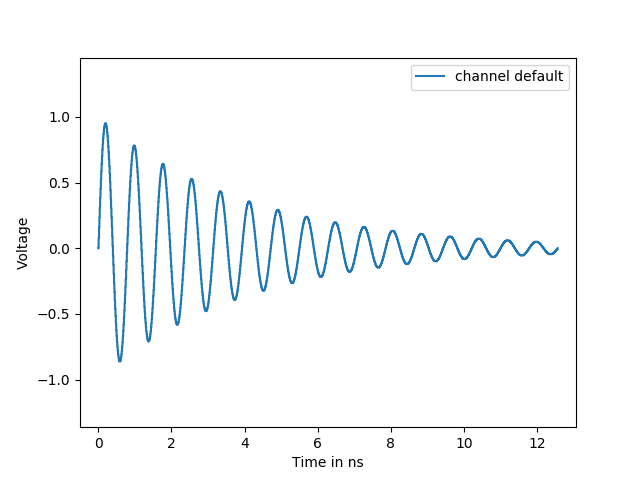

In [2]:
param_template = FunctionPT('exp(-t/tau)*sin(phi*t)', 'duration')

_ = plot(param_template, {'tau': 4, 'phi': 8, 'duration': 4*3.1415}, sample_rate=100)